# Libraries Importations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re


In [2]:
pd.set_option('float_format', '{:f}'.format)

# Load Data

In [3]:
columns = [
    'Id',
    'Price',
    'TransferDate',
    'Postcode',
    'PropertyType',
    'OldNew',
    'Duration',
    'PAON',
    'SAON',
    'Street',
    'Locality' ,
    'TownCity',
    'District',
    'County',
    'PPDCategoryType',
    'RecordStatus',
]
houses_loaded = pd.read_csv('data/pp-2021.csv',names=columns)

In [4]:
houses_loaded.head()

Id   Price      TransferDate  Postcode  \
0  {CB0035E6-3546-58AE-E053-6B04A8C091AF}  630000  2021-04-29 00:00  BN13 3AH   
1  {CB0035E6-3547-58AE-E053-6B04A8C091AF}  477000  2021-05-10 00:00  BN16 2PQ   
2  {CB0035E6-3548-58AE-E053-6B04A8C091AF}  370000  2021-05-06 00:00   BN2 4HZ   
3  {CB0035E6-3549-58AE-E053-6B04A8C091AF}  462500  2021-04-28 00:00   BN2 0GP   
4  {CB0035E6-354A-58AE-E053-6B04A8C091AF}  433000  2021-08-06 00:00   BN8 4LS   

  PropertyType OldNew Duration PAON SAON           Street    Locality  \
0            D      N        F    3  NaN  HIGHLANDS CLOSE         NaN   
1            D      N        F   10  NaN   CHAUCER AVENUE  RUSTINGTON   
2            T      N        F    6  NaN  DARTMOUTH CLOSE         NaN   
3            T      N        F   18  NaN   STANLEY STREET         NaN   
4            D      N        F   11  NaN      POWELL ROAD      NEWICK   

        TownCity           District             County PPDCategoryType  \
0       WORTHING           WORTHING        WEST SUSSEX               A   
1  LITTLEHAMPTON               ARUN        WEST SUSSEX               A   
2       BRIGHTON  BRIGHTON AND HOVE  BRIGHTON AND HOVE               A   
3       BRIGHTON  BRIGHTON AND HOVE  BRIGHTON AND HOVE               A   
4          LEWES              LEWES        EAST SUSSEX               A   

  RecordStatus  
0            A  
1            A  
2            A  
3            A  
4            A

# Data Exploration

## Define visualisation Functions

- Functions for studying categorical data:
- <b>"bar_catg_feature"</b> is a function used here to draw/illustrate a specific feature Vs "Price" for this analysis section
- <b>"bar_catg_pairfeature"</b> is a function used here to draw/illustrate a two features Vs "Price" for this analysis section

In [5]:
def find_df_name(df):
   name = [name for name, obj in globals().items() if id(obj) == id(df)]
   return name[0] if name else None

In [6]:
def bar_catg_feature(col_name,df_data):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
    # data
    df_feature = df_data.loc[:,[col_name,"Price"]]

    df_grouped = df_feature.groupby(col_name)["Price"].mean()
    # first plot
    sns.barplot(
        x=df_grouped.index, 
        y=df_grouped.values, 
        ax=axes[0]
    )
    # second plot
    values = df_feature[col_name].value_counts(dropna=False)
    sns.barplot(
        x=values.index, 
        y=values.values,
        ax=axes[1]
    )
    # Add titles
    axes[0].set_title(f'Average Price by {col_name} (data={find_df_name(df_data)})')
    axes[1].set_title(f'distribution of {col_name} (data={find_df_name(df_data)})')
    # show
    plt.tight_layout()
    plt.show()

In [7]:
def bar_catg_pairfeature(colname1,colname2,colname3='Price',df_data=None):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
    # data
    df_feature = df_data.loc[:,[colname1,colname2,colname3]]
    sns.barplot(
        data = df_feature,
        x=colname2, 
        y=colname3,
        hue=colname1,
        ax=axes
    )
    # Add titles
    axes.set_title(f'Average Price by {colname1}, {colname2} (data={find_df_name(df_data)})')
    # show
    plt.tight_layout()
    plt.show()


- Functions for studying Geolocalisation data, which logicaly, it must has importance impact on price variation
- <b>bar_geo_feature:</b> function to illustrate the variation of geolocalisation variables vs Price in barplot
- <b>box_geo_feature:</b> function to illustrate the variation of geolocalisation variables vs Price in boxplot
- <b>categorise:</b> function to categorise "location" data based on boplot metrics (quartiles)

In [8]:
def bar_geo_feature(colname1,colname2='Price',df_data = None,ascending=False,method='mean'):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))
    # data
    if method=='mean':
        df_feature = df_data.groupby(colname1)[colname2].mean().sort_values(ascending=ascending)[:50]
    elif method=='median':
        df_feature = df_data.groupby(colname1)[colname2].median().sort_values(ascending=ascending)[:50]
    sns.barplot(
        x=df_feature.index, 
        y=df_feature.values,
        ax=axes
    )
    # Add titles
    axes.tick_params(axis='x', rotation=90)
    axes.set_title(f'{method} of {colname2} by {colname1} (data={find_df_name(df_data)})')
    # show
    # plt.tight_layout()
    plt.show()

In [9]:
def box_geo_feature(colname1,colname2='Price',df_data = None,method='mean'):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    if method=='mean':
        df_grouped_mean = df_data.groupby(colname1)[colname2].mean().sort_values(ascending=False)
    elif method=='median':
        df_grouped_mean = df_data.groupby(colname1)[colname2].median().sort_values(ascending=False)
    sns.boxplot(df_grouped_mean)
    plt.title(f'Distribution of {method} of {colname2} by {colname1} (data={find_df_name(df_data)})')
    plt.show()

In [10]:
def categorise(col,df_data):
    cat_col = df_data.groupby(col)['Price'].mean()
    # Calculate the quartiles:
    q25 = np.percentile(cat_col, 25)
    q75 = np.percentile(cat_col, 75)
    max_q = min(cat_col.max(),q75+1.5*(q75-q25))
    min_q = max(cat_col.min(),q25-1.5*(q75-q25))
    # caterg
    def col_cat(x,min_q,q25,q75,max_q):
        if x["Price"] < min_q : return "Very Poor"
        elif (x["Price"] >= min_q) and (x["Price"] <= q25) : return "Poor"
        elif (x["Price"] > q25) and (x["Price"] <= q75) : return "Normal"
        elif(x["Price"] > q75) and (x["Price"] <= max_q) : return "Rich"
        else: return "Very Rich"
        
    return df_data.apply(lambda x: col_cat(x,min_q=min_q,q25=q25,q75=q75,max_q=max_q),axis=1)

## Infos

- general illustration of data

In [11]:
houses_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247338 entries, 0 to 1247337
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Id               1247338 non-null  object
 1   Price            1247338 non-null  int64 
 2   TransferDate     1247338 non-null  object
 3   Postcode         1243322 non-null  object
 4   PropertyType     1247338 non-null  object
 5   OldNew           1247338 non-null  object
 6   Duration         1247338 non-null  object
 7   PAON             1247338 non-null  object
 8   SAON             154146 non-null   object
 9   Street           1222441 non-null  object
 10  Locality         484555 non-null   object
 11  TownCity         1247338 non-null  object
 12  District         1247338 non-null  object
 13  County           1247338 non-null  object
 14  PPDCategoryType  1247338 non-null  object
 15  RecordStatus     1247338 non-null  object
dtypes: int64(1), object(15)
memory usage

- the first intuition, in order to predict 'Price' output, lets consider studying these variable:
    - 'TransferDate'
    - 'PropertyType'
    - 'OldNew'
    - 'Duration'
    - 'TownCity'
    - 'District'
    - 'County'
    - 'PPDCategoryType'
    - 'RecordStatus'
- to consider later:
    - 'PAON'
    - 'SAON'
    - 'Street'
    - 'Locality'

In [12]:
cat_features = [
    'PropertyType',
    'OldNew',
    'Duration',
    'TownCity',
    'District',
    'County',
    'PPDCategoryType',
    'RecordStatus',
]
for col in cat_features:
    print("Number of categories of Feature '{0}' is : {1} ".format(col, len(houses_loaded[col].unique())))
    print(houses_loaded[col].value_counts(dropna=False).index.tolist())
    print('--------------------------------------------------------------------------------------------')

Number of categories of Feature 'PropertyType' is : 5 
['T', 'S', 'D', 'F', 'O']
--------------------------------------------------------------------------------------------
Number of categories of Feature 'OldNew' is : 2 
['N', 'Y']
--------------------------------------------------------------------------------------------
Number of categories of Feature 'Duration' is : 2 
['F', 'L']
--------------------------------------------------------------------------------------------
Number of categories of Feature 'TownCity' is : 1148 
['LONDON', 'MANCHESTER', 'BRISTOL', 'BIRMINGHAM', 'NOTTINGHAM', 'LIVERPOOL', 'LEEDS', 'SHEFFIELD', 'LEICESTER', 'NORWICH', 'SOUTHAMPTON', 'NEWCASTLE UPON TYNE', 'STOKE-ON-TRENT', 'DERBY', 'READING', 'YORK', 'PRESTON', 'DONCASTER', 'NORTHAMPTON', 'CARDIFF', 'COVENTRY', 'HULL', 'COLCHESTER', 'BRADFORD', 'SWINDON', 'MILTON KEYNES', 'PETERBOROUGH', 'STOCKPORT', 'PLYMOUTH', 'BOLTON', 'LINCOLN', 'BEDFORD', 'CAMBRIDGE', 'SWANSEA', 'BOURNEMOUTH', 'NEWPORT', 'IPSWICH',

<b>Conclusion</b>:
- Drop "RecordStatus" Column  : <i>"RecordStatus" Has only one value, so obviously it has a 0 degree of involvement/relevance of prediction of the project target "Price"</i>
- Analysis on 'PropertyType', 'OldNew', 'Duration' ,'PPDCategoryType', 'TransferDate' : <i>Columns of categorical data and fewer Values (up to 5)</i>
- Analysis on 'TownCity', 'District', 'County': <i>localisation data which can has sgnificant influence of "Price"</i>


## Fix Values

- Clean data

In [13]:
# PropertyType : D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other
houses_loaded.loc[houses_loaded['PropertyType']=='T','PropertyType'] = 'Terraced'
houses_loaded.loc[houses_loaded['PropertyType']=='S','PropertyType'] = 'SemiDetached'
houses_loaded.loc[houses_loaded['PropertyType']=='D','PropertyType'] = 'Detached'
houses_loaded.loc[houses_loaded['PropertyType']=='F','PropertyType'] = 'Flat'
houses_loaded.loc[houses_loaded['PropertyType']=='O','PropertyType'] = 'Other'
# OldNew : Y = New, N = Old
houses_loaded.loc[houses_loaded['OldNew']=='Y','OldNew'] = 'New'
houses_loaded.loc[houses_loaded['OldNew']=='N','OldNew'] = 'Old'
# Duration : F = Freehold, L= Leasehold
houses_loaded.loc[houses_loaded['Duration']=='F','Duration'] = 'Freehold'
houses_loaded.loc[houses_loaded['Duration']=='L','Duration'] = 'Leasehold'
# PPDCategoryType : A = StandardPrice (Standard Price Paid entry) ,  B = AdditionalPrice (Additional Price Paid)
houses_loaded.loc[houses_loaded['PPDCategoryType']=='A','PPDCategoryType'] = 'StandardPrice'
houses_loaded.loc[houses_loaded['PPDCategoryType']=='B','PPDCategoryType'] = 'AdditionalPrice'

- TransferDay & TransferMonth

In [14]:
houses_loaded['TransferDate'] = pd.to_datetime(houses_loaded['TransferDate'])
print(f"Years : ",houses_loaded['TransferDate'].dt.year.value_counts())
print("----------------------------------------------")
print(f"Months : ",houses_loaded['TransferDate'].dt.month.value_counts())
print("----------------------------------------------")
print(f"days : ",houses_loaded['TransferDate'].dt.day.value_counts())

Years :  2021    1247338
Name: TransferDate, dtype: int64
----------------------------------------------
Months :  6     187659
3     151567
9     142704
2     105370
4      98828
12     89667
5      86167
8      85830
1      83546
11     82487
10     67742
7      65771
Name: TransferDate, dtype: int64
----------------------------------------------
days :  30    97637
29    75336
26    65219
28    55478
25    50882
19    48305
12    48106
22    46981
17    46737
15    43975
23    41887
24    41805
5     40458
16    39187
10    37778
18    36002
8     35689
1     35485
21    34572
27    34503
9     32963
20    30189
11    29779
14    29588
3     29123
7     26194
4     26063
6     24043
13    22048
2     21701
31    19625
Name: TransferDate, dtype: int64


<b>Conclusion</b>
- we only have one value for the 'TransferDate' 's year: <i>the Year value has no impact of price variation</i>
- its better to generate a 'TransferMonth' & 'TransferDay' values to study the relevence of this propriety on price prediction 

In [15]:
houses_loaded['TransferMonth'] = houses_loaded['TransferDate'].dt.month
houses_loaded['TransferDay'] = houses_loaded['TransferDate'].dt.day

- tests

In [16]:
houses_loaded['Duration'].value_counts(dropna=False)

Freehold     974187
Leasehold    273151
Name: Duration, dtype: int64

## Target analysis

In [17]:
def classify_outliers(df_data,colname='Price'):
    df_metrics = df_data.describe()[colname]
    # metrics 
    price_q25= df_metrics["25%"]
    price_q50= df_metrics["50%"]
    price_q75= df_metrics["75%"]
    price_IQR = price_q75 - price_q25
    price_max= min(df_metrics["max"],price_q75+1.5*price_IQR)
    price_min= max(df_metrics["min"],price_q25-1.5*price_IQR)
    mask = np.logical_and((df_data.Price <= price_max), (df_data.Price >= price_min))
    normal_PriceWise_df = df_data.loc[mask,:]
    expensive_PriceWise_df = df_data.loc[~mask,:]
    return {
        "q25":price_q25,
        "q50":price_q50,
        "q75":price_q75,
        "IQR":price_IQR,
        "max":price_max,
        "min":price_min,
        "normal_PriceWise_df":normal_PriceWise_df,
        "expensive_PriceWise_df":expensive_PriceWise_df
    }

<AxesSubplot: xlabel='PropertyType', ylabel='Price'>

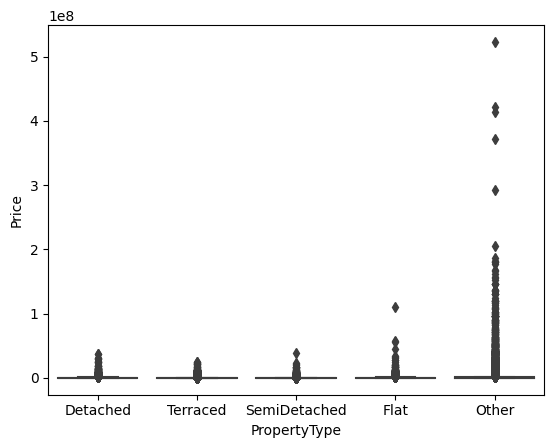

In [18]:
sns.boxplot(
    x="PropertyType", 
    y="Price", 
    data=houses_loaded
)

<AxesSubplot: xlabel='PropertyType', ylabel='Price'>

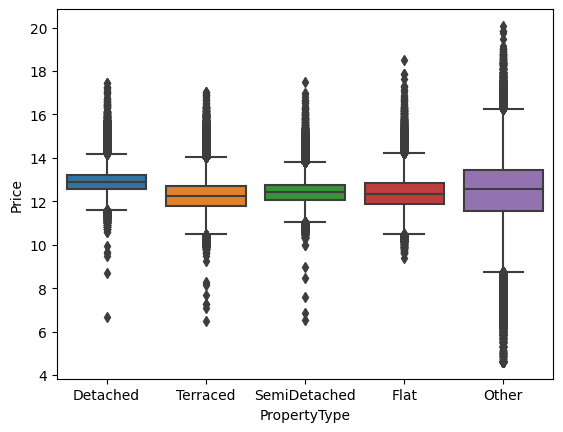

In [19]:
sns.boxplot(
    x=houses_loaded.PropertyType,
    y=np.log(houses_loaded.Price)
)

<AxesSubplot: ylabel='Price'>

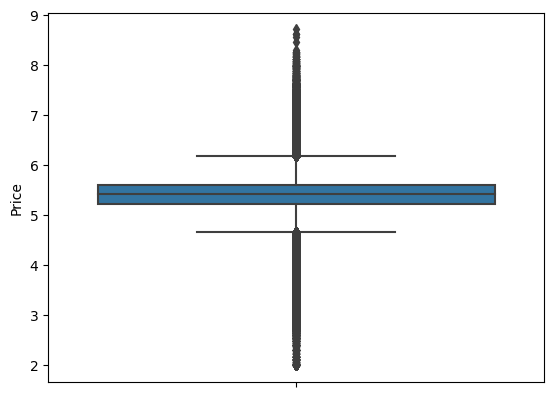

In [20]:
sns.boxplot(
    y=np.log10(houses_loaded.Price)
)

In [21]:
classified_houses = classify_outliers(
    df_data=houses_loaded,
    colname='Price'
)
expensive_PriceWise_houses = classified_houses["expensive_PriceWise_df"]
normal_PriceWise_houses = classified_houses["normal_PriceWise_df"]

#### expensive_PriceWise_houses

In [22]:
expensive_PriceWise_houses.shape,normal_PriceWise_houses.shape

((77128, 18), (1170210, 18))

In [23]:
expensive_PriceWise_houses.describe()

Price  TransferMonth  TransferDay
count     77128.000000   77128.000000 77128.000000
mean    1899850.365315       6.230565    18.439244
std     6039055.096177       3.305825     9.030809
min      773340.000000       1.000000     1.000000
25%      870000.000000       3.000000    11.000000
50%     1050000.000000       6.000000    19.000000
75%     1490000.000000       9.000000    26.000000
max   523000000.000000      12.000000    31.000000

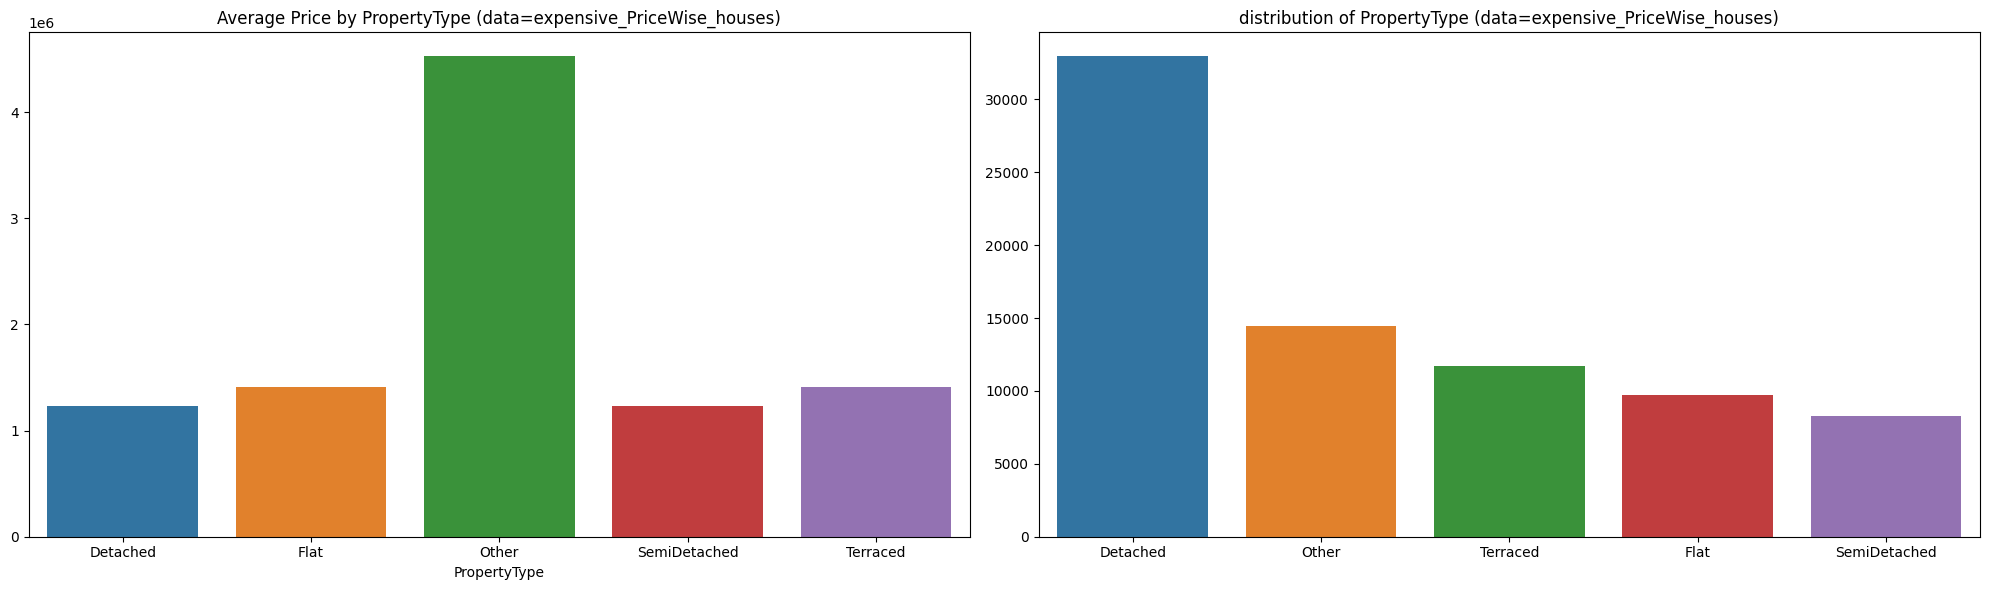

In [24]:
bar_catg_feature("PropertyType",df_data = expensive_PriceWise_houses)

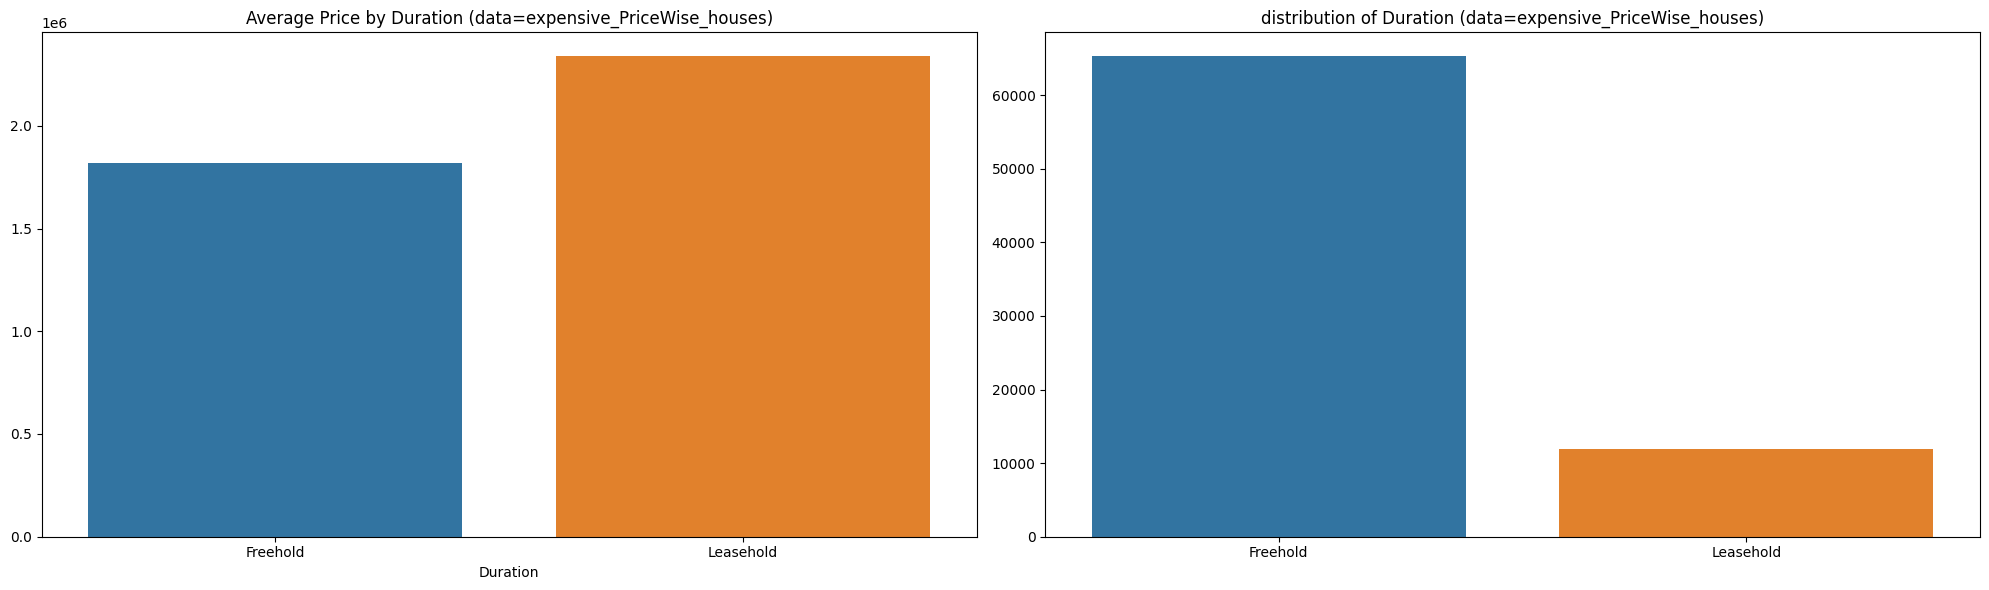

In [25]:
bar_catg_feature("Duration",df_data = expensive_PriceWise_houses)

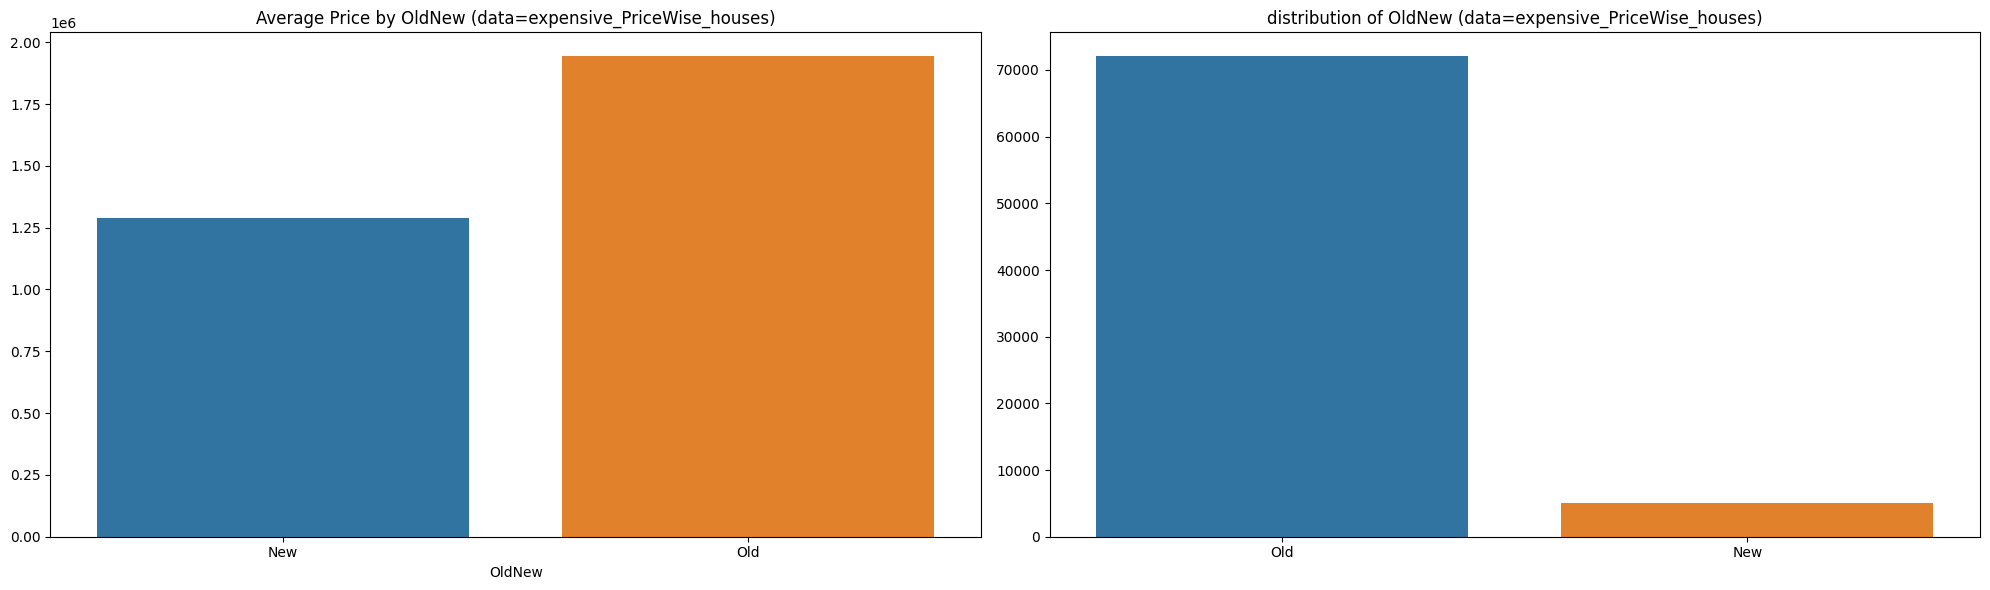

In [26]:
bar_catg_feature("OldNew",df_data = expensive_PriceWise_houses)

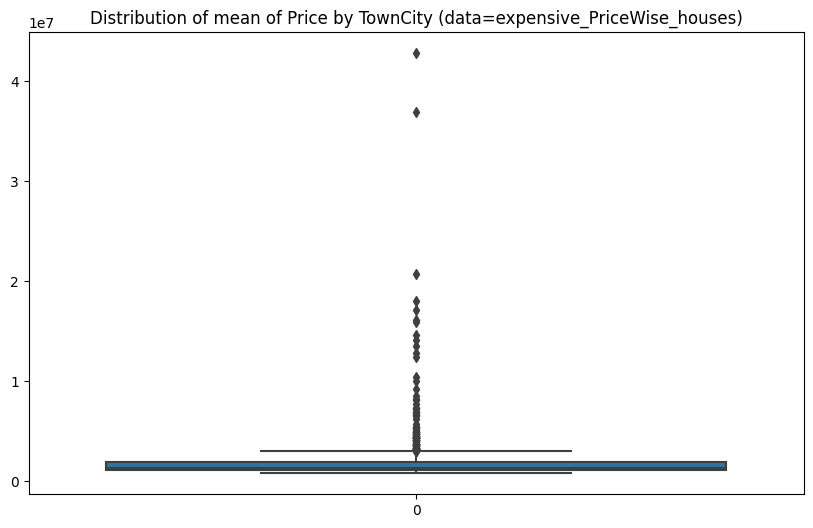

In [27]:
box_geo_feature("TownCity",df_data = expensive_PriceWise_houses)

<AxesSubplot: xlabel='PropertyType', ylabel='Price'>

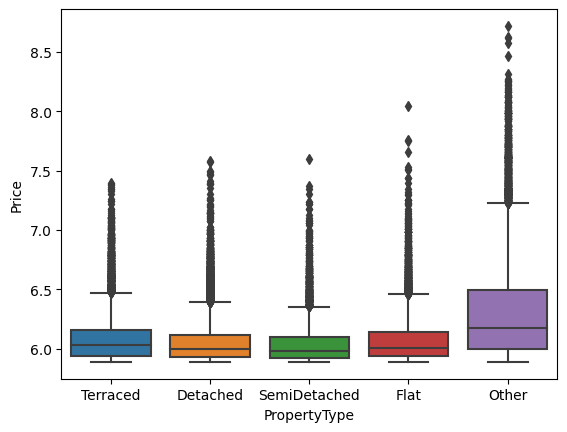

In [28]:
sns.boxplot(
    x = expensive_PriceWise_houses.PropertyType,
    y = np.log10(expensive_PriceWise_houses.Price),
)

#### normal_PriceWise_houses

In [29]:
normal_PriceWise_houses.describe()

Price  TransferMonth    TransferDay
count 1170210.000000 1170210.000000 1170210.000000
mean   286314.957868       6.249042      18.027446
std    158457.874858       3.303171       8.933541
min       100.000000       1.000000       1.000000
25%    166000.000000       3.000000      11.000000
50%    255000.000000       6.000000      19.000000
75%    375000.000000       9.000000      26.000000
max    773200.000000      12.000000      31.000000

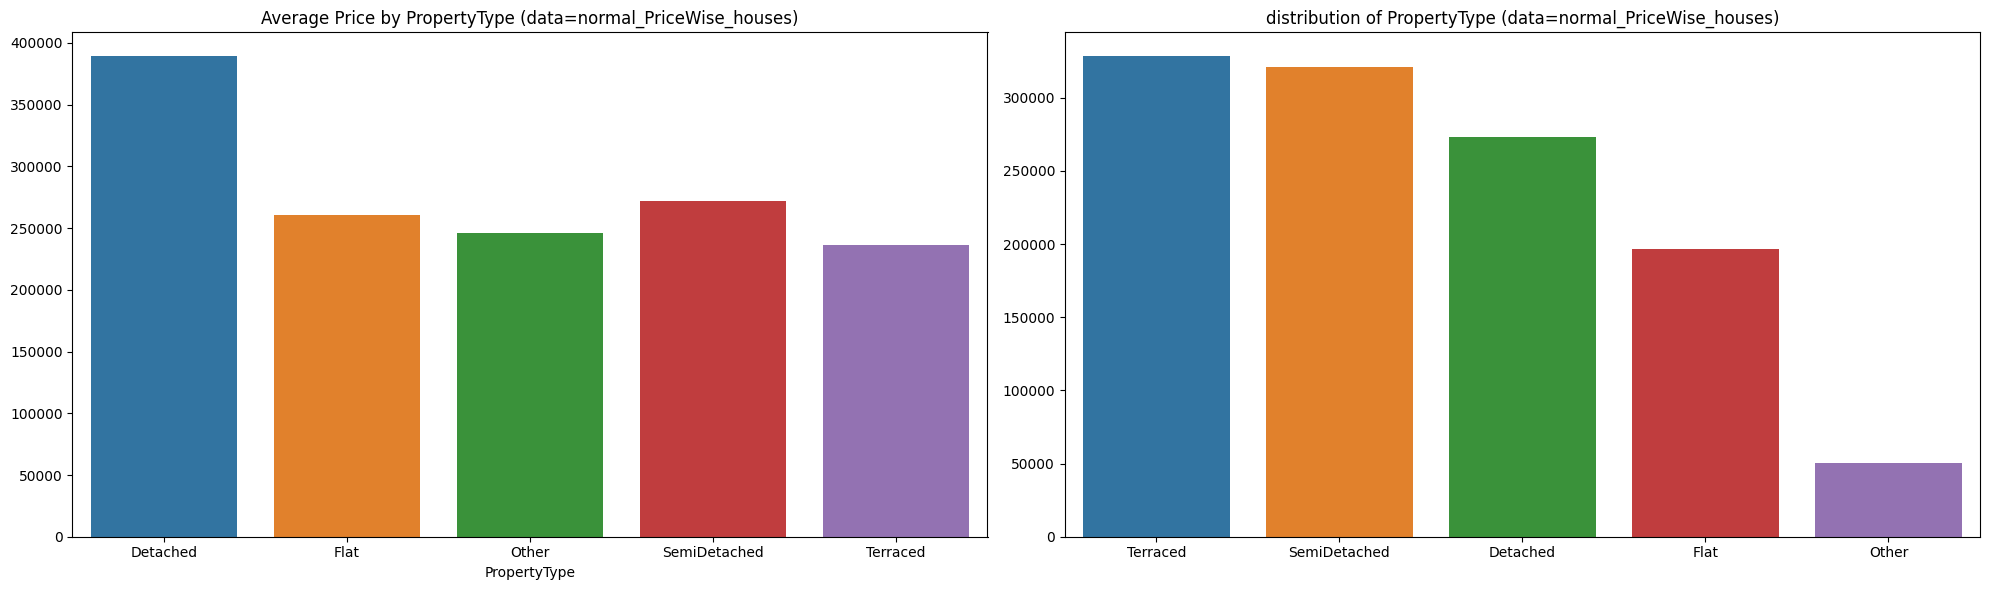

In [30]:
bar_catg_feature("PropertyType",df_data = normal_PriceWise_houses)

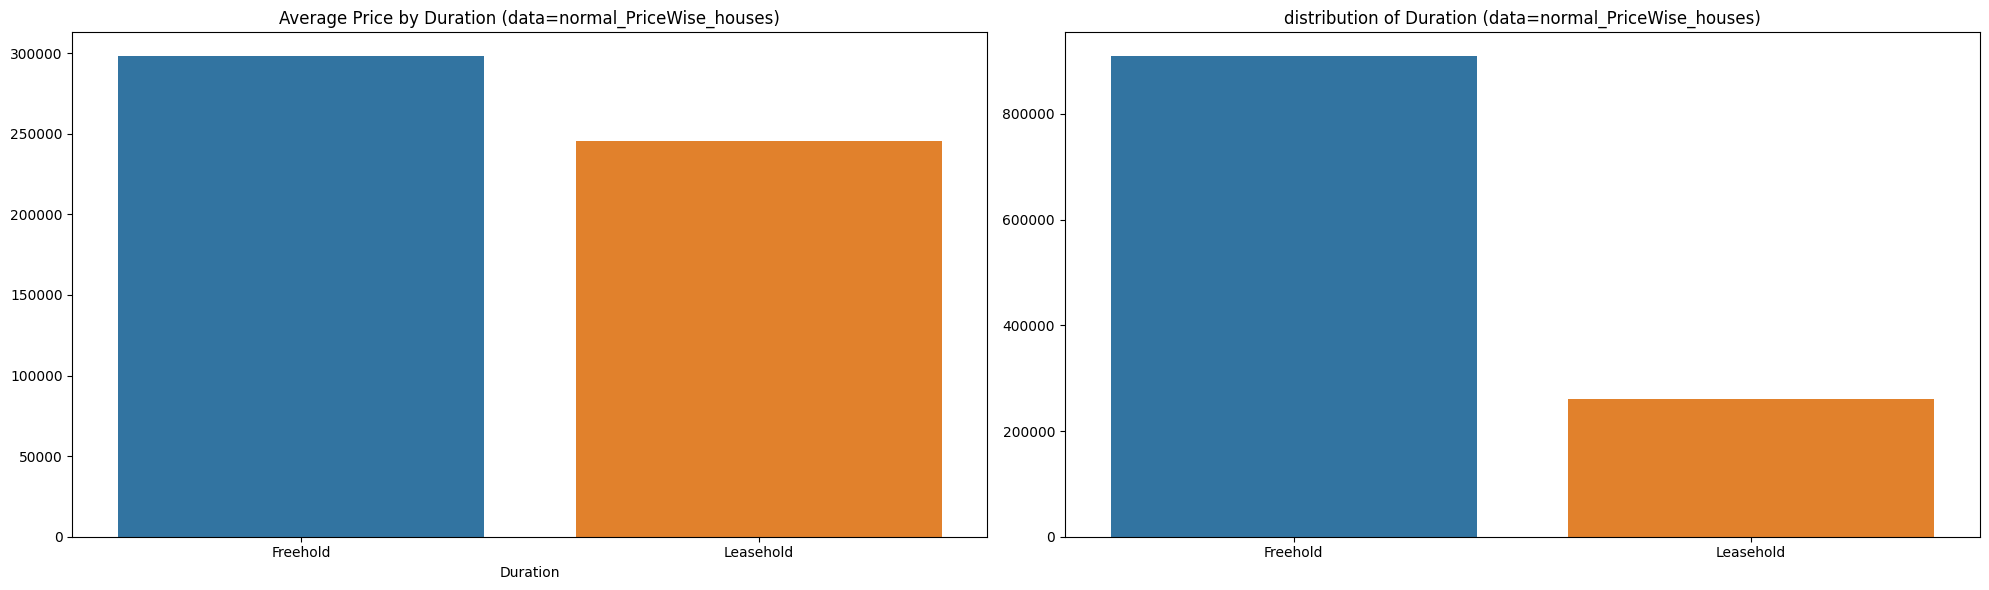

In [31]:
bar_catg_feature("Duration",df_data = normal_PriceWise_houses)

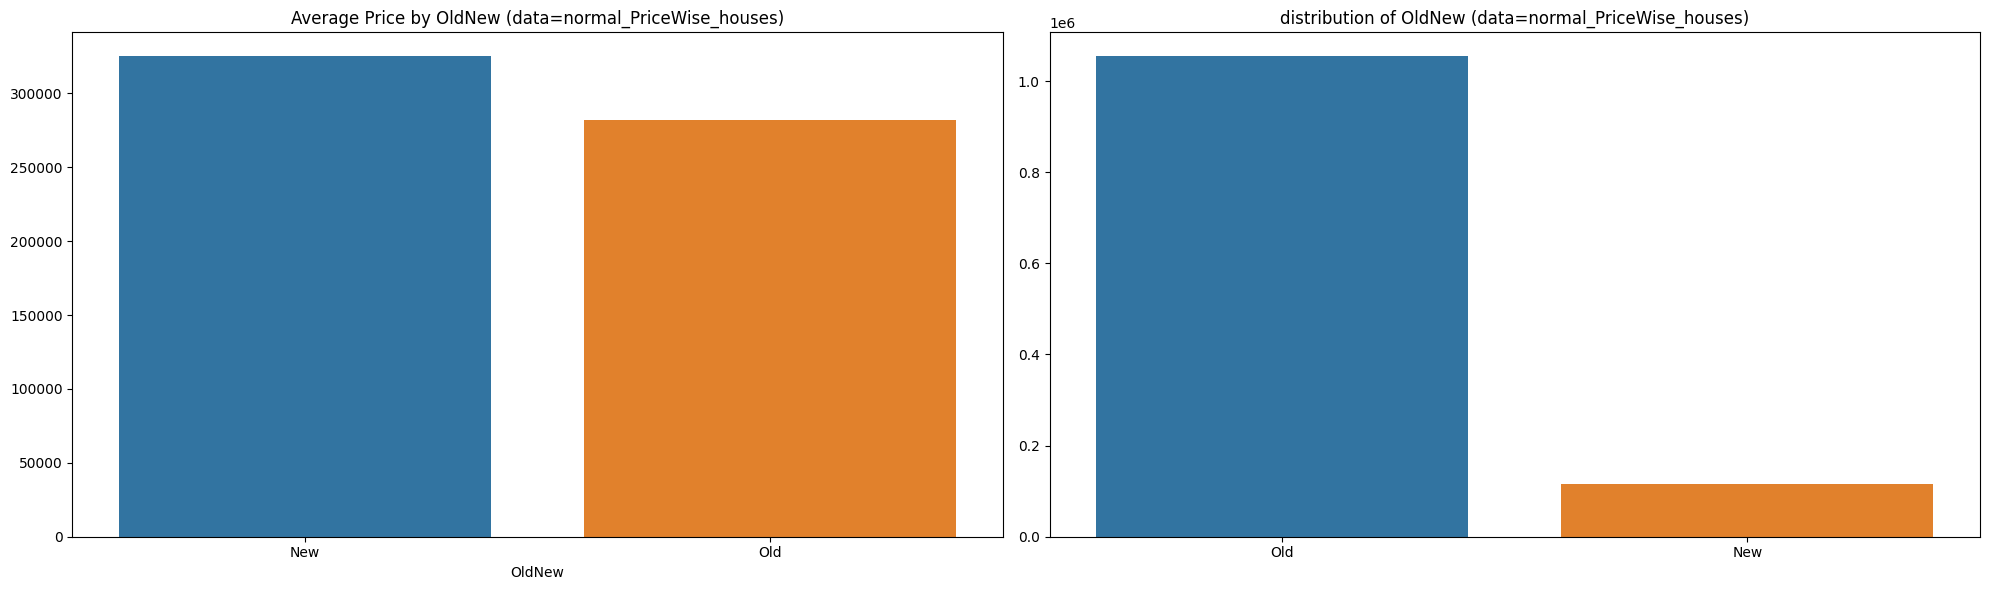

In [32]:
bar_catg_feature("OldNew",df_data = normal_PriceWise_houses)

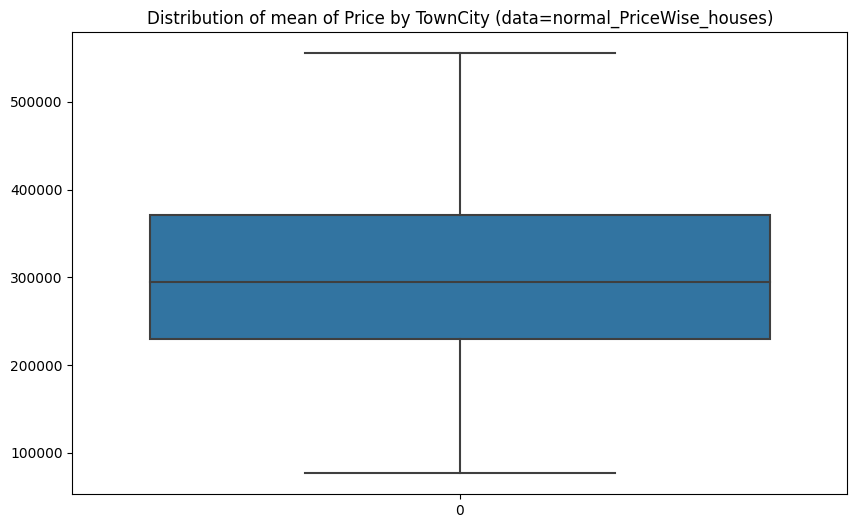

In [33]:
box_geo_feature("TownCity",df_data = normal_PriceWise_houses)

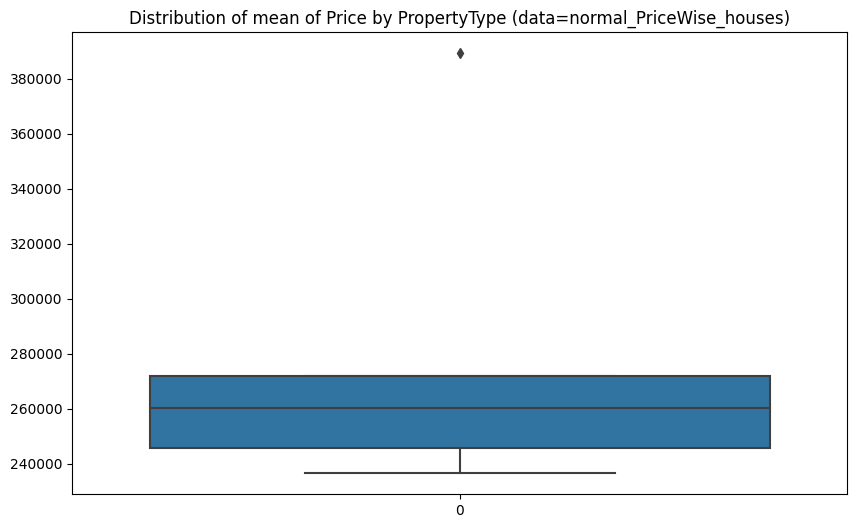

In [34]:
box_geo_feature("PropertyType",df_data = normal_PriceWise_houses)

<AxesSubplot: xlabel='PropertyType', ylabel='Price'>

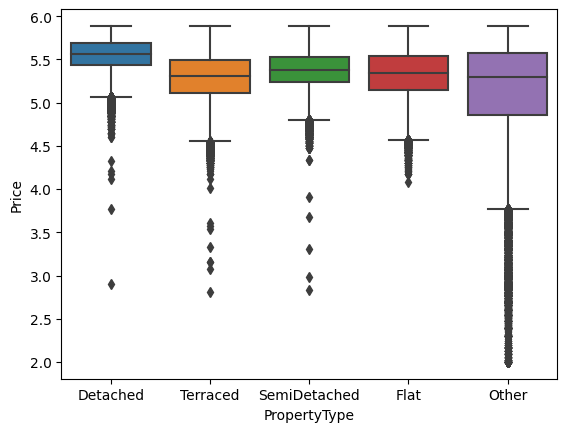

In [35]:
sns.boxplot(
    x = normal_PriceWise_houses.PropertyType,
    y = np.log10(normal_PriceWise_houses.Price),
)

#### classified_TownCityPrice_houses

In [ ]:
classified_TownCityPrice_houses = classify_outliers(expensive_PriceWise_houses,colname='Price')
expensive_TownCityPriceWise_houses = classified_houses["expensive_PriceWise_df"]
normal_TownCityPriceWise_houses = classified_houses["normal_PriceWise_df"]

In [ ]:
expensive_TownCityPriceWise_houses.shape,normal_TownCityPriceWise_houses.shape

In [ ]:
bar_catg_pairfeature('PropertyType','TownCity',colname3='Price',df_data = expensive_TownCityPriceWise_houses)

In [ ]:
bar_geo_feature("TownCity",df_data = expensive_TownCityPriceWise_houses)

#### tests

In [ ]:
houses_metrics = houses.Price.describe()
houses_metrics

In [ ]:
houses_g75 = houses[houses.Price>houses_metrics["75%"]]
houses_l25 = houses[houses.Price<houses_metrics["25%"]]
houses_b = houses.loc[(houses.loc[:,"Price"]<=houses_metrics["75%"]) & (houses.loc[:,"Price"]>=houses_metrics["25%"]),:]
houses_wo = houses[houses.Price<=houses_metrics["75%"]]

In [ ]:
houses_g75.head()

In [ ]:
houses_g75.PAON.value_counts()

In [ ]:
houses.PropertyType.value_counts()

In [ ]:
25331/64825

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
row = 1
col = 0
values = houses_g75["Price"].value_counts(bins=30).sort_index(ascending=True)
sns.barplot(
    x=values.index, 
    y=values.values,
    ax=axes[row,col]
)
    
# Add titles
# axes[0].set_title(f'Price by {col_name}')
# axes[1].set_title(f'distribution of {col_name}')
# show
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [ ]:
houses_data = [
    houses_g75,
    houses_l25,
    houses_b,
    houses_wo
]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
# first plot
for i in range(4):
    row = i//2
    col = 1 if i%2==0 else 0
    values = houses_data[i]["Price"].value_counts(dropna=False)
    sns.barplot(
        x=values.index, 
        y=values.values,
        ax=axes[row,col]
    )
    
# Add titles
# axes[0].set_title(f'Price by {col_name}')
# axes[1].set_title(f'distribution of {col_name}')
# show
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [ ]:
# Create a boxplot
houses_r = houses[houses.PropertyType=="T"] 
sns.boxplot(x="PropertyType", y="Price", data=houses_r)

# Show the plot
plt.show()

In [ ]:
sns.scatterplot(x="PropertyType", y="Price", data=houses)

# Show the plot
plt.show()


In [ ]:
price_bins = houses.Price.value_counts(bins=100).sort_index(ascending=True)

In [ ]:
fig, axes = plt.subplots(figsize = (20,8))
sns.barplot(
    x=price_bins.index, 
    y=price_bins.values
)
plt.xticks(rotation=70)
plt.tight_layout()

# Show the plot
plt.show()


#### Conclusion

In [36]:
houses = normal_PriceWise_houses.copy()

## Features analysis

In this section we are going to do:
- Analysis on 'PropertyType', 'OldNew', 'Duration' ,'PPDCategoryType', 'TransferDate'
- Analysis on 'TownCity', 'District', 'County'

### Analysis on 'PropertyType', 'OldNew', 'Duration' ,'PPDCategoryType', 'TransferDate'

#### 'PropertyType'

##### Exploration

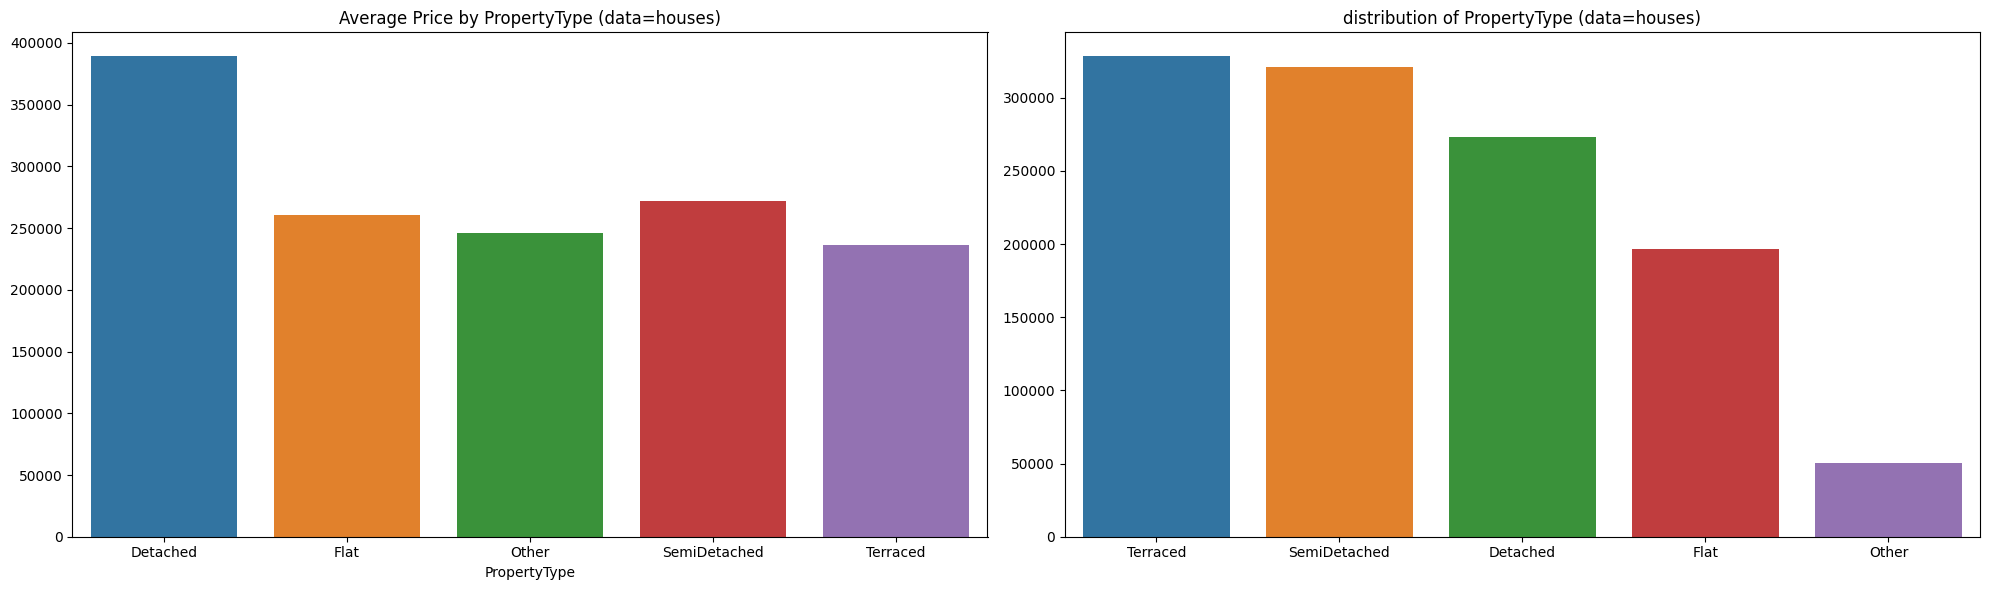

In [37]:
bar_catg_feature("PropertyType",df_data = houses)

- Bases on graphs above, we can see that:
    - the "PropertyType" = "o" ("Others") are the most expensive types of houses, yet they are the most rare ones.
    - the "PropertyType" in ("D" = Detached, "S" = Semi-Detached, "T" = Terraced, "F" = Flats/Maisonettes) are the frequent ones and has a understandable and predicted variation of price
    - there is a correlation between type of Property and its price

- as the "PropertyType" = "o" is the section where outliers whould reside, lets break it down and see where possibly this "Other" property means.
- In other words, we will try to identify "PropertyType" = "o" by combining other set of features.

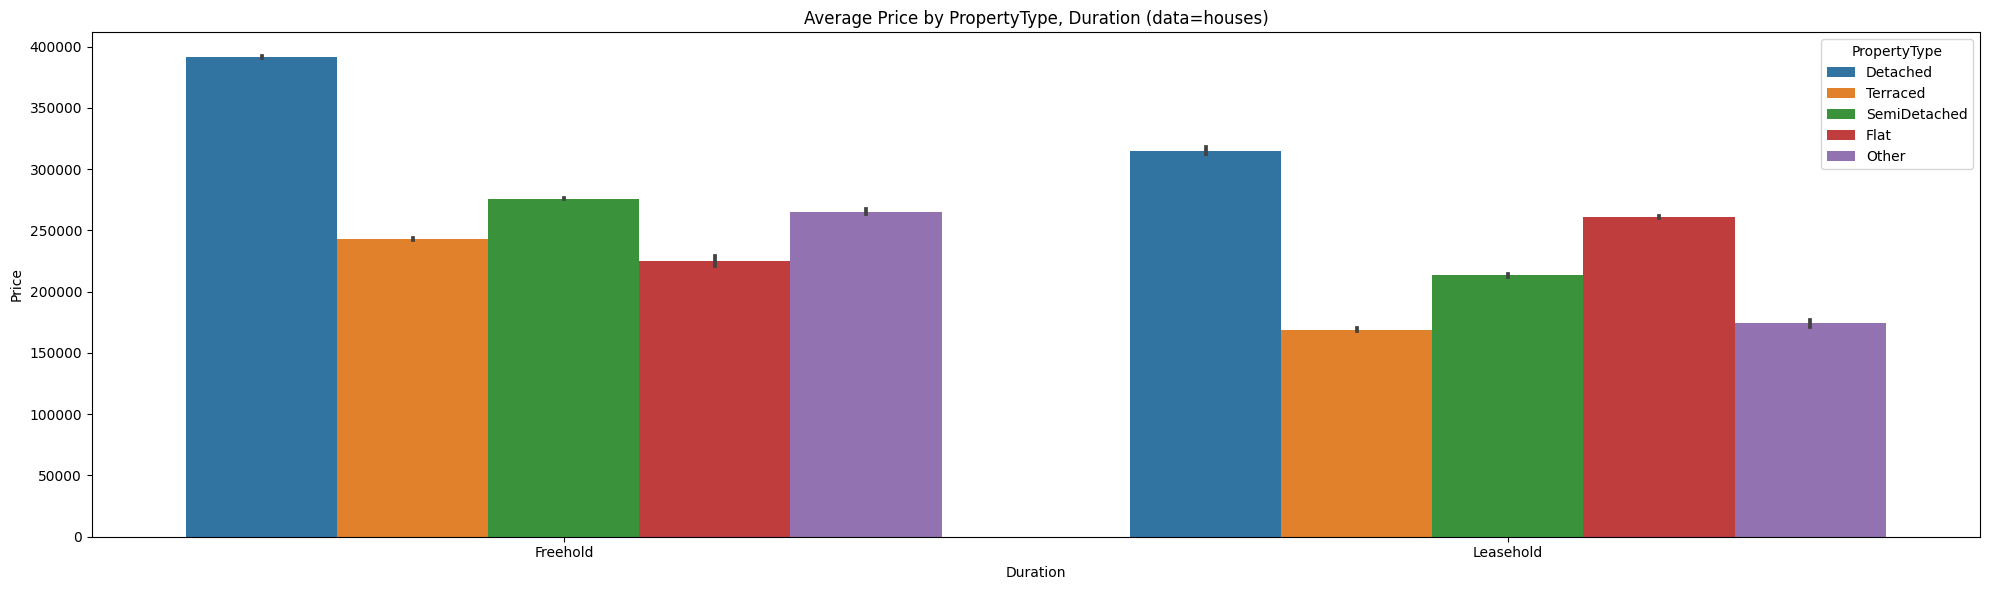

In [38]:
# Price by propertyType and Duration
bar_catg_pairfeature('PropertyType','Duration',colname3='Price',df_data = houses)

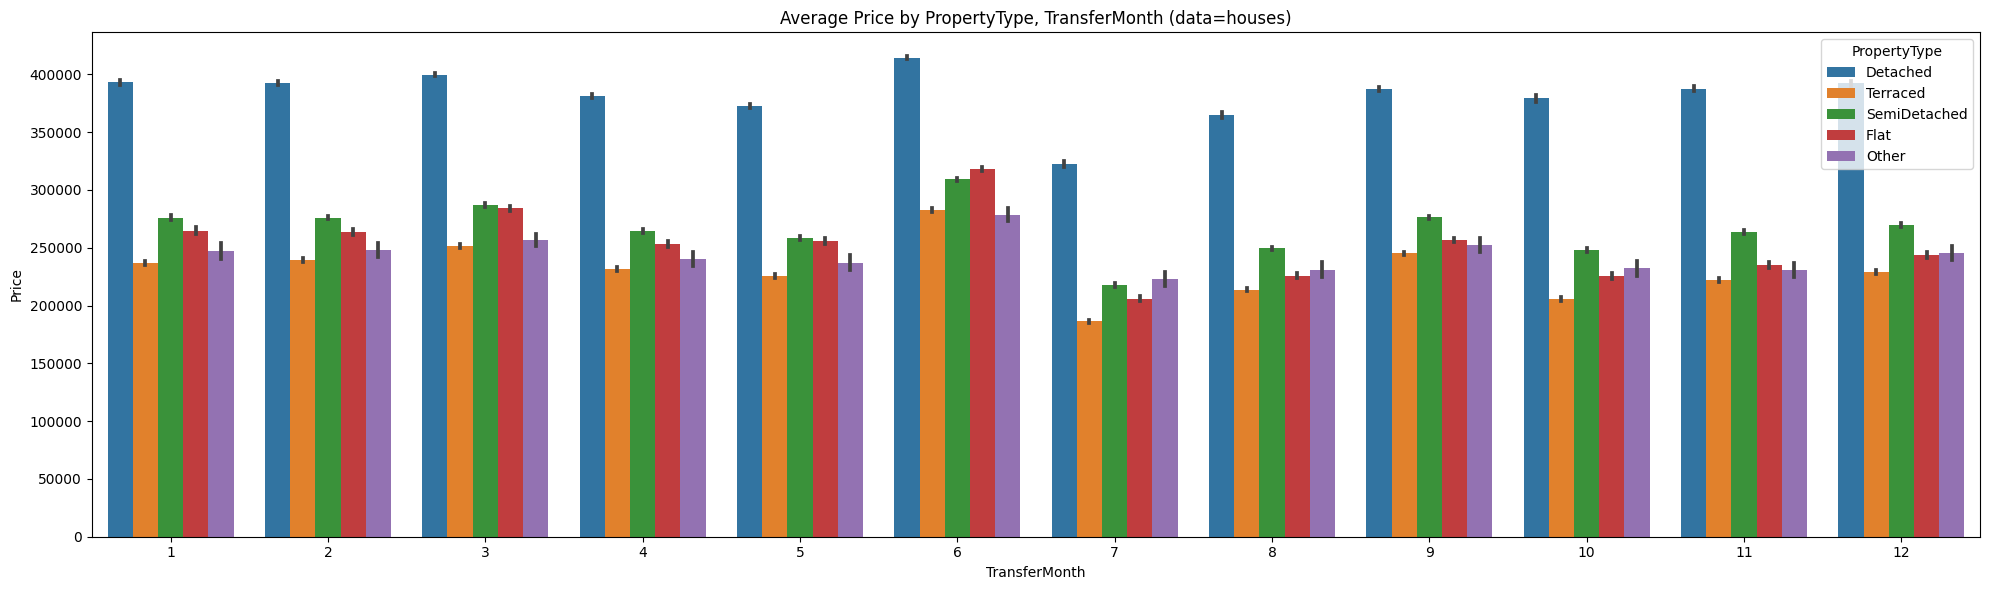

In [39]:
# Price by propertyType and TranferMonth
bar_catg_pairfeature('PropertyType','TransferMonth',colname3='Price',df_data = houses)

<b>Conclusion</b>
- based on those two graphs above, the PropertyType="O" are divide along all values, and can not be determined


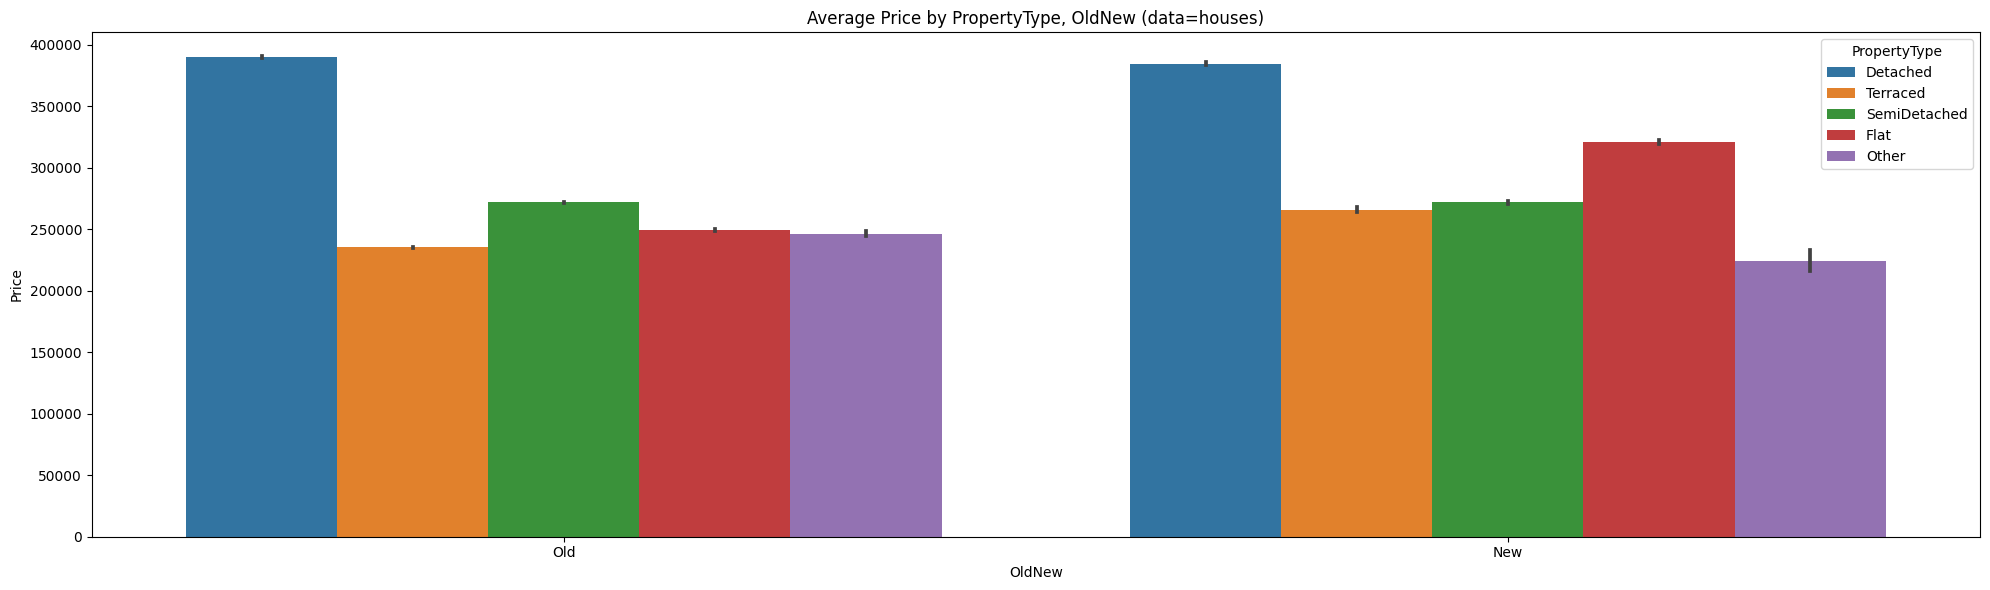

In [40]:
bar_catg_pairfeature('PropertyType','OldNew',colname3='Price',df_data = houses)

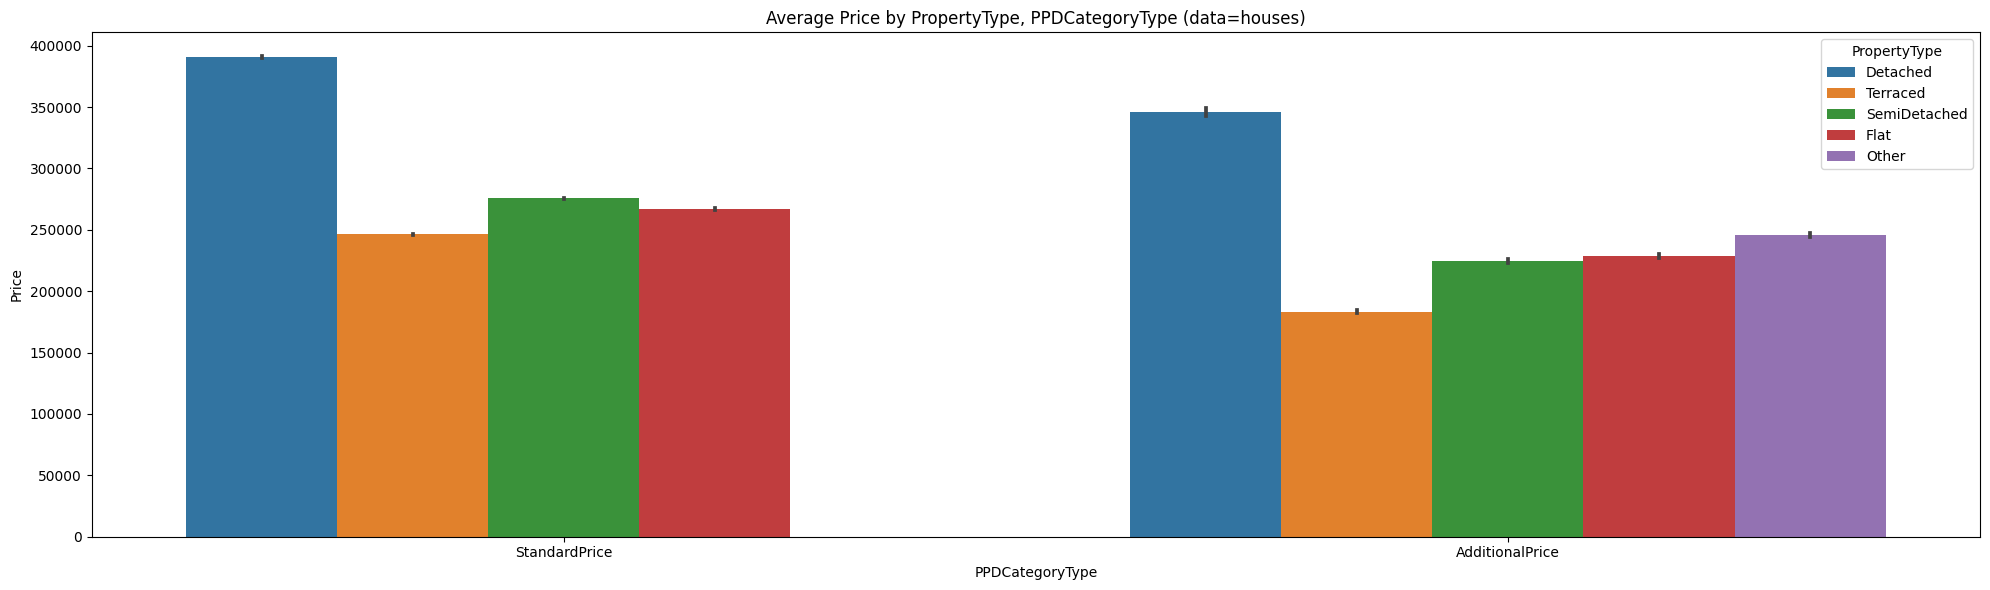

In [41]:
bar_catg_pairfeature('PropertyType','PPDCategoryType',colname3='Price',df_data = houses)

<b>Conclusion</b>
- Based on this two graphs above we can conclude that the outliers could exist where 'PPDCategoryType'='AdditionalPrice' (Additional Price Paid entry) and 'OldNew'='Old' and "PropertyType" == 'Other' (an established residential building), which is predictibale, taking on consideration old properties has high market value and extra maintenance costs

##### Solving Outliers

- Based on the Analysis above, we conclude that outliers reside where those conditions co-existe:
    - "PPDCategoryType" == 'AdditionalPrice'
    - "OldNew" == 'Old'
    - "PropertyType" == 'Other'

In [42]:
mask_expensive = (houses.PPDCategoryType == 'AdditionalPrice') & (houses.OldNew == 'Old') & (houses.PropertyType == 'Other')
expensive_houses = houses.loc[mask_expensive,:]
normal_houses = houses.loc[~mask_expensive,:]

In [43]:
expensive_houses.shape,normal_houses.shape

((48812, 18), (1121398, 18))

In [44]:
expensive_houses.describe()['Price'],normal_houses.describe()['Price']

(count    48812.000000
 mean    246542.409612
 std     206008.224178
 min        100.000000
 25%      72000.000000
 50%     200000.000000
 75%     382500.000000
 max     772500.000000
 Name: Price, dtype: float64,
 count   1121398.000000
 mean     288046.169825
 std      155829.153571
 min         100.000000
 25%      170000.000000
 50%      256000.000000
 75%      375000.000000
 max      773200.000000
 Name: Price, dtype: float64)

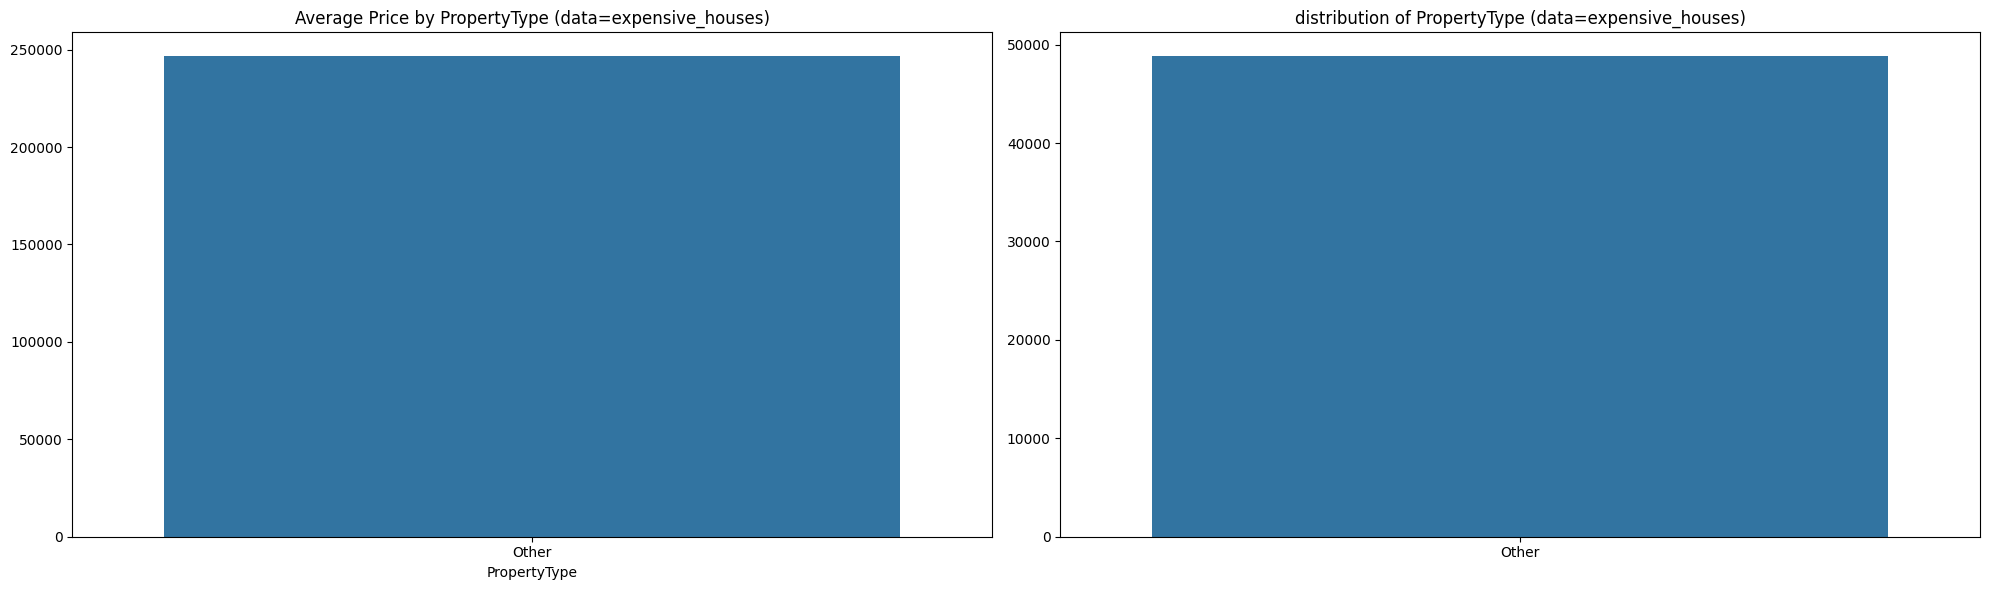

In [45]:
bar_catg_feature("PropertyType",df_data = expensive_houses)

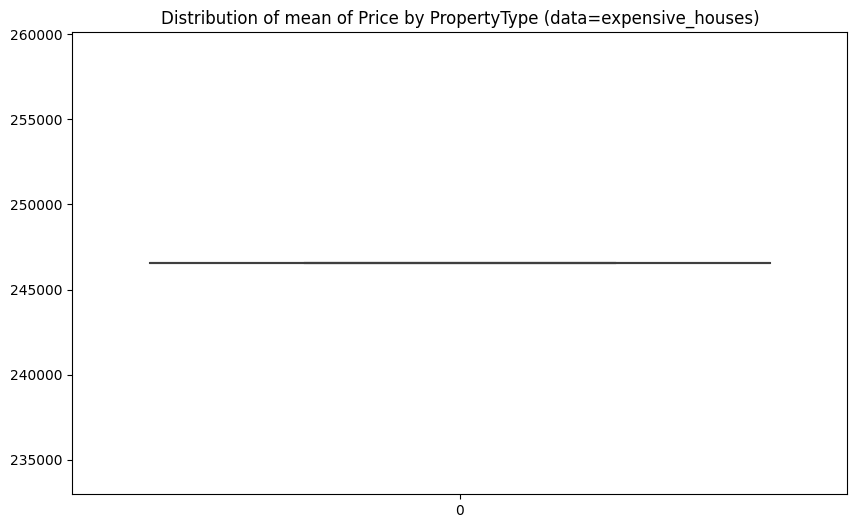

In [46]:
box_geo_feature(
    colname1 = "PropertyType",
    colname2='Price',
    df_data = expensive_houses,
    method='mean'
)

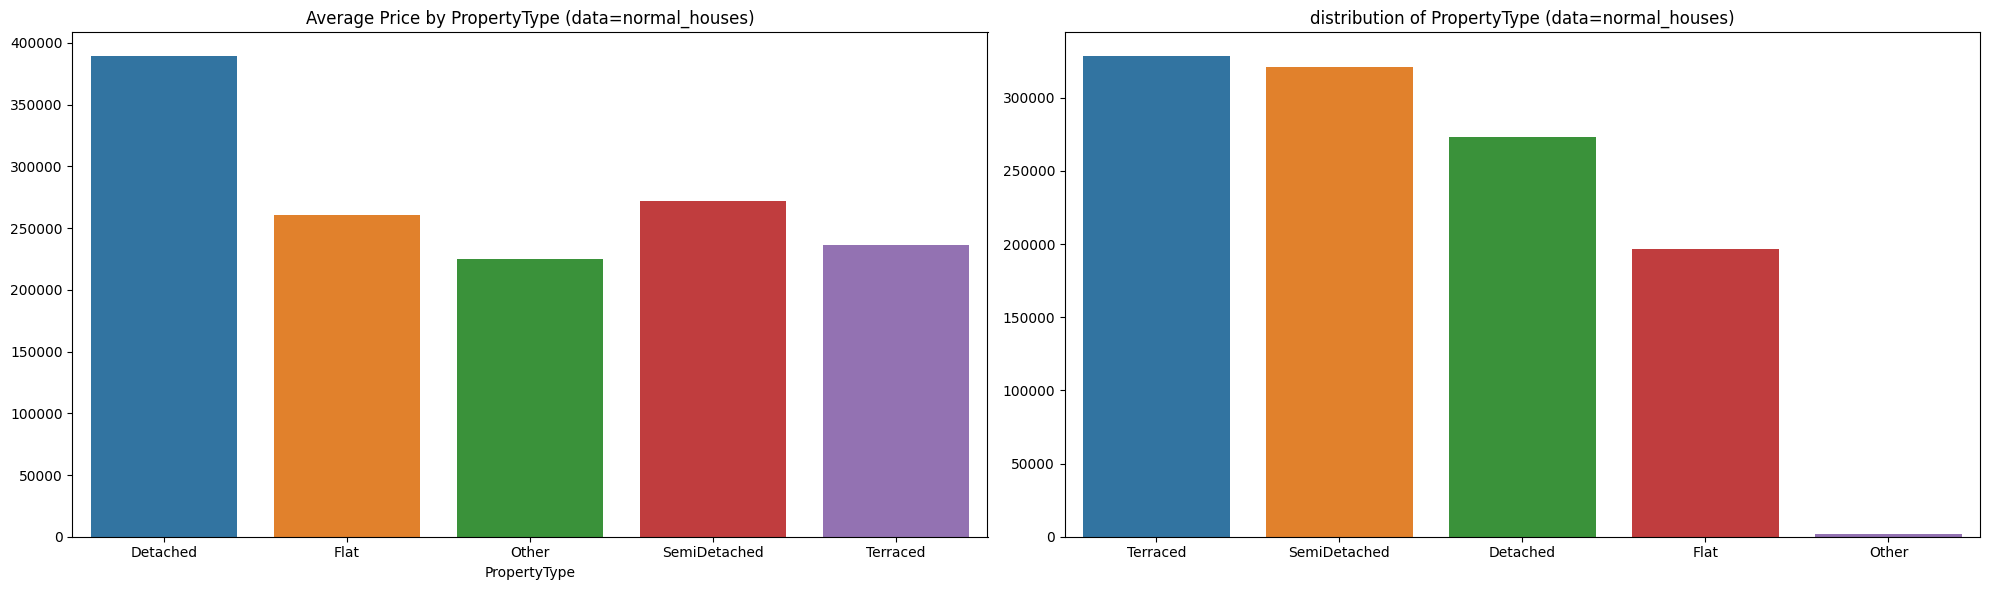

In [47]:
bar_catg_feature("PropertyType",df_data = normal_houses)

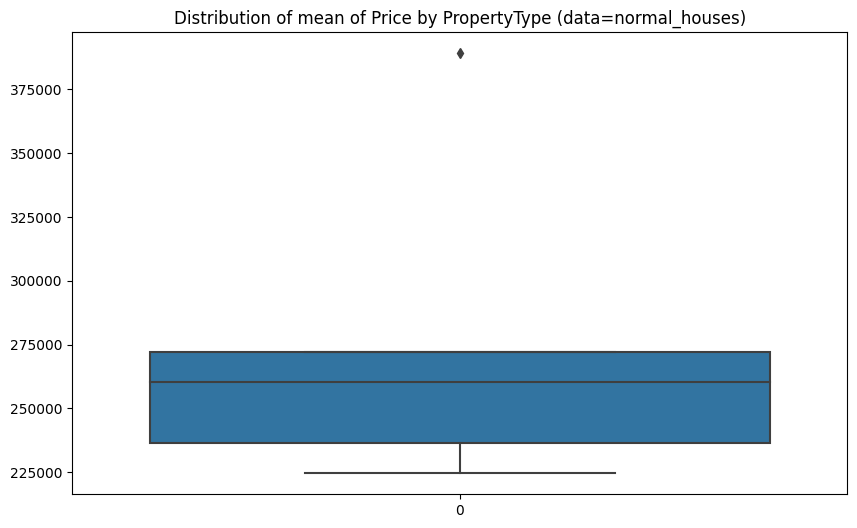

In [48]:
box_geo_feature(
    colname1= "PropertyType",
    colname2='Price',
    df_data = normal_houses,
    method='mean'
)

- to fix those outliers and prevent them from disturbing our Model, we will remove them 

In [ ]:
############### the outliers has been removed in first place lets try this later
# houses = houses.loc[~mask_expensive,:]

#### 'OldNew'

##### Exploration

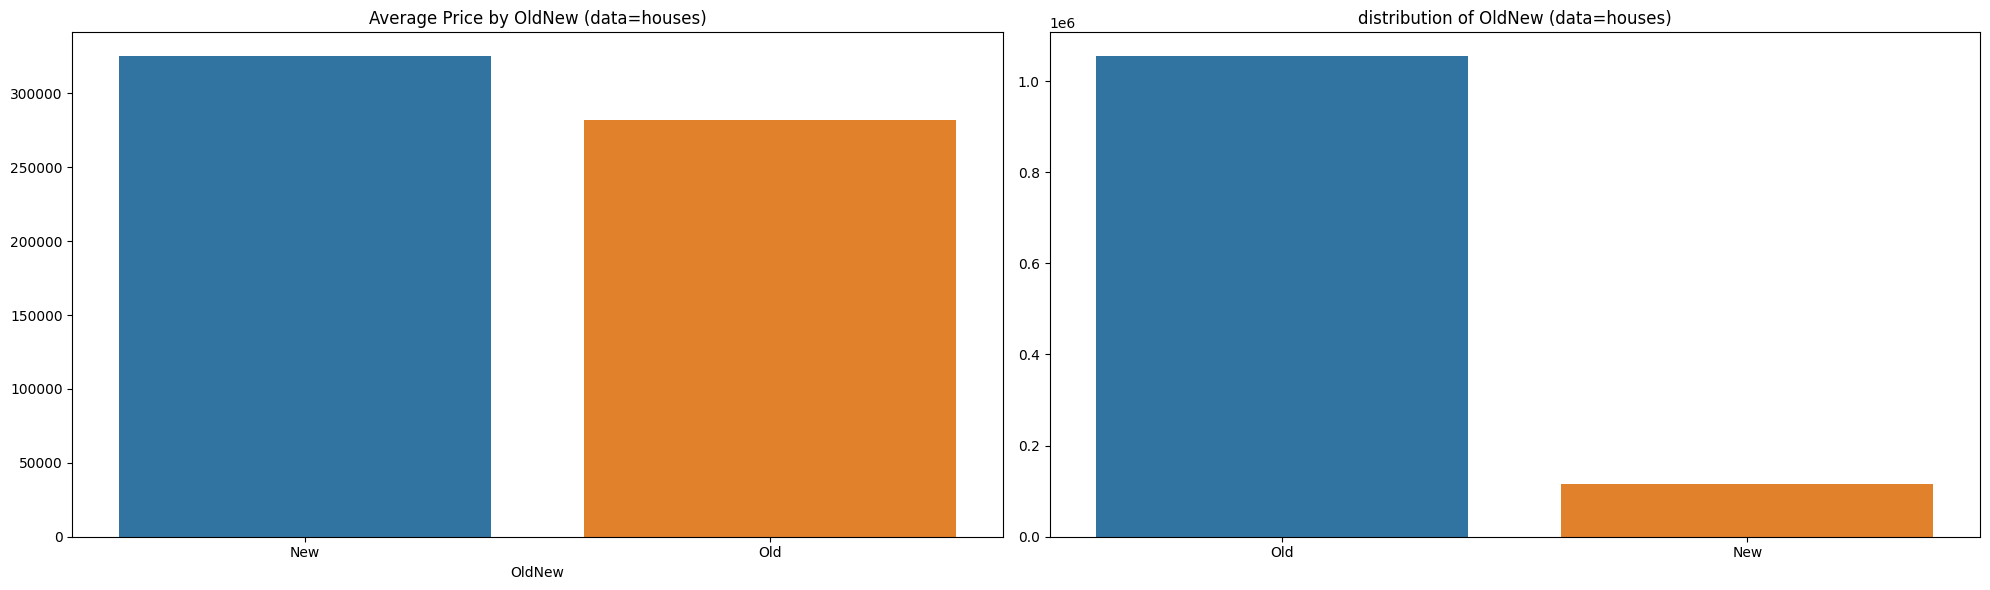

In [49]:
bar_catg_feature("OldNew",df_data = houses)

<b>Conclusion</b>
- The old/used Proprety are domainating type, and slightly more priced than the new ones.
- 'OldNew' proprety can has minor influence on price variation 

<AxesSubplot: xlabel='count', ylabel='Duration'>

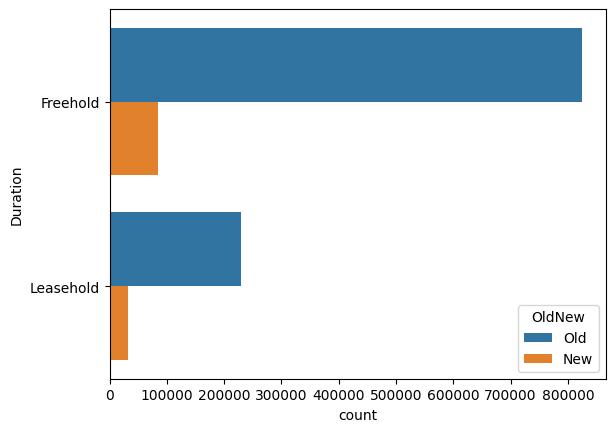

In [50]:
sns.countplot(y="Duration", hue="OldNew", data=houses)

#### 'Duration'

##### Exploration

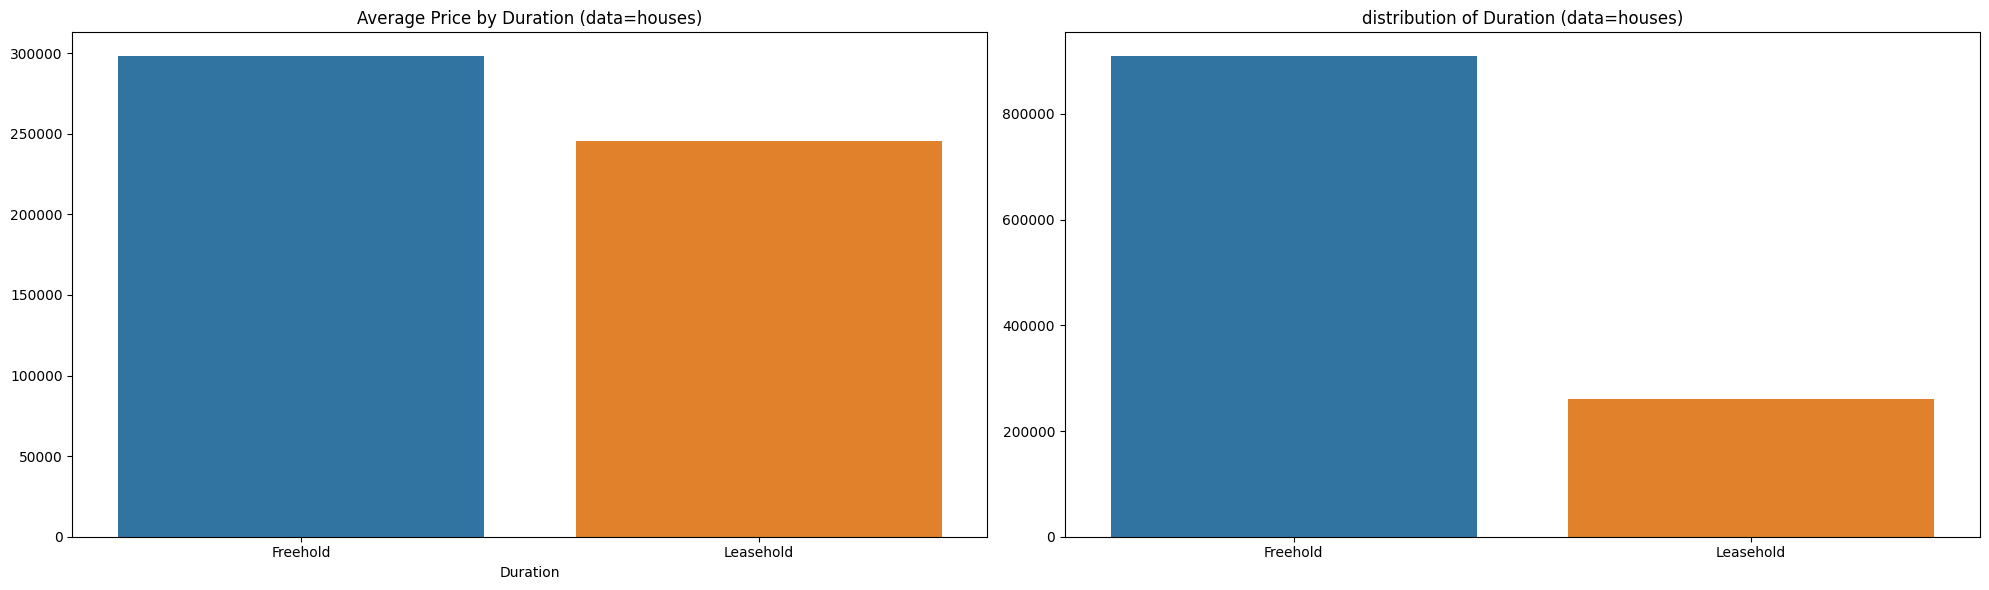

In [51]:
bar_catg_feature("Duration",df_data = houses)

- 'Duration' ~ 'OldNew': both has a slighly impact on 'Price' 

#### 'PPDCategoryType'

##### Exploration

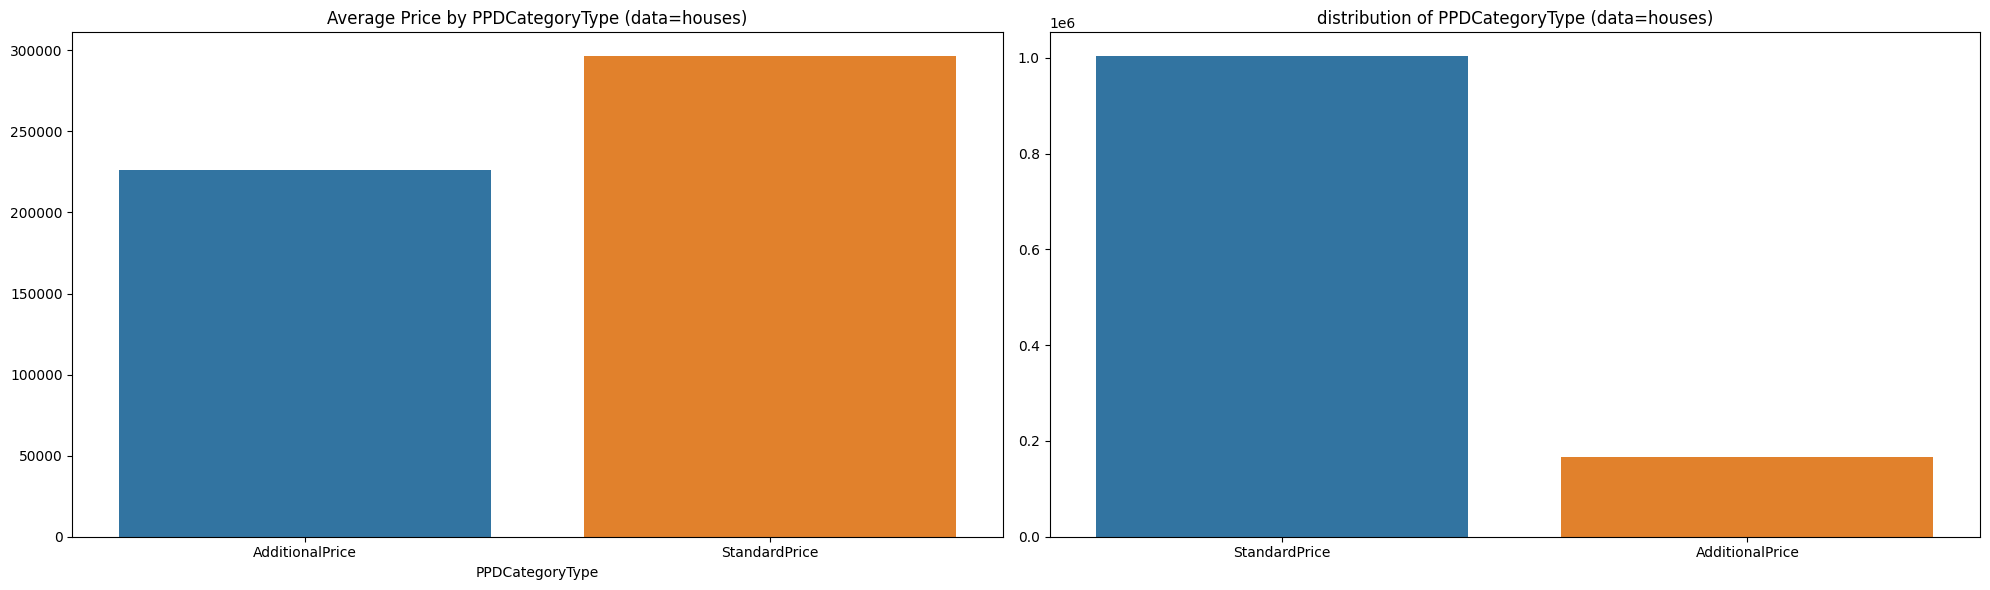

In [52]:
bar_catg_feature("PPDCategoryType",df_data = houses)

<b>Conclusion</b>
- A (Standard Price Paid entry) , B (Additional Price Paid entry), has a strong correlation with price value.
- the number of houses that has 'B' propriety are significantly fewer than 'A' 
- the Target Value is sensitive to the 'PPDCategoryType' variable ---> <b>stratified simpling</b> based on this variable is recommended  

#### 'TransferDate'

##### Exploration

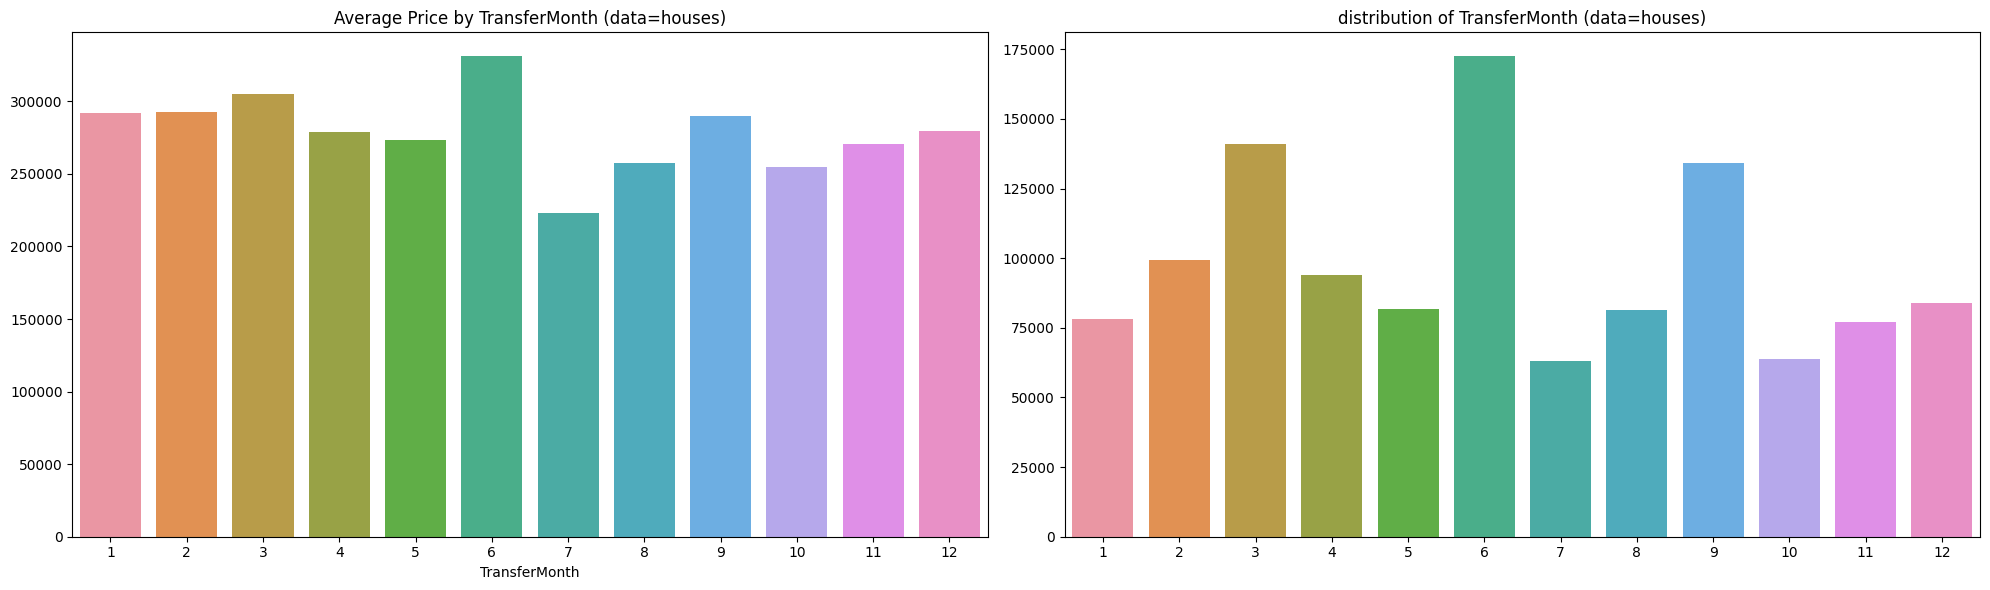

In [53]:
bar_catg_feature("TransferMonth",df_data = houses)

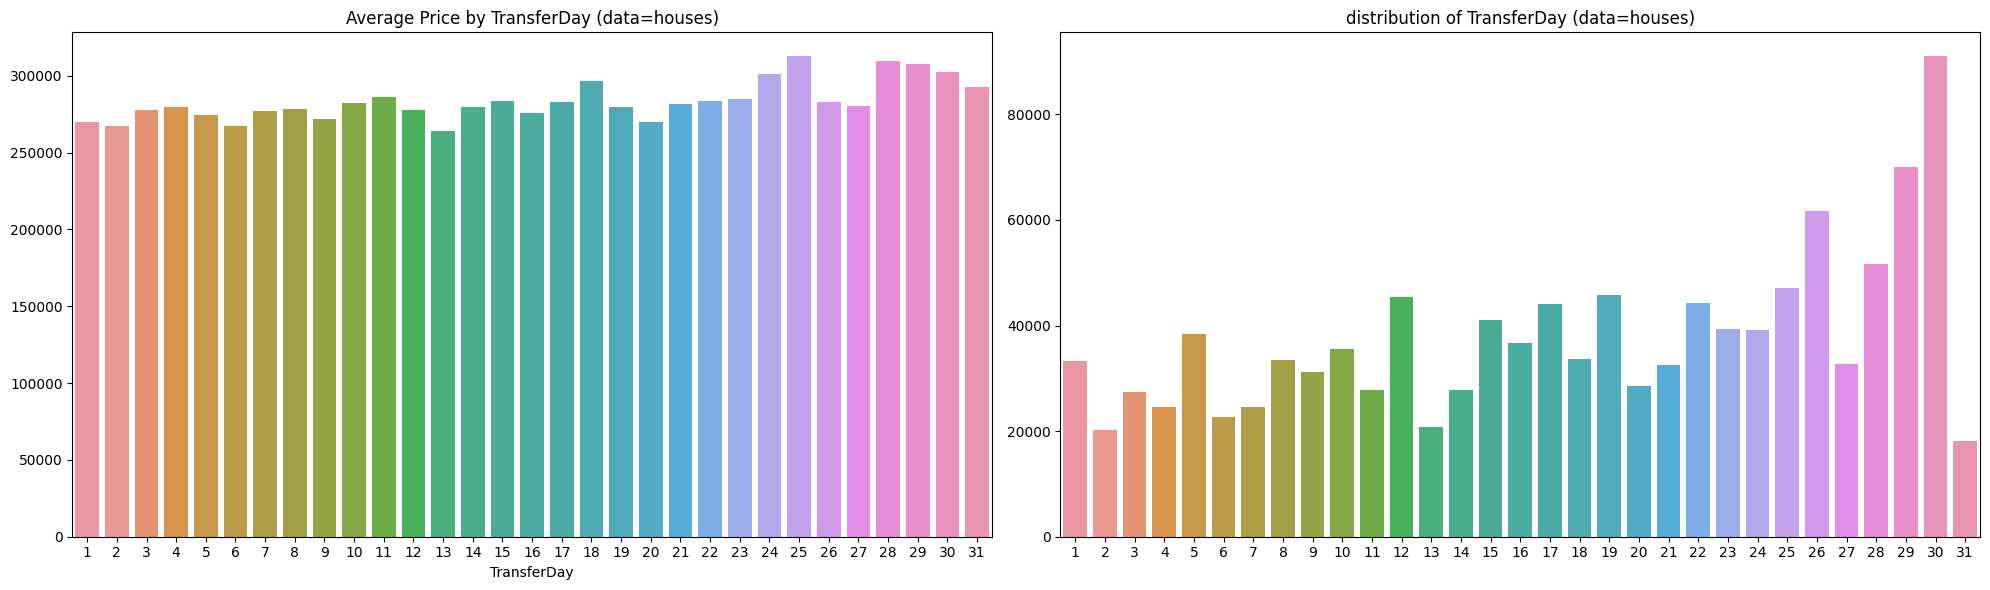

In [55]:
bar_catg_feature("TransferDay",df_data=houses)

<b>Conclusion</b>
- the generated variables of time has a strong variation on price (Ups and Downs), and there is no upward or downward pattern of numbers of transaction
- the Month and Day variable could impact price prediction

### Analysis on 'TownCity', 'District', 'County'

#### "County"

##### Exploration

In [56]:
houses.County.value_counts()

GREATER LONDON             109488
GREATER MANCHESTER          55236
WEST YORKSHIRE              45713
WEST MIDLANDS               44230
KENT                        35458
                            ...  
RUTLAND                       823
NORTHAMPTONSHIRE              693
CUMBERLAND                    191
WESTMORLAND AND FURNESS       164
ISLES OF SCILLY                36
Name: County, Length: 115, dtype: int64

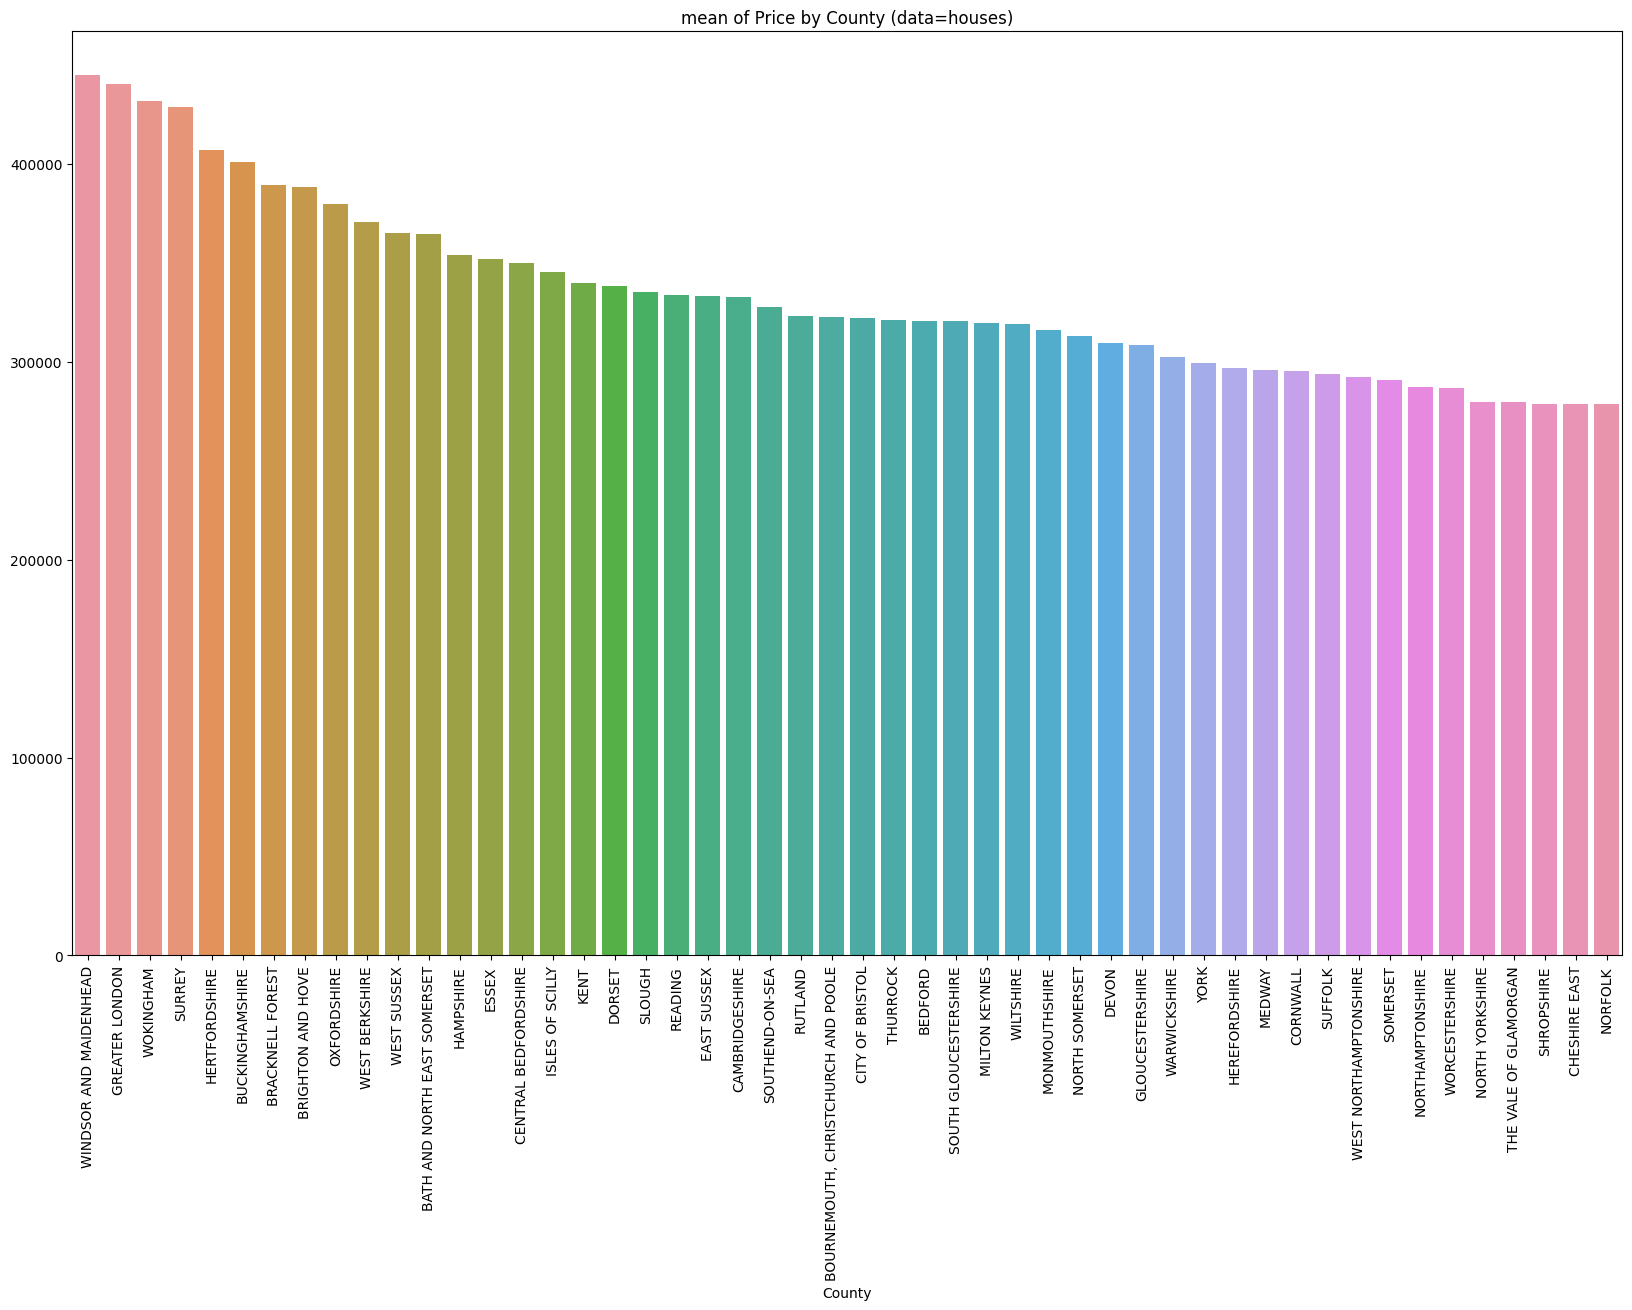

In [57]:
bar_geo_feature("County",df_data = houses)

In [58]:
price_by_County = houses.groupby("County")["Price"].mean().sort_values(ascending=False)
price_by_County.describe()

count      115.000000
mean    262241.277859
std      76256.811603
min     120037.974674
25%     206077.348483
50%     254499.161012
75%     319970.969965
max     444687.613333
Name: Price, dtype: float64

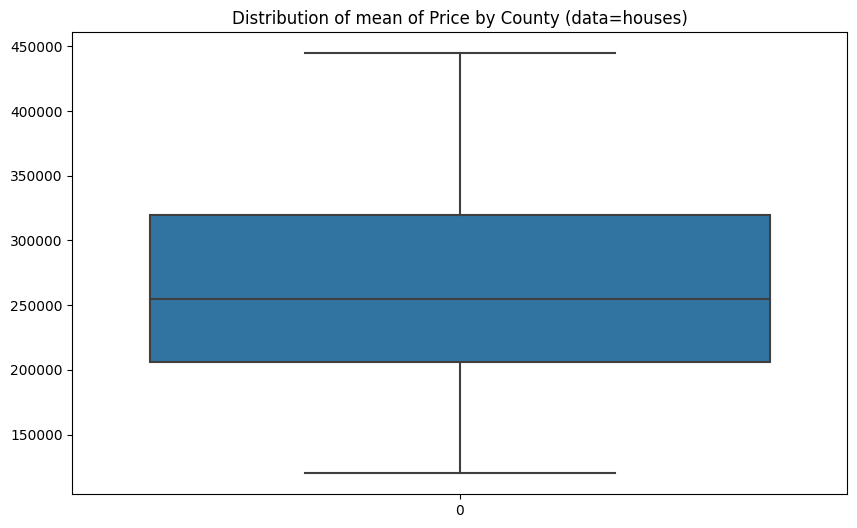

In [59]:
box_geo_feature('County',df_data = houses)

<u>Graph "average Price by County":</u> 
- based on the barplot above , we can see that the 'Price' is strongly depending on 'County' variable
- the variations of the 'Price' versus 'County' happens on different phases :
    - phase 1 : Strong drop of the 'Price'
    then
    - phase 2 : slighly changes over Price value over 'County'


<u>Graph "Distribution of average Price by Country":</u>
- we can see that the most of the population are under approx 60000 with 3 outliers counties, which can consider them as high/Rich counties.
- and we have clear view that 50% of the population are between approx 25000 and 40000 which is a narrow interval vs all population
- we can see 5 section of counties (approx values): lower than ~25000, between(25000,40000), between(40000,55000), greater than 55000 


<b>Conclusion</b>

so based on Graph 1 and 2, we can take some actions:
- devide houses into different categories based on which counties they exist.
- determin 4 County categories:
    - Very Poor = lower than (Q25%-1.5(Q75%-Q25%)
    - Poor = lower than Q25%
    - normal = between(Q25%,Q75%)
    - Rich = between (Q75%,Q75%+1.5(Q75%-Q25%)
    - Very Rich = greater than (Q75%+1.5(Q75%-Q25%)


- lets make this changes 

In [61]:
houses.loc[:,'CountyType'] = categorise("County",df_data=houses)

In [62]:
houses['CountyType'].value_counts(dropna=False)

Normal       326626
Poor         282109
Rich         222642
Very Rich    192272
Very Poor    146561
Name: CountyType, dtype: int64

- lets see how this new feature correlate with the target value

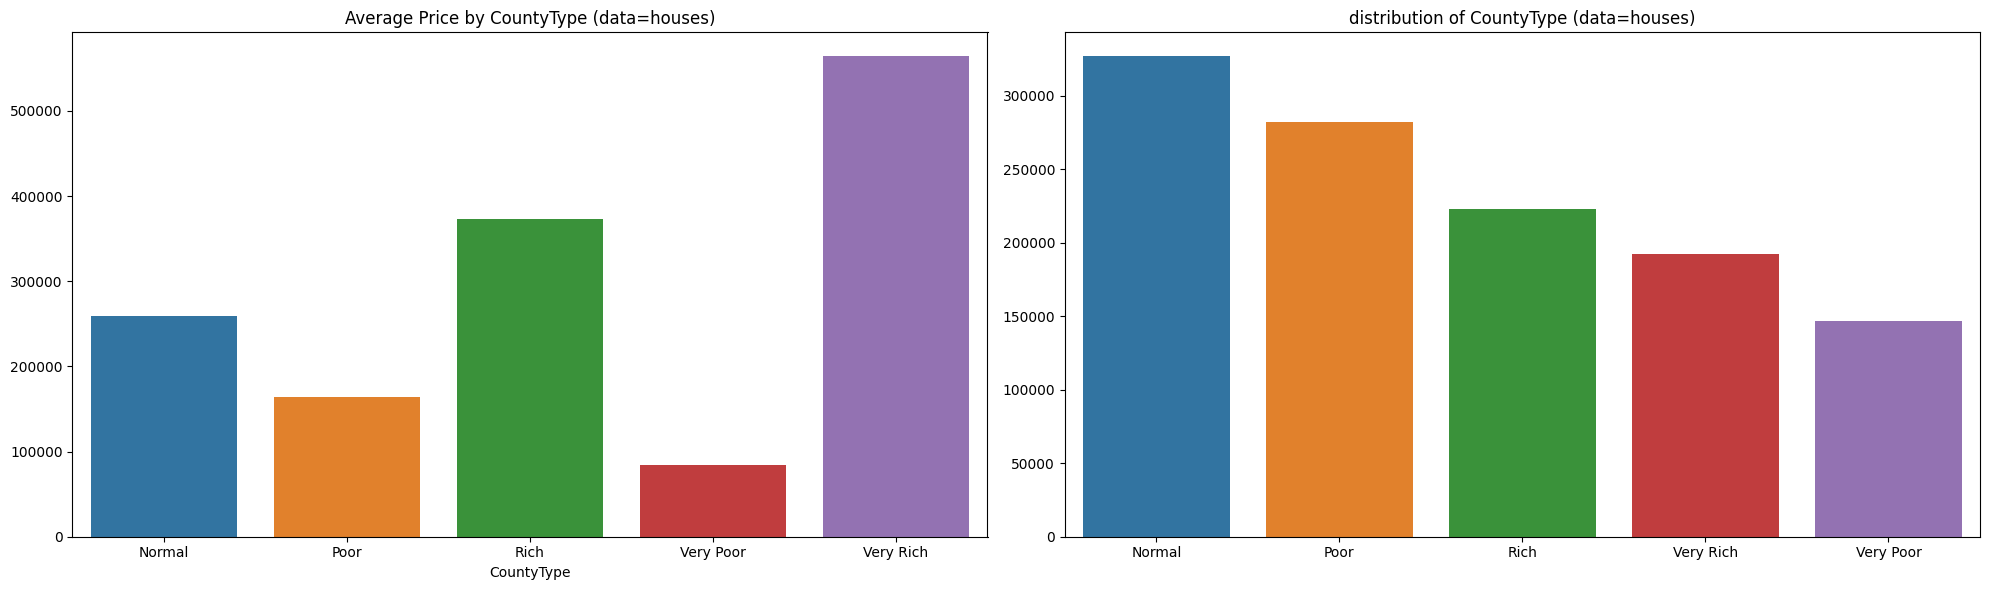

In [63]:
bar_catg_feature('CountyType',df_data = houses)

- as we can see the variation of the price is clear based on this feature : 'CountyType'

#### "District"

- in this area we are going to do the same analysis as "County" variable and see if there is any useful info.

##### Exploration

In [64]:
houses["District"].info()

<class 'pandas.core.series.Series'>
Int64Index: 1170210 entries, 0 to 1247337
Series name: District
Non-Null Count    Dtype 
--------------    ----- 
1170210 non-null  object
dtypes: object(1)
memory usage: 17.9+ MB


In [65]:
houses["District"].value_counts(dropna=False)

BIRMINGHAM         15833
LEEDS              15425
CORNWALL           13978
COUNTY DURHAM      11976
WILTSHIRE          10988
                   ...  
DAVENTRY              85
KETTERING             85
WELLINGBOROUGH        60
CORBY                 39
ISLES OF SCILLY       36
Name: District, Length: 342, dtype: int64

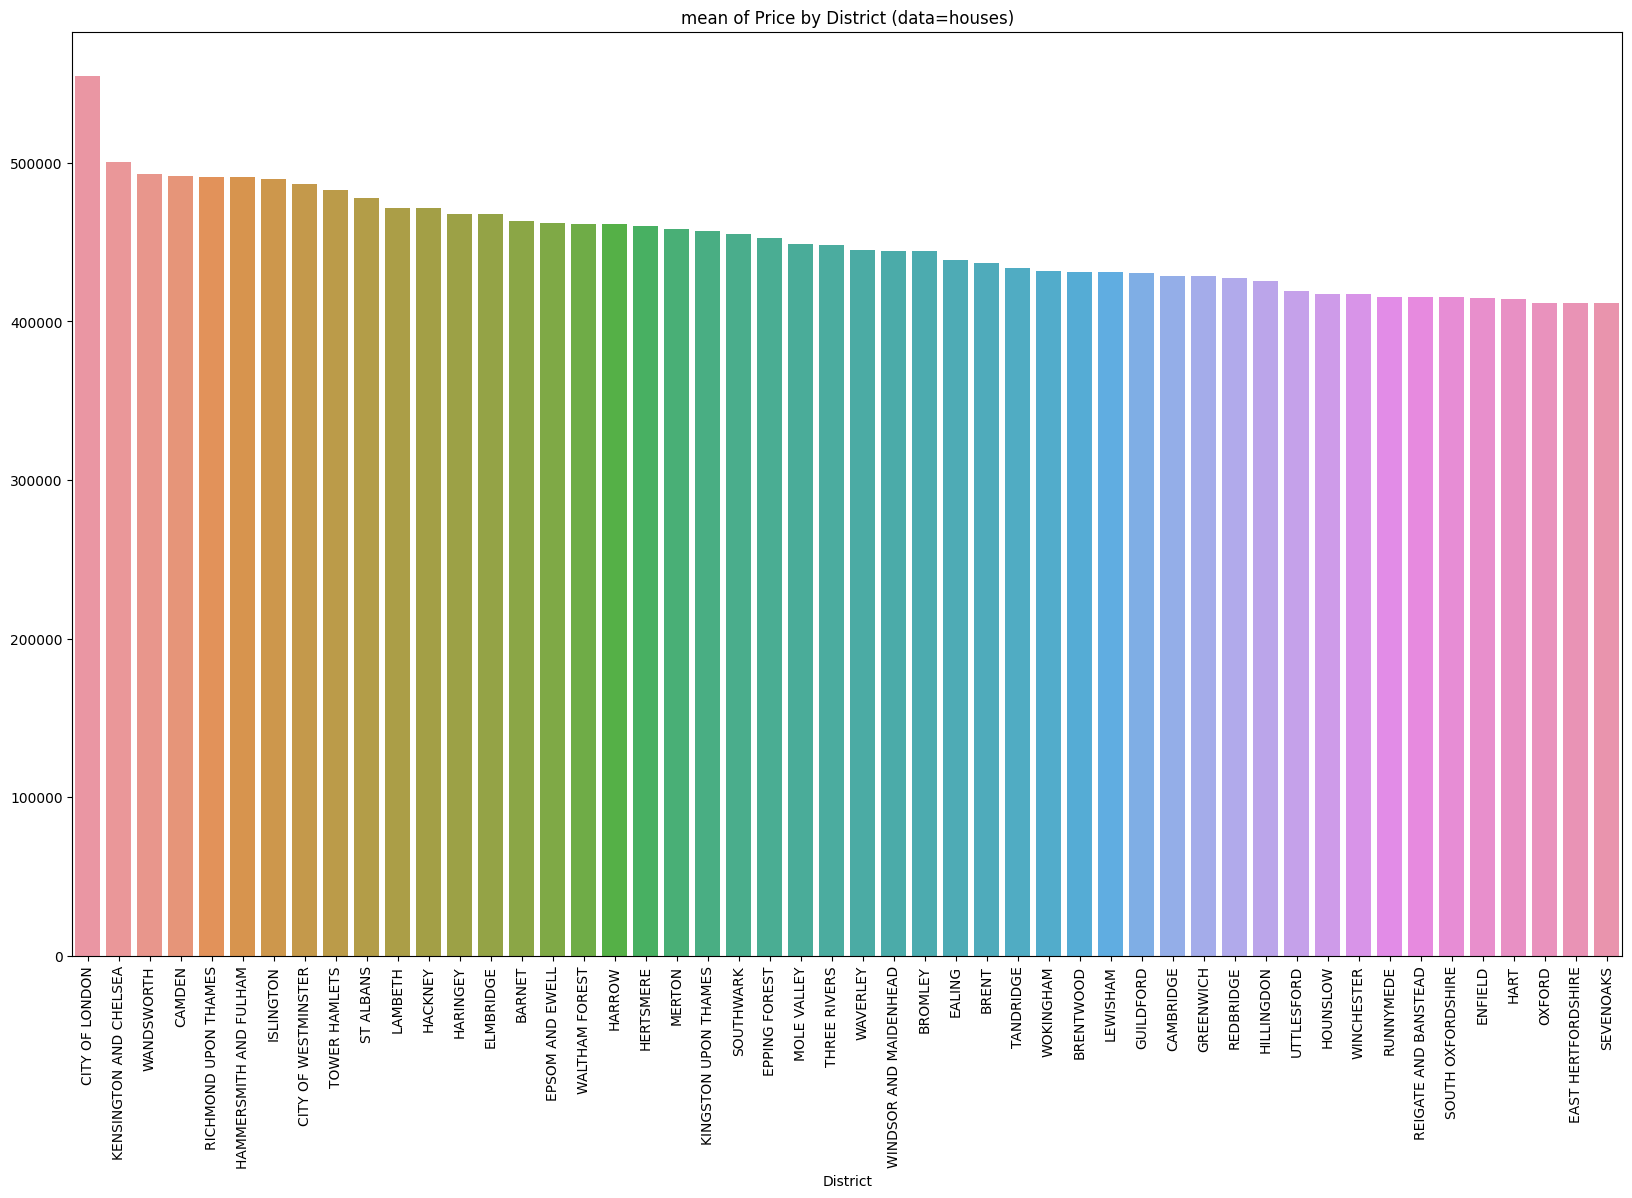

In [66]:
bar_geo_feature("District",df_data = houses)

In [67]:
price_groupedByCol = houses.groupby("District")["Price"].mean().sort_values(ascending=False)
price_groupedByCol.describe()

count      342.000000
mean    296098.030521
std      92845.115755
min     120037.974674
25%     222188.827052
50%     290609.707815
75%     358156.918287
max     554936.819820
Name: Price, dtype: float64

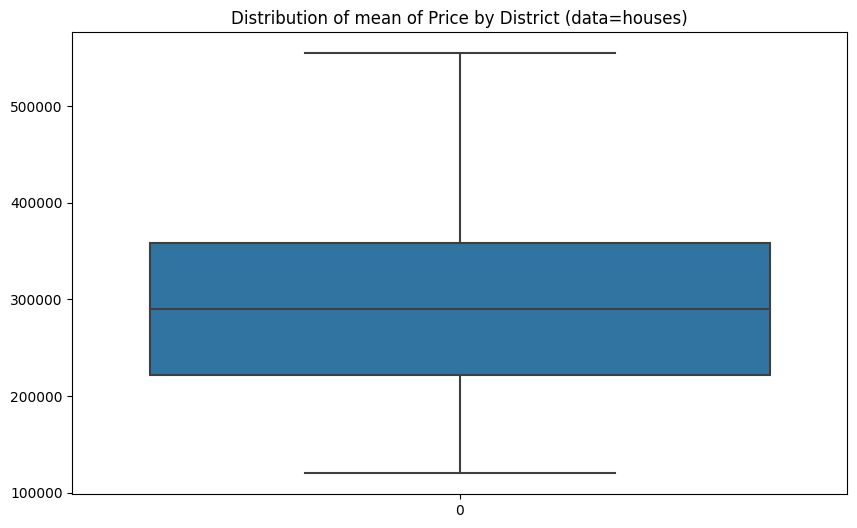

In [68]:
box_geo_feature("District",df_data = houses)

##### Solving Outliers

- based on the two graphs there is a strong variance on 'District' vs 'Price' and it might could help us to get some weight to predict our target, so we will make new feature called 'DistrictType' with values:
    - Very Poor = lower than (Q25%-1.5(Q75%-Q25%)
    - Poor = lower than Q25%
    - normal = between(Q25%,Q75%)
    - Rich = between (Q75%,Q75%+1.5(Q75%-Q25%)
    - Very Rich = greater than (Q75%+1.5(Q75%-Q25%)

In [70]:
houses.loc[:,"DistrictType"] = categorise("District",df_data = houses)

In [71]:
houses["DistrictType"].value_counts(dropna=False)

Normal       363550
Poor         332423
Rich         237898
Very Poor    146561
Very Rich     89778
Name: DistrictType, dtype: int64

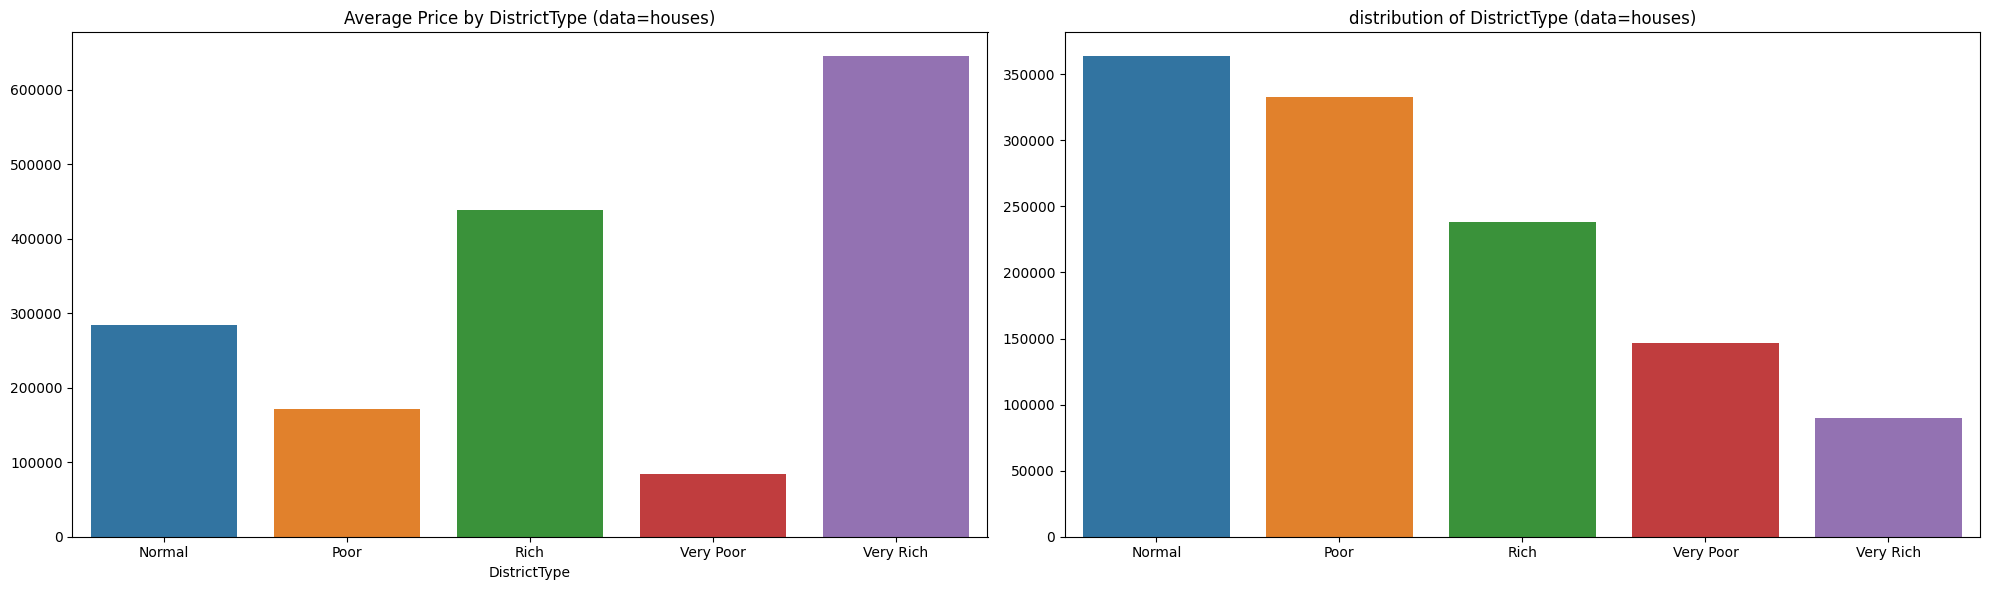

In [72]:
bar_catg_feature("DistrictType",df_data = houses)

#### "TownCity"

##### Exploration

In [73]:
houses["TownCity"].info()

<class 'pandas.core.series.Series'>
Int64Index: 1170210 entries, 0 to 1247337
Series name: TownCity
Non-Null Count    Dtype 
--------------    ----- 
1170210 non-null  object
dtypes: object(1)
memory usage: 17.9+ MB


In [74]:
houses["TownCity"].value_counts(dropna=False)

LONDON           58902
MANCHESTER       19816
BRISTOL          18042
BIRMINGHAM       15983
NOTTINGHAM       15488
                 ...  
NEWCASTLETON         3
DULAS                3
RHOSGOCH             2
LLANSANFFRAID        1
KELSO                1
Name: TownCity, Length: 1147, dtype: int64

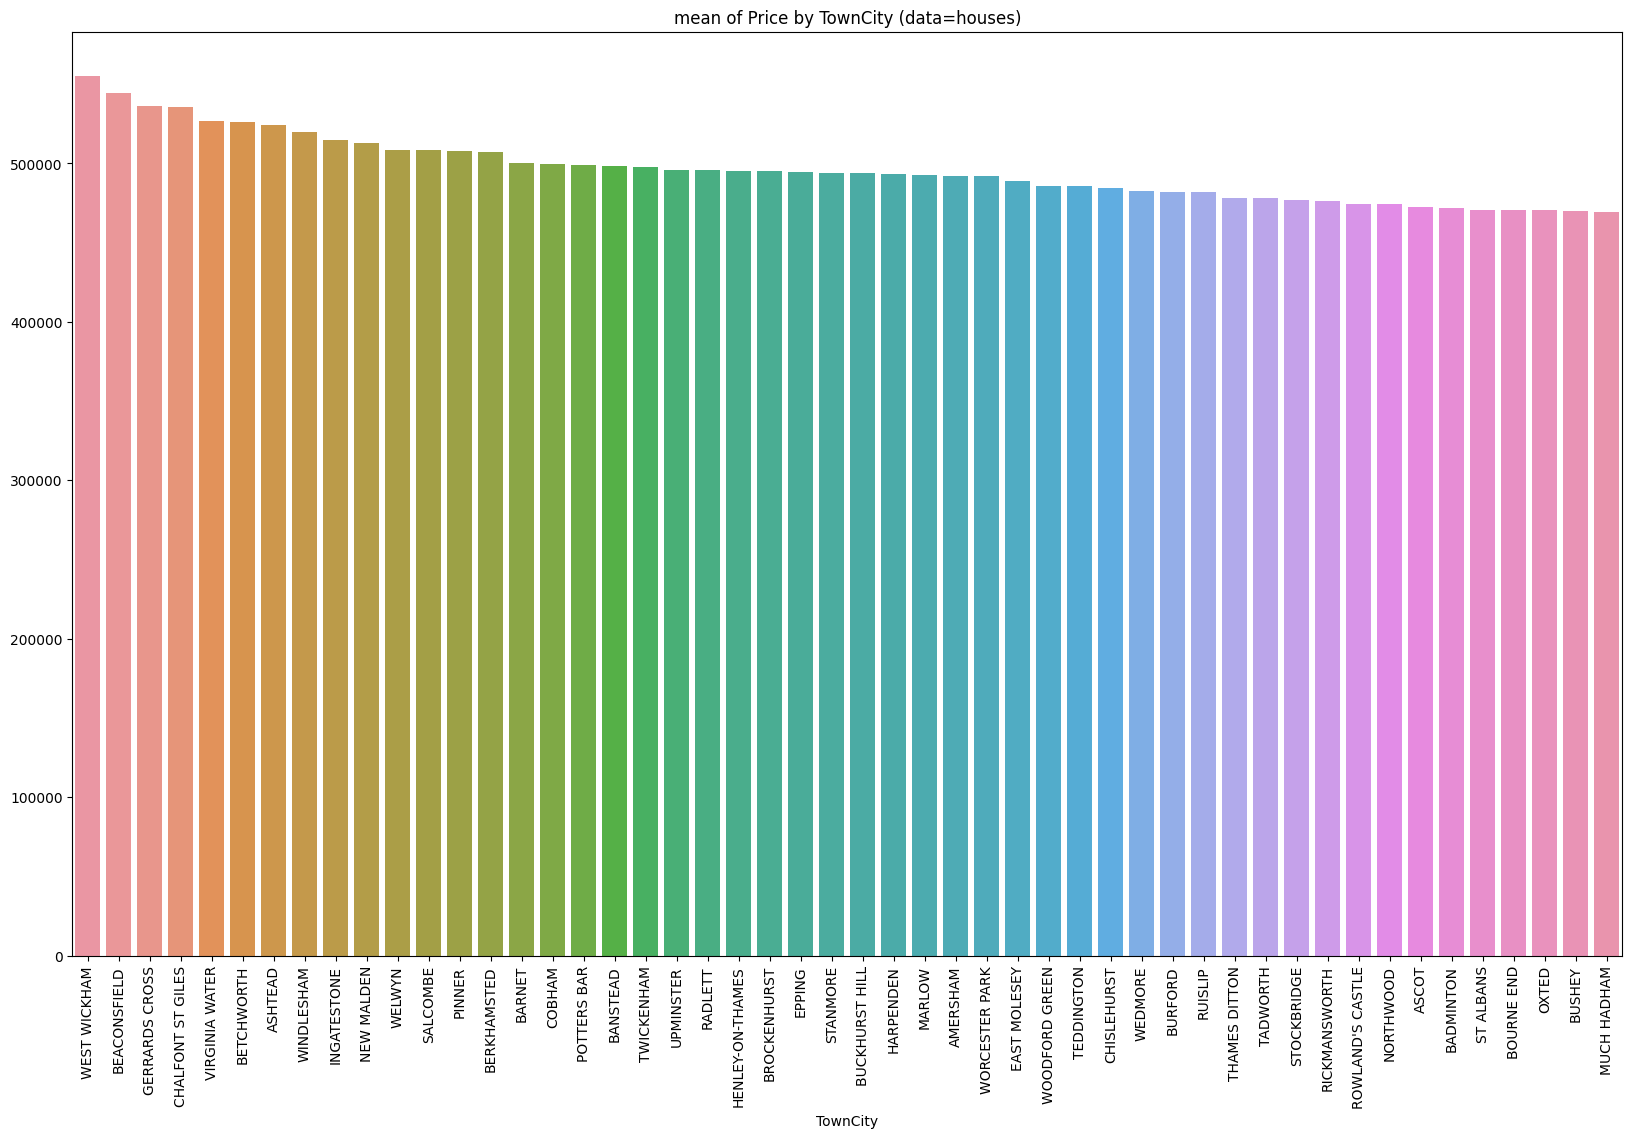

In [75]:
bar_geo_feature("TownCity",df_data = houses)

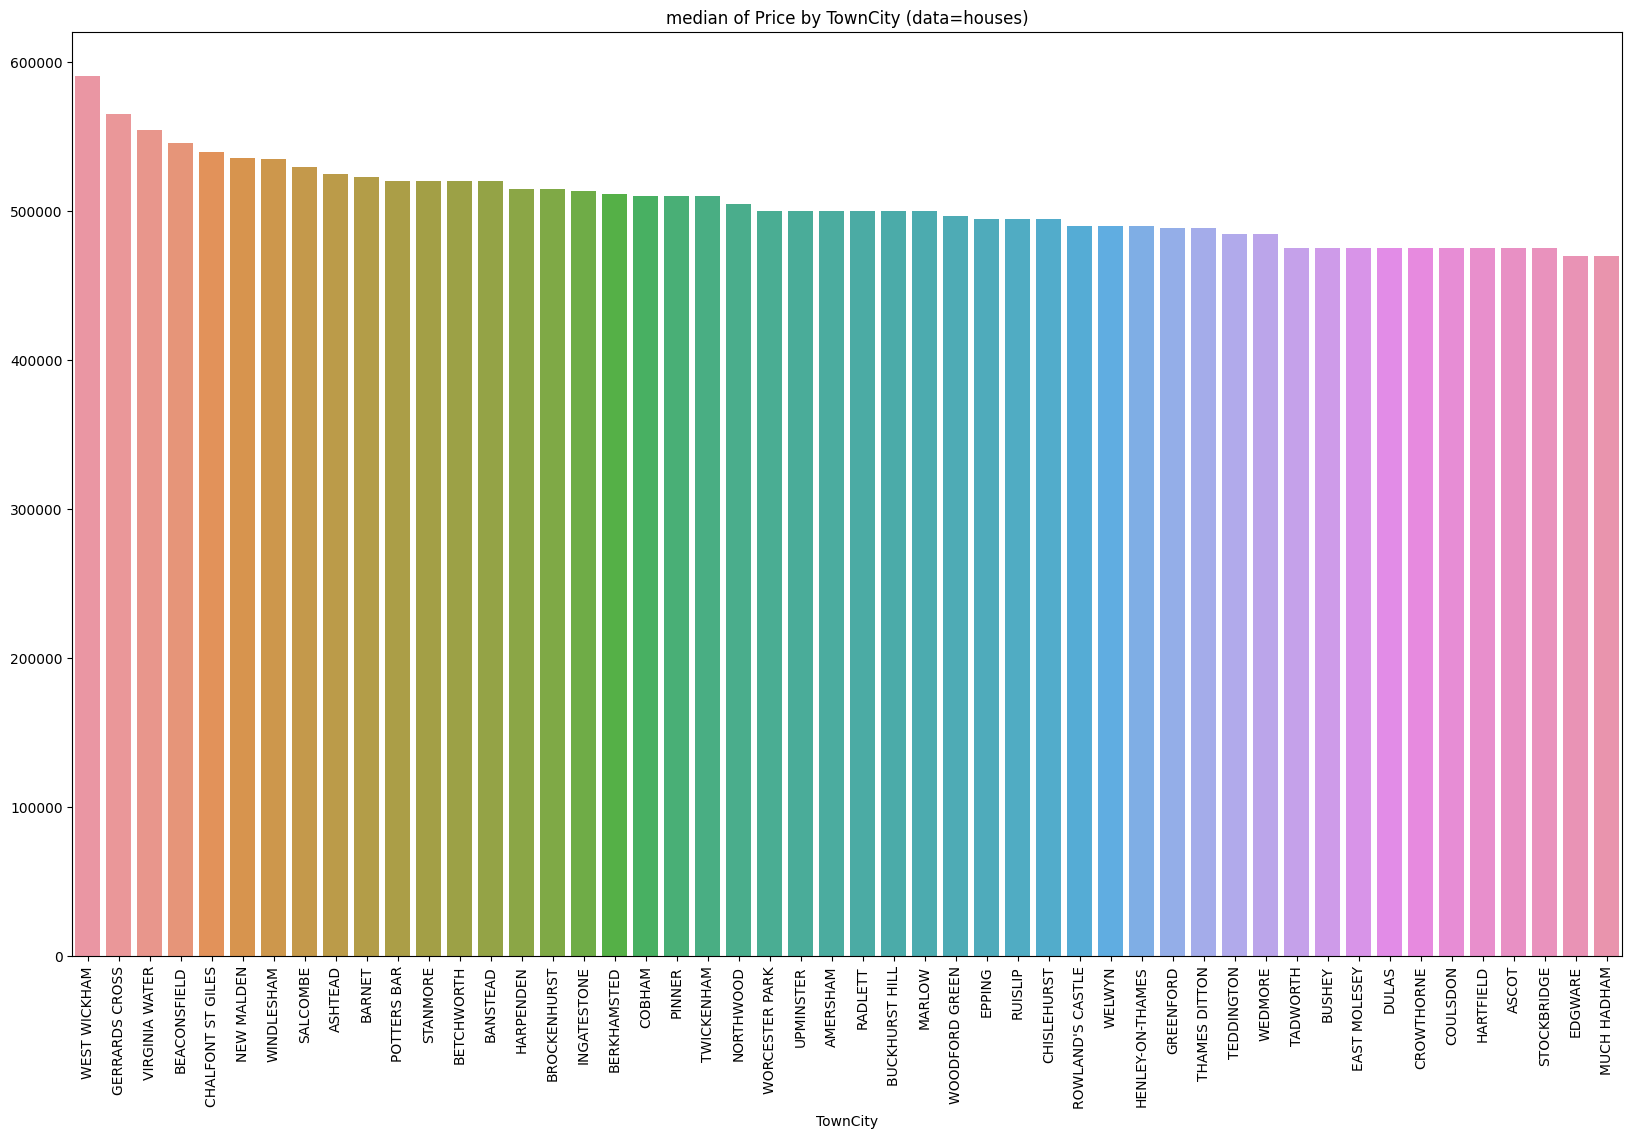

In [76]:
bar_geo_feature("TownCity",df_data = houses,method='median')

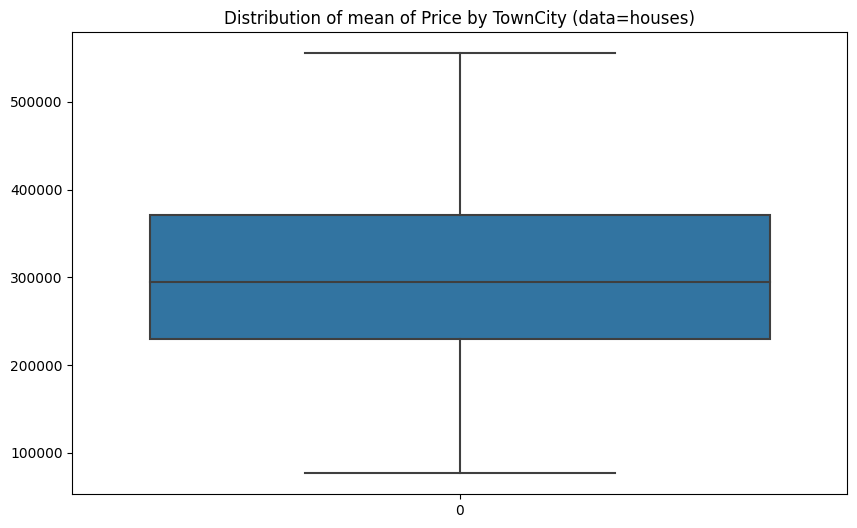

In [77]:
box_geo_feature("TownCity",df_data = houses)

In [78]:
houses.Price.value_counts(bins=100)

(162451.0, 170182.0]    32156
(177913.0, 185644.0]    31975
(224299.0, 232030.0]    30576
(247492.0, 255223.0]    30479
(193375.0, 201106.0]    29263
                        ...  
(726814.0, 734545.0]     1465
(711352.0, 719083.0]     1456
(15562.0, 23293.0]       1320
(765469.0, 773200.0]     1083
(750007.0, 757738.0]      939
Name: Price, Length: 100, dtype: int64

sns.barplot(
    x = houses.Price.value_counts(bins=50).index,
    y=houses.Price.value_counts(bins=50).values
)- taking on considerating the two graphs above:
    - the majority of houses are within a logical tranche of prices, yet there is some outliers that make predicting very abigious target
    - next steps, we'll solve the problem of those outliers

##### Solving Outliers (outdated!!)

- this section is outdated!!

- Identifing outliers for study, lets select them in dataframe and call it: <b>'houses_ExtremCity'</b>
- <b>max_q_TownCity</b>: Bar value for selecting the outliers:
    - max_price_TownCity : maximum value for "average price by TownCity"
    - max_q_TownCity = min(max_price_TownCity,q75%+1.5*(q75%-q25%))

In [82]:
price_groupedByCol = houses.groupby("TownCity")["Price"].mean().sort_values(ascending=False)
price_groupedByCol.describe()

count     1147.000000
mean    300716.948765
std      95574.608767
min      76723.191729
25%     229265.465226
50%     294641.602210
75%     370561.610452
max     555369.297398
Name: Price, dtype: float64

In [83]:
max_q_TownCity = min(price_groupedByCol.describe()["max"],price_groupedByCol.describe()["75%"]+1.5*(price_groupedByCol.describe()["75%"]-price_groupedByCol.describe()["25%"]))
houses_ExtremCity =  houses.loc[houses["Price"]>max_q_TownCity,:]
houses_ExtremCity.head()

Id   Price TransferDate  Postcode  \
0   {CB0035E6-3546-58AE-E053-6B04A8C091AF}  630000   2021-04-29  BN13 3AH   
5   {CB0035E6-354B-58AE-E053-6B04A8C091AF}  676000   2021-08-05   BN1 6NB   
11  {CB0035E6-3552-58AE-E053-6B04A8C091AF}  750000   2021-05-06   BN3 5SA   
12  {CB0035E6-3553-58AE-E053-6B04A8C091AF}  595000   2021-06-04   BN6 9XZ   
31  {CB0035E6-3567-58AE-E053-6B04A8C091AF}  595000   2021-04-29  RH19 1NL   

    PropertyType OldNew  Duration PAON SAON            Street        Locality  \
0       Detached    Old  Freehold    3  NaN   HIGHLANDS CLOSE             NaN   
5       Terraced    Old  Freehold   35  NaN      BALFOUR ROAD             NaN   
11      Detached    Old  Freehold   23  NaN   PORTLAND VILLAS             NaN   
12  SemiDetached    Old  Freehold   11  NaN        IDEN HURST  HURSTPIERPOINT   
31      Detached    Old  Freehold   34  NaN  GARDEN WOOD ROAD             NaN   

          TownCity           District             County PPDCategoryType  \
0         WORTHING           WORTHING        WEST SUSSEX   StandardPrice   
5         BRIGHTON  BRIGHTON AND HOVE  BRIGHTON AND HOVE   StandardPrice   
11            HOVE  BRIGHTON AND HOVE  BRIGHTON AND HOVE   StandardPrice   
12        HASSOCKS         MID SUSSEX        WEST SUSSEX   StandardPrice   
31  EAST GRINSTEAD         MID SUSSEX        WEST SUSSEX   StandardPrice   

   RecordStatus  TransferMonth  TransferDay CountyType DistrictType  
0             A              4           29  Very Rich    Very Rich  
5             A              8            5  Very Rich    Very Rich  
11            A              5            6  Very Rich    Very Rich  
12            A              6            4  Very Rich    Very Rich  
31            A              4           29  Very Rich    Very Rich

In [84]:
houses_ExtremCity.TownCity.value_counts()

LONDON                17313
BRISTOL                1264
READING                 932
CAMBRIDGE               774
ST ALBANS               706
                      ...  
TREFRIW                   1
WALLSEND                  1
BILSTON                   1
BLAENAU FFESTINIOG        1
BLACKWOOD                 1
Name: TownCity, Length: 1079, dtype: int64

In [85]:
houses_ExtremCity_Metrics = houses_ExtremCity.describe()
houses_ExtremCity_Metrics

Price  TransferMonth  TransferDay
count  88425.000000   88425.000000 88425.000000
mean  646358.417393       5.908465    18.653899
std    60236.685334       3.246345     8.894747
min   555411.000000       1.000000     1.000000
25%   595000.000000       3.000000    11.000000
50%   640000.000000       6.000000    20.000000
75%   695000.000000       9.000000    26.000000
max   773200.000000      12.000000    31.000000

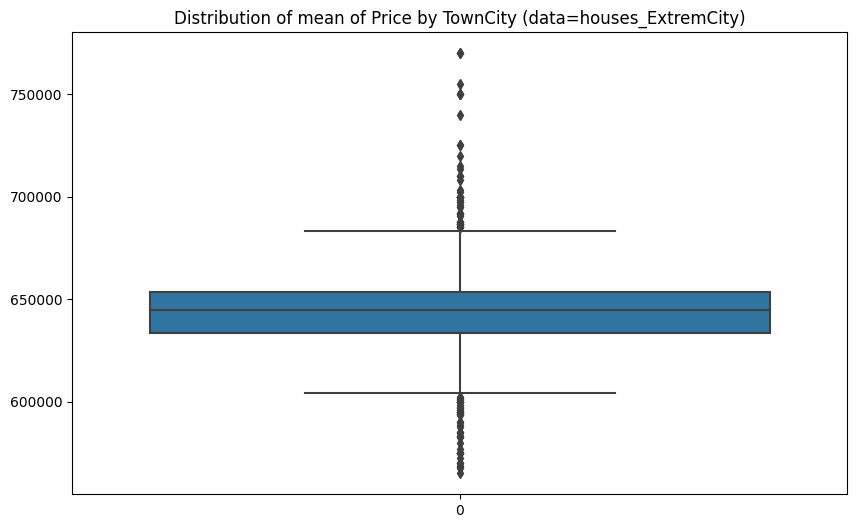

In [87]:
box_geo_feature("TownCity",df_data=houses_ExtremCity)

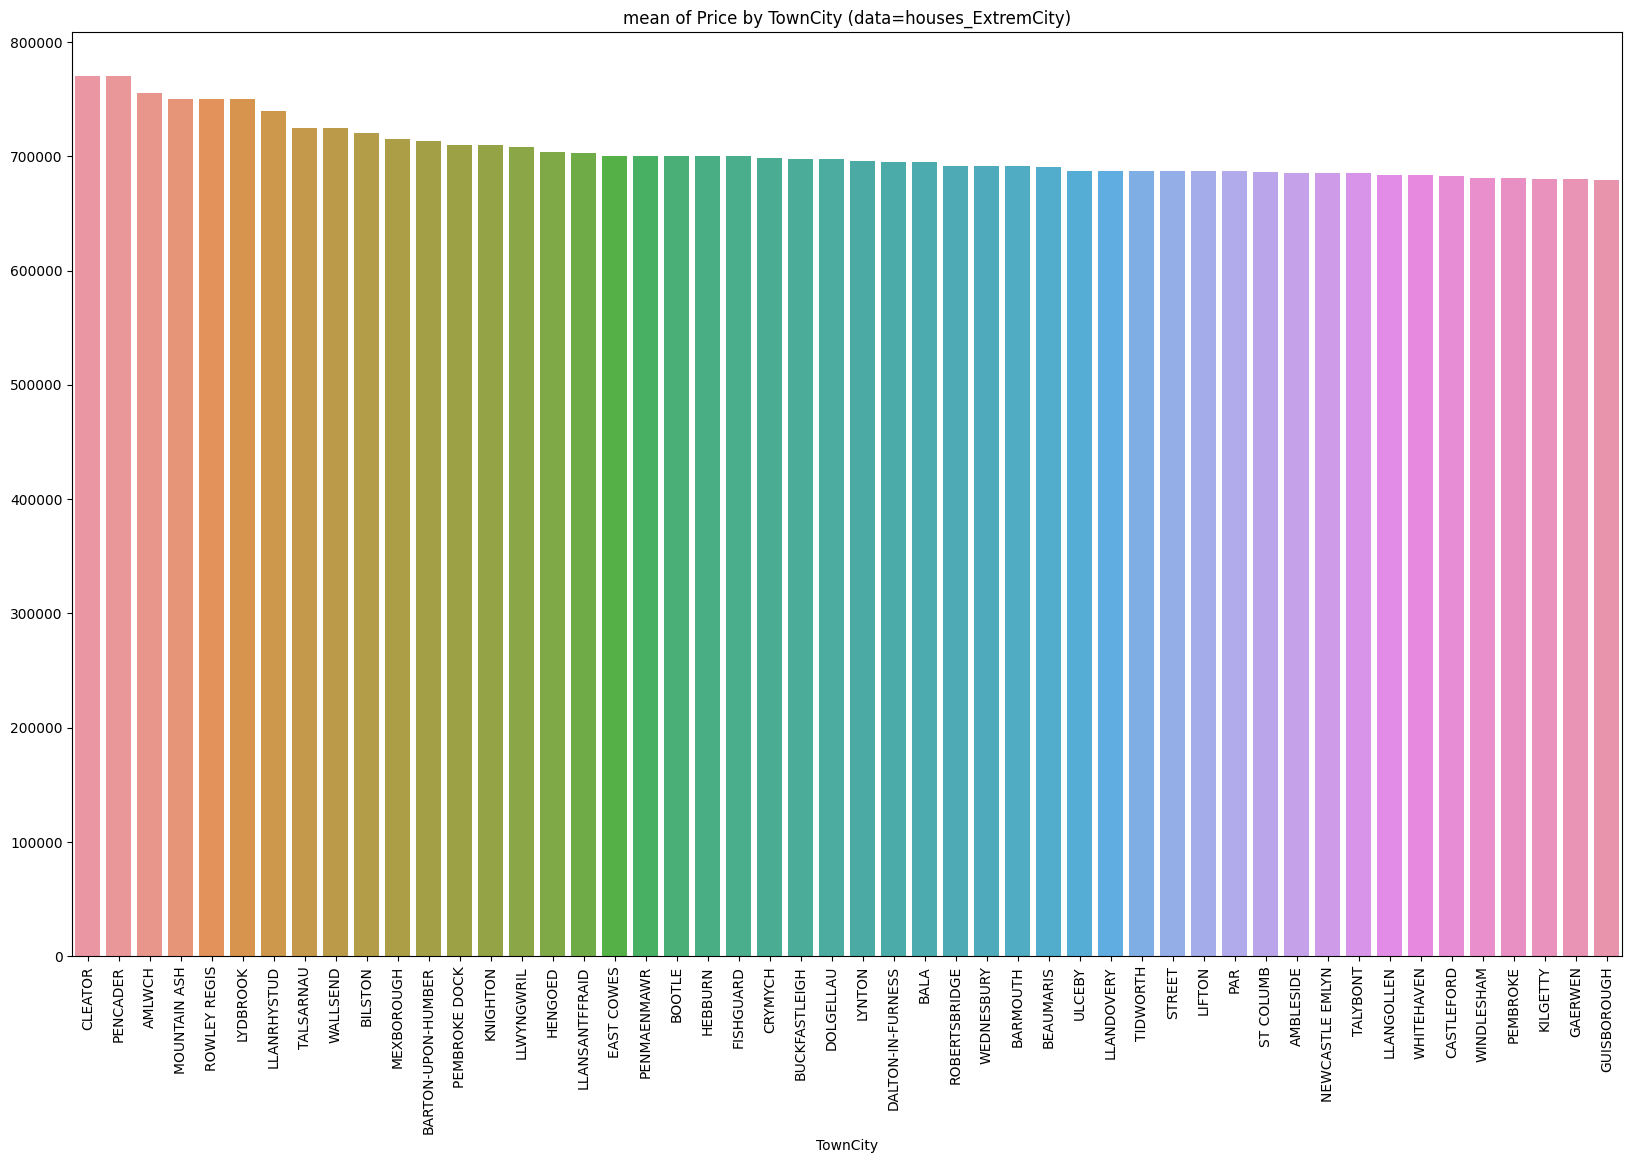

In [88]:
bar_geo_feature("TownCity",df_data=houses_ExtremCity)

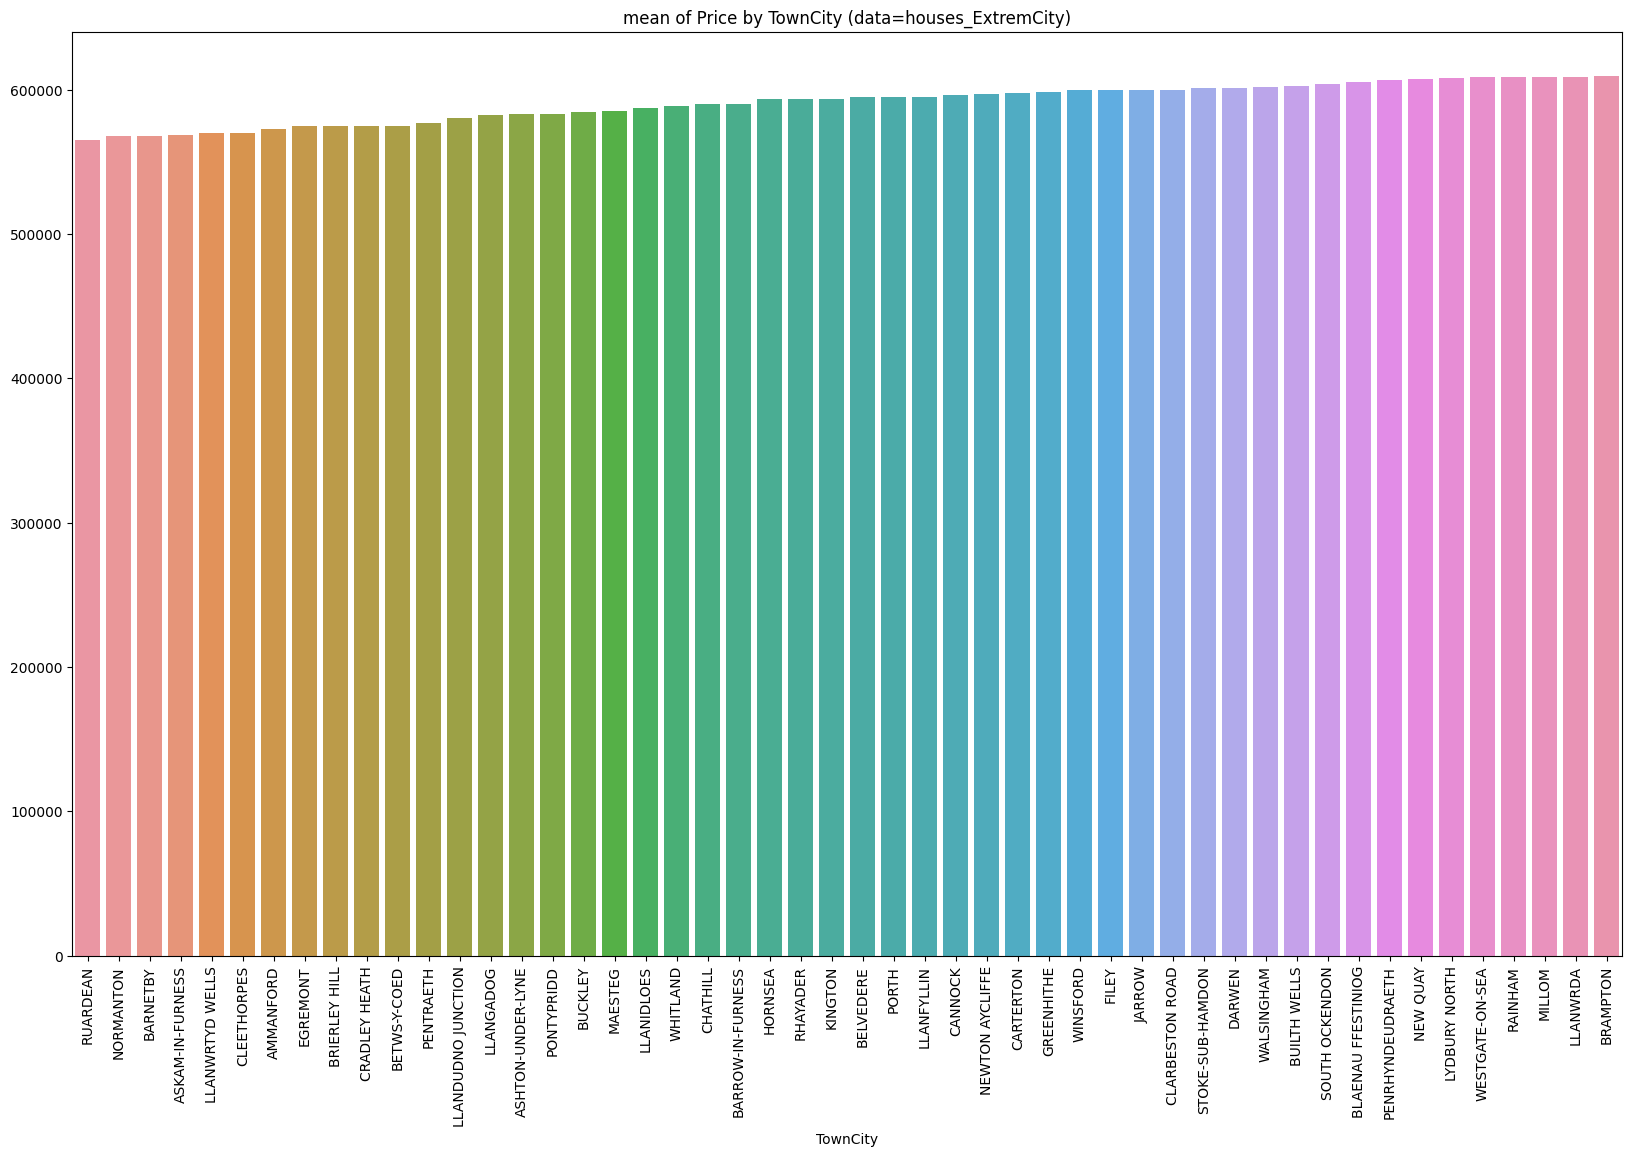

In [89]:
bar_geo_feature("TownCity",df_data=houses_ExtremCity,ascending=True)

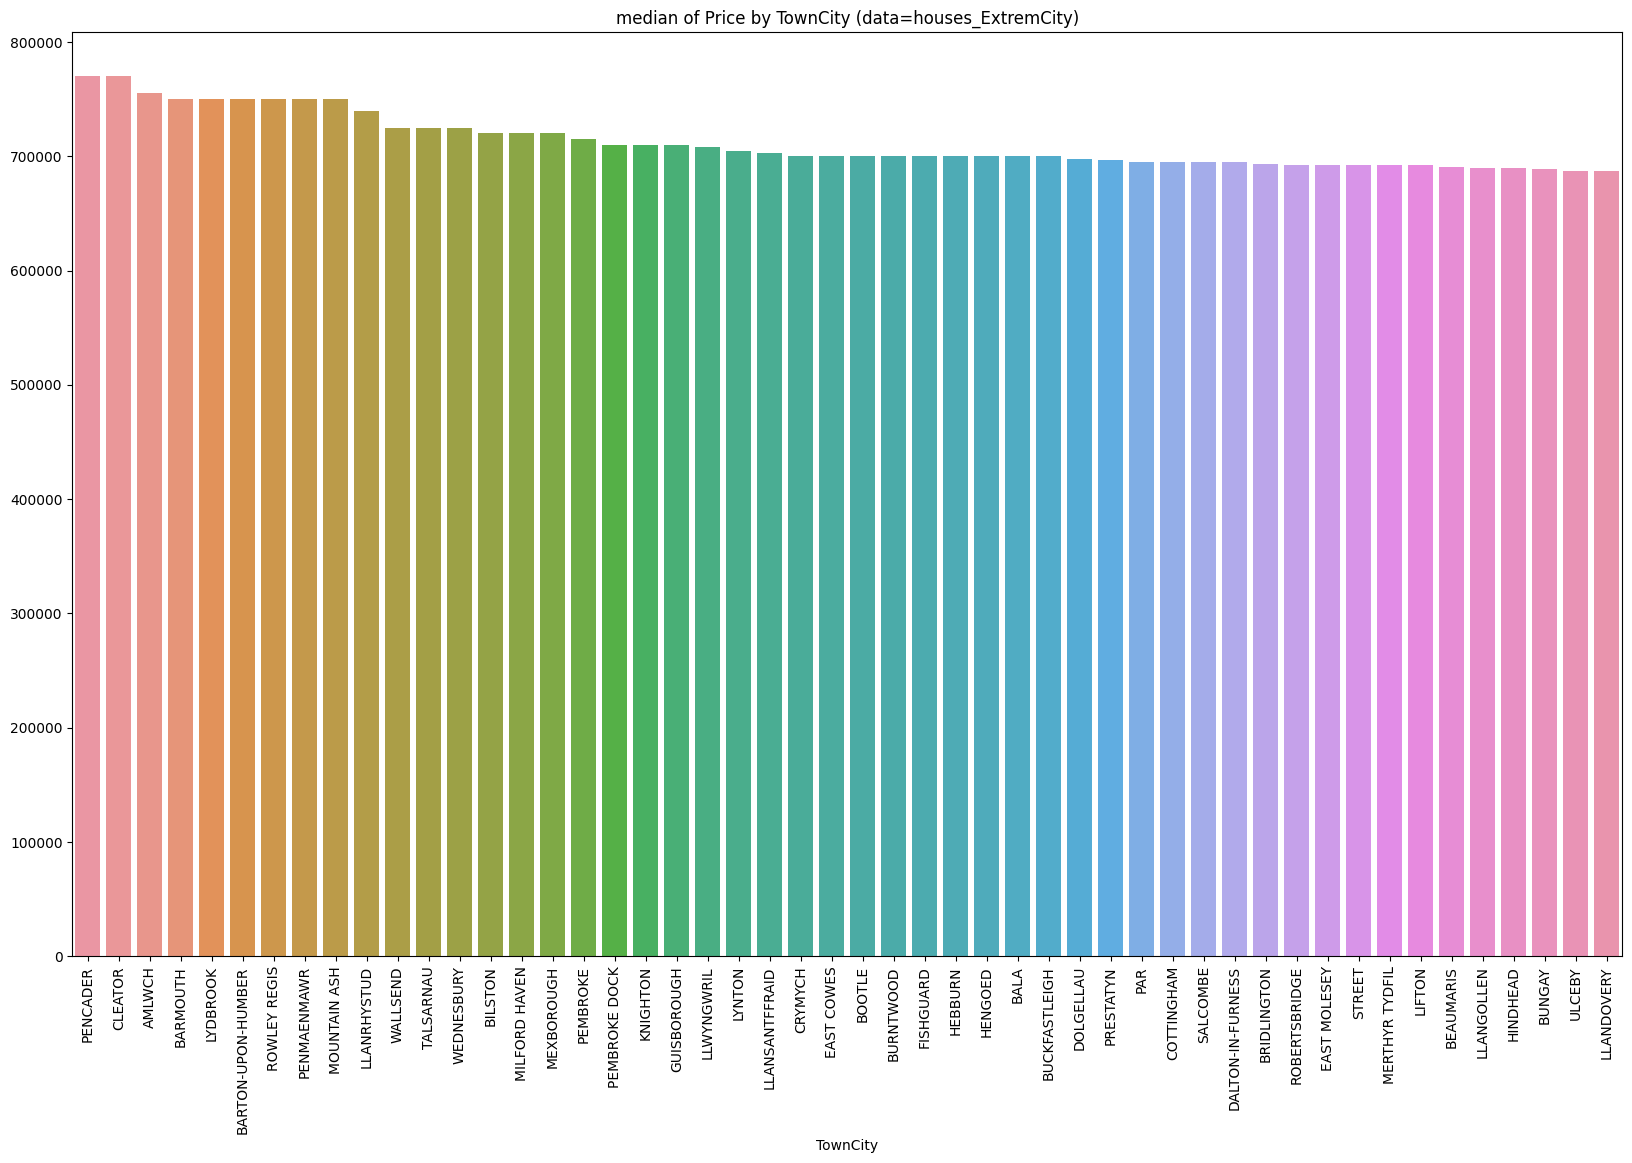

In [90]:
bar_geo_feature("TownCity",df_data=houses_ExtremCity,method='median')

- based on this graph above : "Average Price by TownCity (data=houses_ExtremCity)" we conclude that expensive cities can be classed in 3 major categories:
    - "Extreme" = greater than >=min(max,q75%+1.5*(q75%-q25%))
    - "Very Rich" = between (min(max,q75%+1.5*(q75%-q25%)),q25%)
    - "Rich" = lower than (25%)

- so basicaly, we conclude, the population will be classed as follow:
    -  classify outliers based on conclusions above: "Extreme", "Very Rich", "Rich" (Price >= max_q_TownCity)
    -  classify other houses as "Normal"
    

In [91]:
def categorice_Town(col,df_data):
    price_groupedByCol = df_data.groupby(col)["Price"].mean().sort_values(ascending=False)
    max_q_TownCity = min(price_groupedByCol.describe()["max"],price_groupedByCol.describe()["75%"]+1.5*(price_groupedByCol.describe()["75%"]-price_groupedByCol.describe()["25%"]))
    houses_expensive =  df_data.loc[df_data["Price"]>max_q_TownCity,:]
    cat_col = houses_expensive.groupby(col)['Price'].mean()
    # Calculate the quartiles:
    q25 = np.percentile(cat_col, 25)
    q75 = np.percentile(cat_col, 75)
    max_q = min(cat_col.max(),q75+1.5*(q75-q25))
    min_q = max(cat_col.min(),q25-1.5*(q75-q25))
    # caterg
    def col_cat(x,q25,q75,max_q,outlier_bar):
        if (x["Price"] <= outlier_bar): return 'Normal'
        elif (x["Price"]>= outlier_bar) and (x["Price"] < q25): return "Rich"
        elif(x["Price"] >= q25) and (x["Price"] <= max_q) : return "Very Rich"
        else: return "Extreme"
        
    return df_data.apply(
        lambda x: col_cat(
            x,
            q25=q25,
            q75=q75,
            max_q=max_q,
            outlier_bar=max_q_TownCity
        ),
        axis=1
    )

In [92]:
houses.loc[:,"TownCityType"] = categorice_Town("TownCity",df_data = houses)

In [93]:
houses.TownCityType.value_counts()

Normal       1081785
Rich           42127
Extreme        26021
Very Rich      20277
Name: TownCityType, dtype: int64

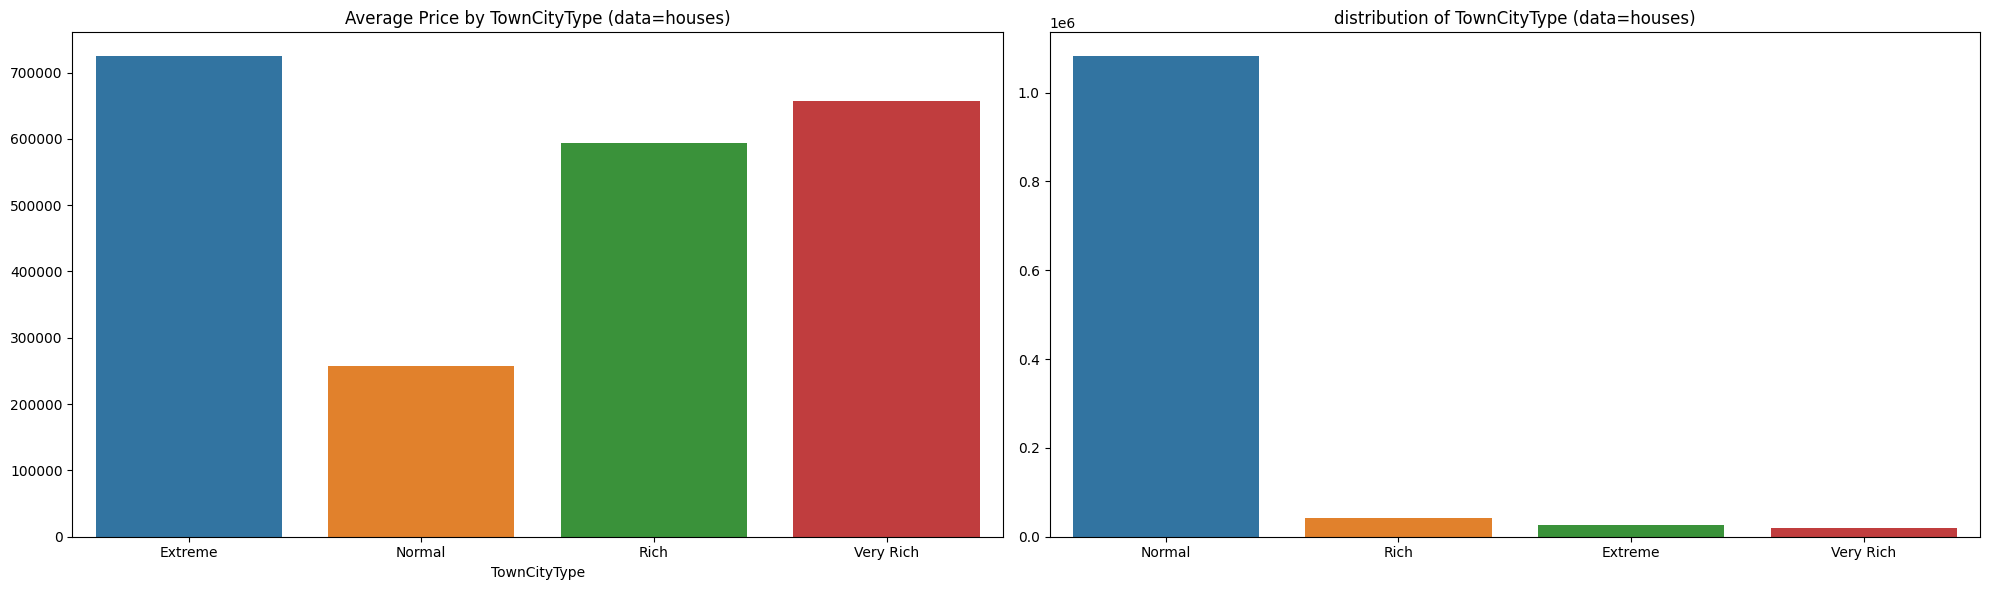

In [94]:
bar_catg_feature("TownCityType",df_data=houses)

- Based on the graph above, we can see now we are able to see the difference of average prices based on TownCity variable, which leads us to ne feature: <b>"TownCityType"</b>

## Data Encoding

### Selection

In [79]:
houses.head()

Id   Price TransferDate  Postcode  \
0  {CB0035E6-3546-58AE-E053-6B04A8C091AF}  630000   2021-04-29  BN13 3AH   
1  {CB0035E6-3547-58AE-E053-6B04A8C091AF}  477000   2021-05-10  BN16 2PQ   
2  {CB0035E6-3548-58AE-E053-6B04A8C091AF}  370000   2021-05-06   BN2 4HZ   
3  {CB0035E6-3549-58AE-E053-6B04A8C091AF}  462500   2021-04-28   BN2 0GP   
4  {CB0035E6-354A-58AE-E053-6B04A8C091AF}  433000   2021-08-06   BN8 4LS   

  PropertyType OldNew  Duration PAON SAON           Street    Locality  \
0     Detached    Old  Freehold    3  NaN  HIGHLANDS CLOSE         NaN   
1     Detached    Old  Freehold   10  NaN   CHAUCER AVENUE  RUSTINGTON   
2     Terraced    Old  Freehold    6  NaN  DARTMOUTH CLOSE         NaN   
3     Terraced    Old  Freehold   18  NaN   STANLEY STREET         NaN   
4     Detached    Old  Freehold   11  NaN      POWELL ROAD      NEWICK   

        TownCity           District             County PPDCategoryType  \
0       WORTHING           WORTHING        WEST SUSSEX   StandardPrice   
1  LITTLEHAMPTON               ARUN        WEST SUSSEX   StandardPrice   
2       BRIGHTON  BRIGHTON AND HOVE  BRIGHTON AND HOVE   StandardPrice   
3       BRIGHTON  BRIGHTON AND HOVE  BRIGHTON AND HOVE   StandardPrice   
4          LEWES              LEWES        EAST SUSSEX   StandardPrice   

  RecordStatus  TransferMonth  TransferDay CountyType DistrictType  
0            A              4           29  Very Rich    Very Rich  
1            A              5           10  Very Rich         Rich  
2            A              5            6       Rich         Rich  
3            A              4           28  Very Rich         Rich  
4            A              8            6       Rich         Rich

- Before Modeling, we select our input features: (encoding --> (heatmap,scatterplot))
    - PropertyType
    - OldNew
    - Duration
    - PPDCategoryType
    - TransferMonth
    - TransferDay
    - CountyType
    - DistrictType
    - TownCityType

In [95]:
selected_features = [
    'Price',
    "PropertyType",
    "OldNew",
    "Duration",
    "PPDCategoryType",
    "TransferMonth",
    "TransferDay",
    "CountyType",
    "DistrictType",
    "TownCityType"
]
houses = houses.loc[:,selected_features]

In [96]:
houses.head()

Price PropertyType OldNew  Duration PPDCategoryType  TransferMonth  \
0  630000     Detached    Old  Freehold   StandardPrice              4   
1  477000     Detached    Old  Freehold   StandardPrice              5   
2  370000     Terraced    Old  Freehold   StandardPrice              5   
3  462500     Terraced    Old  Freehold   StandardPrice              4   
4  433000     Detached    Old  Freehold   StandardPrice              8   

   TransferDay CountyType DistrictType TownCityType  
0           29  Very Rich    Very Rich         Rich  
1           10  Very Rich         Rich       Normal  
2            6       Rich         Rich       Normal  
3           28  Very Rich         Rich       Normal  
4            6       Rich         Rich       Normal

In [97]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170210 entries, 0 to 1247337
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Price            1170210 non-null  int64 
 1   PropertyType     1170210 non-null  object
 2   OldNew           1170210 non-null  object
 3   Duration         1170210 non-null  object
 4   PPDCategoryType  1170210 non-null  object
 5   TransferMonth    1170210 non-null  int64 
 6   TransferDay      1170210 non-null  int64 
 7   CountyType       1170210 non-null  object
 8   DistrictType     1170210 non-null  object
 9   TownCityType     1170210 non-null  object
dtypes: int64(3), object(7)
memory usage: 98.2+ MB


### Encoding

In [174]:
houses_encoded = houses.copy().reset_index(drop=True)

In [175]:
houses_encoded

Price PropertyType OldNew   Duration  PPDCategoryType  \
0        630000     Detached    Old   Freehold    StandardPrice   
1        477000     Detached    Old   Freehold    StandardPrice   
2        370000     Terraced    Old   Freehold    StandardPrice   
3        462500     Terraced    Old   Freehold    StandardPrice   
4        433000     Detached    Old   Freehold    StandardPrice   
...         ...          ...    ...        ...              ...   
1170205  158000     Terraced    Old   Freehold  AdditionalPrice   
1170206  105000         Flat    Old  Leasehold  AdditionalPrice   
1170207  239000     Terraced    Old   Freehold  AdditionalPrice   
1170208  190000     Terraced    Old   Freehold  AdditionalPrice   
1170209  210000     Terraced    Old   Freehold  AdditionalPrice   

         TransferMonth  TransferDay CountyType DistrictType TownCityType  
0                    4           29  Very Rich    Very Rich         Rich  
1                    5           10  Very Rich         Rich       Normal  
2                    5            6       Rich         Rich       Normal  
3                    4           28  Very Rich         Rich       Normal  
4                    8            6       Rich         Rich       Normal  
...                ...          ...        ...          ...          ...  
1170205             12           17       Poor         Poor       Normal  
1170206              5           26  Very Poor    Very Poor       Normal  
1170207             10            5     Normal       Normal       Normal  
1170208              9            8       Poor         Poor       Normal  
1170209             10            5     Normal         Poor       Normal  

[1170210 rows x 10 columns]

In [176]:
houses_encoded.OldNew.value_counts(dropna=False)

Old    1054386
New     115824
Name: OldNew, dtype: int64

In [177]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
houses_encoded['PPDCategoryType'] = label_encoder.fit_transform(houses_encoded['PPDCategoryType'])
houses_encoded['OldNew'] = label_encoder.fit_transform(houses_encoded['OldNew'])
houses_encoded['Duration'] = label_encoder.fit_transform(houses_encoded['Duration'])

In [178]:
from sklearn.preprocessing import OneHotEncoder

categ_features = [
    "PropertyType",
    "TransferMonth",
    "CountyType",
    "DistrictType",
    "TownCityType"
]

one_hot_encoder = OneHotEncoder(sparse_output=False) # feature_name_combiner=lambda x,y:str(x)+"_"+str(y)
encoded_categ_features = one_hot_encoder.fit_transform(houses_encoded[categ_features])

df_encoded_categ_features = pd.DataFrame(
    encoded_categ_features, 
    columns = one_hot_encoder.get_feature_names_out(categ_features)
)
df_encoded_categ_features

PropertyType_Detached  PropertyType_Flat  PropertyType_Other  \
0                     1.000000           0.000000            0.000000   
1                     1.000000           0.000000            0.000000   
2                     0.000000           0.000000            0.000000   
3                     0.000000           0.000000            0.000000   
4                     1.000000           0.000000            0.000000   
...                        ...                ...                 ...   
1170205               0.000000           0.000000            0.000000   
1170206               0.000000           1.000000            0.000000   
1170207               0.000000           0.000000            0.000000   
1170208               0.000000           0.000000            0.000000   
1170209               0.000000           0.000000            0.000000   

         PropertyType_SemiDetached  PropertyType_Terraced  TransferMonth_1  \
0                         0.000000               0.000000         0.000000   
1                         0.000000               0.000000         0.000000   
2                         0.000000               1.000000         0.000000   
3                         0.000000               1.000000         0.000000   
4                         0.000000               0.000000         0.000000   
...                            ...                    ...              ...   
1170205                   0.000000               1.000000         0.000000   
1170206                   0.000000               0.000000         0.000000   
1170207                   0.000000               1.000000         0.000000   
1170208                   0.000000               1.000000         0.000000   
1170209                   0.000000               1.000000         0.000000   

         TransferMonth_2  TransferMonth_3  TransferMonth_4  TransferMonth_5  \
0               0.000000         0.000000         1.000000         0.000000   
1               0.000000         0.000000         0.000000         1.000000   
2               0.000000         0.000000         0.000000         1.000000   
3               0.000000         0.000000         1.000000         0.000000   
4               0.000000         0.000000         0.000000         0.000000   
...                  ...              ...              ...              ...   
1170205         0.000000         0.000000         0.000000         0.000000   
1170206         0.000000         0.000000         0.000000         1.000000   
1170207         0.000000         0.000000         0.000000         0.000000   
1170208         0.000000         0.000000         0.000000         0.000000   
1170209         0.000000         0.000000         0.000000         0.000000   

         ...  CountyType_Very Rich  DistrictType_Normal  DistrictType_Poor  \
0        ...              1.000000             0.000000           0.000000   
1        ...              1.000000             0.000000           0.000000   
2        ...              0.000000             0.000000           0.000000   
3        ...              1.000000             0.000000           0.000000   
4        ...              0.000000             0.000000           0.000000   
...      ...                   ...                  ...                ...   
1170205  ...              0.000000             0.000000           1.000000   
1170206  ...              0.000000             0.000000           0.000000   
1170207  ...              0.000000             1.000000           0.000000   
1170208  ...              0.000000             0.000000           1.000000   
1170209  ...              0.000000             0.000000           1.000000   

         DistrictType_Rich  DistrictType_Very Poor  DistrictType_Very Rich  \
0                 0.000000                0.000000                1.000000   
1                 1.000000                0.000000                0.000000   
2                 1.000000                0.000000                0.000000 

In [179]:
houses_encoded = pd.concat([houses_encoded,df_encoded_categ_features], axis=1)
houses_encoded

Price PropertyType  OldNew  Duration  PPDCategoryType  \
0        630000     Detached       1         0                1   
1        477000     Detached       1         0                1   
2        370000     Terraced       1         0                1   
3        462500     Terraced       1         0                1   
4        433000     Detached       1         0                1   
...         ...          ...     ...       ...              ...   
1170205  158000     Terraced       1         0                0   
1170206  105000         Flat       1         1                0   
1170207  239000     Terraced       1         0                0   
1170208  190000     Terraced       1         0                0   
1170209  210000     Terraced       1         0                0   

         TransferMonth  TransferDay CountyType DistrictType TownCityType  ...  \
0                    4           29  Very Rich    Very Rich         Rich  ...   
1                    5           10  Very Rich         Rich       Normal  ...   
2                    5            6       Rich         Rich       Normal  ...   
3                    4           28  Very Rich         Rich       Normal  ...   
4                    8            6       Rich         Rich       Normal  ...   
...                ...          ...        ...          ...          ...  ...   
1170205             12           17       Poor         Poor       Normal  ...   
1170206              5           26  Very Poor    Very Poor       Normal  ...   
1170207             10            5     Normal       Normal       Normal  ...   
1170208              9            8       Poor         Poor       Normal  ...   
1170209             10            5     Normal         Poor       Normal  ...   

         CountyType_Very Rich  DistrictType_Normal  DistrictType_Poor  \
0                    1.000000             0.000000           0.000000   
1                    1.000000             0.000000           0.000000   
2                    0.000000             0.000000           0.000000   
3                    1.000000             0.000000           0.000000   
4                    0.000000             0.000000           0.000000   
...                       ...                  ...                ...   
1170205              0.000000             0.000000           1.000000   
1170206              0.000000             0.000000           0.000000   
1170207              0.000000             1.000000           0.000000   
1170208              0.000000             0.000000           1.000000   
1170209              0.000000             0.000000           1.000000   

         DistrictType_Rich  DistrictType_Very Poor  DistrictType_Very Rich  \
0                 0.000000                0.000000                1.000000   
1                 1.000000                0.000000                0.000000   
2                 1.000000                0.000000                0.000000   
3                 1.000000                0.000000                0.000000   
4                 1.000000                0.000000                0.000000   
...                    ...                     ...                     ...   
1170205           0.000000                0.000000                0.000000   
1170206           0.000000                1.000000                0.000000   
1170207           0.000000                0.000000                0.000000   
1170208           0.000000                0.000000                0.000000   
1170209           0.000000                0.000000                0.000000   

         TownCityType_Extreme  TownCityType_Normal  TownCityType_Rich  \
0                    0.000000             0.000000           1.000000   
1                    0.000000             1.000000           0.000000   
2                    0.000000             1.000000           0.000000   
3                    0.000000             1.000000           0.000000   
4                    0.000000             1.000000   

In [180]:
houses_encoded.drop(
    [
        "PropertyType",
        "TransferMonth",
        "TransferDay",
        "CountyType",
        "DistrictType",
        "TownCityType"
    ],
    axis=1,
    inplace=True
)

In [182]:
input_features_encoded = [k for k in houses_encoded.columns if k != "Price"]
# [
#     'OldNew', 
#     'Duration', 
#     'PPDCategoryType',
#     'PropertyType_Detached', 
#     'PropertyType_Flat', 
#     'PropertyType_Other',
#     'PropertyType_SemiDetached', 
#     'PropertyType_Terraced', 
#     'CountyType_Normal',
#     'CountyType_Poor', 
#     'CountyType_Rich', 
#     'CountyType_Very Poor',
#     'CountyType_Very Rich',
#     'DistrictType_Normal', 
#     'DistrictType_Poor',
#     'DistrictType_Rich', 
#     'DistrictType_Very Poor', 
#     'DistrictType_Very Rich',
#     'TownCityType_Extreme', 
#     'TownCityType_Normal', 
#     'TownCityType_Rich',
#     'TownCityType_Very Rich'
# ] 
houses_encoded = houses_encoded.astype(
    {
        k:int for k in input_features_encoded
    }
)

In [183]:
houses_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170210 entries, 0 to 1170209
Data columns (total 35 columns):
 #   Column                     Non-Null Count    Dtype
---  ------                     --------------    -----
 0   Price                      1170210 non-null  int64
 1   OldNew                     1170210 non-null  int64
 2   Duration                   1170210 non-null  int64
 3   PPDCategoryType            1170210 non-null  int64
 4   PropertyType_Detached      1170210 non-null  int64
 5   PropertyType_Flat          1170210 non-null  int64
 6   PropertyType_Other         1170210 non-null  int64
 7   PropertyType_SemiDetached  1170210 non-null  int64
 8   PropertyType_Terraced      1170210 non-null  int64
 9   TransferMonth_1            1170210 non-null  int64
 10  TransferMonth_2            1170210 non-null  int64
 11  TransferMonth_3            1170210 non-null  int64
 12  TransferMonth_4            1170210 non-null  int64
 13  TransferMonth_5            1170210 non-nul

In [184]:
houses_encoded.corr()['Price'].head(50)

Price                        1.000000
OldNew                      -0.081014
Duration                    -0.138318
PPDCategoryType              0.154790
PropertyType_Detached        0.358306
PropertyType_Flat           -0.073666
PropertyType_Other          -0.054162
PropertyType_SemiDetached   -0.055679
PropertyType_Terraced       -0.196275
TransferMonth_1              0.009711
TransferMonth_2              0.012682
TransferMonth_3              0.044119
TransferMonth_4             -0.013995
TransferMonth_5             -0.022834
TransferMonth_6              0.117260
TransferMonth_7             -0.095115
TransferMonth_8             -0.049075
TransferMonth_9              0.007791
TransferMonth_10            -0.048203
TransferMonth_11            -0.026746
TransferMonth_12            -0.012353
CountyType_Normal           -0.106539
CountyType_Poor             -0.433254
CountyType_Rich              0.267194
CountyType_Very Poor        -0.482815
CountyType_Very Rich         0.777332
DistrictType

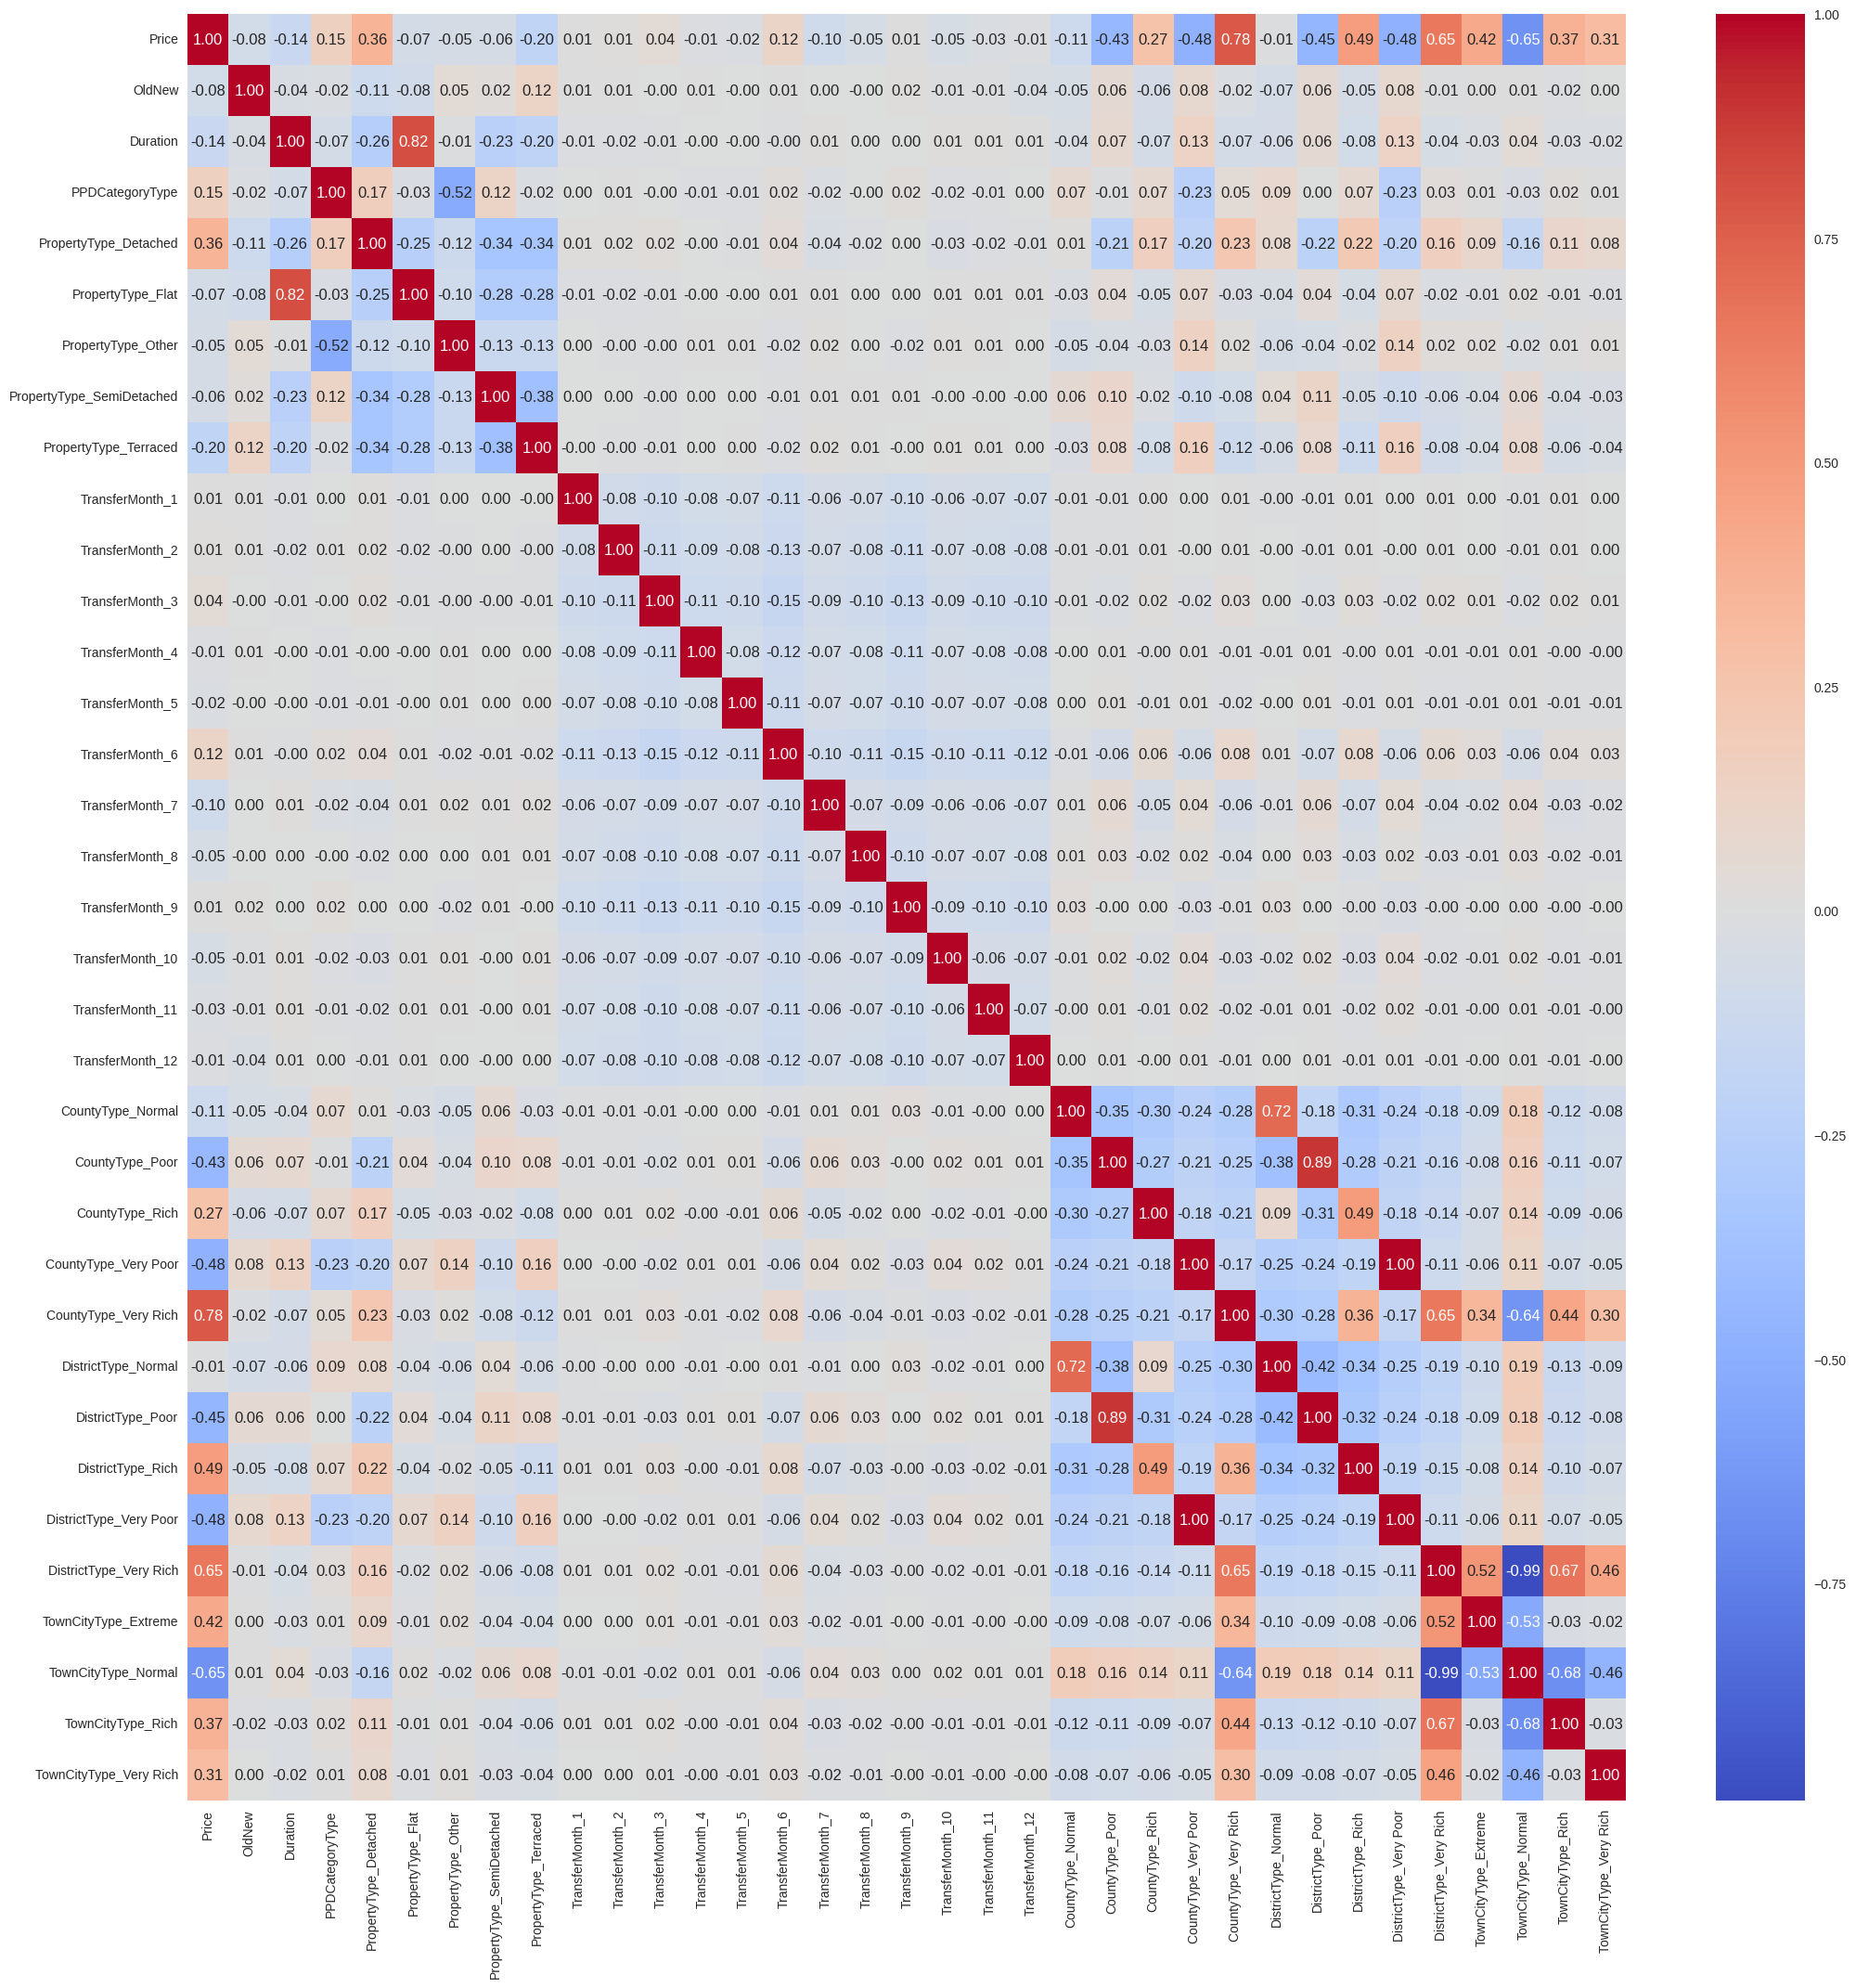

In [185]:
plt.figure(figsize = (25,25))
sns.heatmap(houses_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Model Selection

### Sampling data : data (for Modling and validation), data_unseen (for test) 

- <b>stratified_sampling</b>: fucntion for stratified sampling

In [186]:
def stratified_sampling(df,colname,frac,random_state=None):
    sampling_options = {
        "frac":frac
    }
    if random_state!= None : sampling_options['random_state']=random_state
    return df.groupby(colname, group_keys=False).apply(lambda x: x.sample(**sampling_options))

In [187]:
# Data (for Modeling) & Data_Unseen (for test)
data = stratified_sampling(
    df=houses_encoded,
    colname="PPDCategoryType",
    frac=0.95,
    random_state=1
)
data_unseen = houses_encoded.drop(data.index)
# drop index
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1111699, 35)
Unseen Data For Predictions: (58511, 35)


### Modeling

In [171]:
from pycaret.regression import *

In [188]:
data.columns

Index(['Price', 'OldNew', 'Duration', 'PPDCategoryType',
       'PropertyType_Detached', 'PropertyType_Flat', 'PropertyType_Other',
       'PropertyType_SemiDetached', 'PropertyType_Terraced', 'TransferMonth_1',
       'TransferMonth_2', 'TransferMonth_3', 'TransferMonth_4',
       'TransferMonth_5', 'TransferMonth_6', 'TransferMonth_7',
       'TransferMonth_8', 'TransferMonth_9', 'TransferMonth_10',
       'TransferMonth_11', 'TransferMonth_12', 'CountyType_Normal',
       'CountyType_Poor', 'CountyType_Rich', 'CountyType_Very Poor',
       'CountyType_Very Rich', 'DistrictType_Normal', 'DistrictType_Poor',
       'DistrictType_Rich', 'DistrictType_Very Poor', 'DistrictType_Very Rich',
       'TownCityType_Extreme', 'TownCityType_Normal', 'TownCityType_Rich',
       'TownCityType_Very Rich'],
      dtype='object')

In [189]:
train_features = [
    'Price', 
    'OldNew', 
    'Duration', 
    'PPDCategoryType',
    'PropertyType_Detached', 
    'PropertyType_Flat', 
    'PropertyType_Other',
    'PropertyType_SemiDetached', 
    'PropertyType_Terraced', 
    'TransferMonth_1',
    'TransferMonth_2', 
    'TransferMonth_3', 
    'TransferMonth_4',
    'TransferMonth_5', 
    'TransferMonth_6', 
    'TransferMonth_7',
    'TransferMonth_8', 
    'TransferMonth_9', 
    'TransferMonth_10',
    'TransferMonth_11', 
    'TransferMonth_12', 
    'CountyType_Normal',
    'CountyType_Poor', 
    'CountyType_Rich', 
    'CountyType_Very Poor',
    'CountyType_Very Rich', 
    'DistrictType_Normal', 
    'DistrictType_Poor',
    'DistrictType_Rich', 
    'DistrictType_Very Poor', 
    'DistrictType_Very Rich',
    'TownCityType_Extreme', 
    'TownCityType_Normal', 
    'TownCityType_Rich',
    'TownCityType_Very Rich'
]
data_train = data.loc[:,train_features]

In [190]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111699 entries, 0 to 1111698
Data columns (total 35 columns):
 #   Column                     Non-Null Count    Dtype
---  ------                     --------------    -----
 0   Price                      1111699 non-null  int64
 1   OldNew                     1111699 non-null  int64
 2   Duration                   1111699 non-null  int64
 3   PPDCategoryType            1111699 non-null  int64
 4   PropertyType_Detached      1111699 non-null  int64
 5   PropertyType_Flat          1111699 non-null  int64
 6   PropertyType_Other         1111699 non-null  int64
 7   PropertyType_SemiDetached  1111699 non-null  int64
 8   PropertyType_Terraced      1111699 non-null  int64
 9   TransferMonth_1            1111699 non-null  int64
 10  TransferMonth_2            1111699 non-null  int64
 11  TransferMonth_3            1111699 non-null  int64
 12  TransferMonth_4            1111699 non-null  int64
 13  TransferMonth_5            1111699 non-nul

In [191]:
predictor = setup(
    data = data_train, 
    target = 'Price', 
    normalize=True ,
    session_id=2
)

### Compare Models

In [192]:
best_model = compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [193]:
print(best_model)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=2, ...)


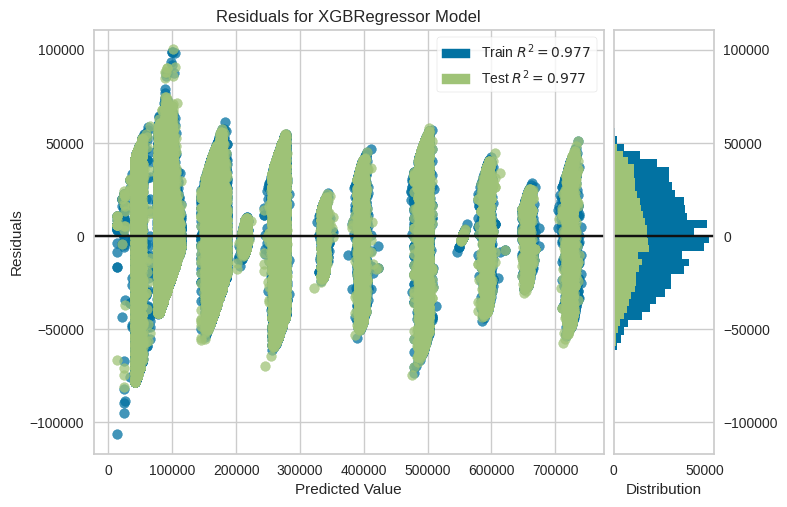

In [196]:
plot_model(best_model, plot = 'residuals')

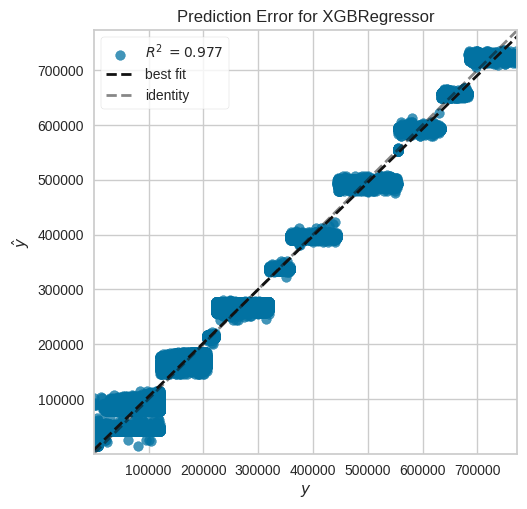

In [198]:
plot_model(best_model, plot = 'error')

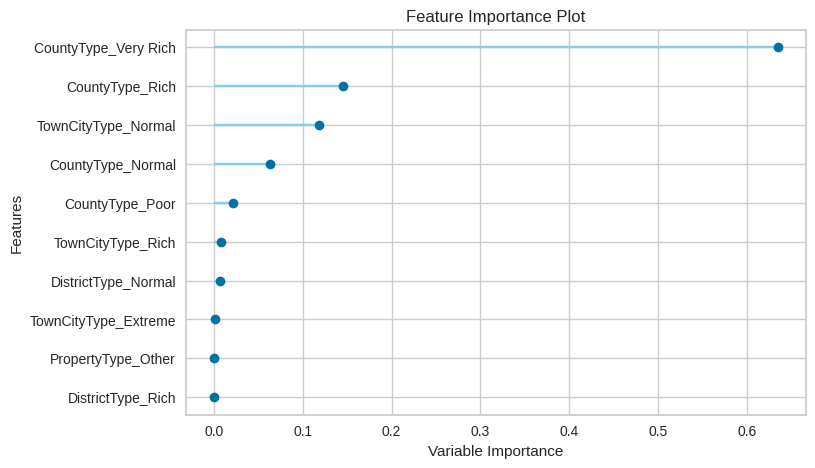

In [199]:
plot_model(best_model, plot = 'feature')

In [194]:
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
xgboost           Extreme Gradient Boosting   
lightgbm    Light Gradient Boosting Machine   
catboost                 CatBoost Regressor   
dummy                       Dummy Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
xgboost                        xgboost.sklearn.XGBRegressor   True  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
catboost                    catboost.core.CatBoostRegressor   True  
dummy                          sklearn.dummy.DummyRegressor   True

### Create Models

In [195]:
model_1 = create_model('lightgbm')
model_2 = create_model('catboost')
model_3 = create_model('xgboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tune Model

In [227]:
best_model_tuned = tune_model(best_model,optimize='R2')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Plot Models

In [206]:
best_model

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=2, ...)

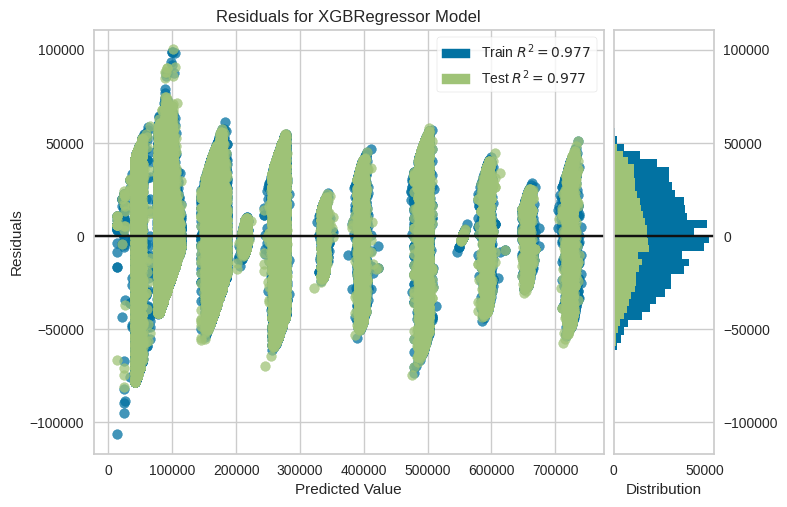

In [222]:
plot_model(best_model)

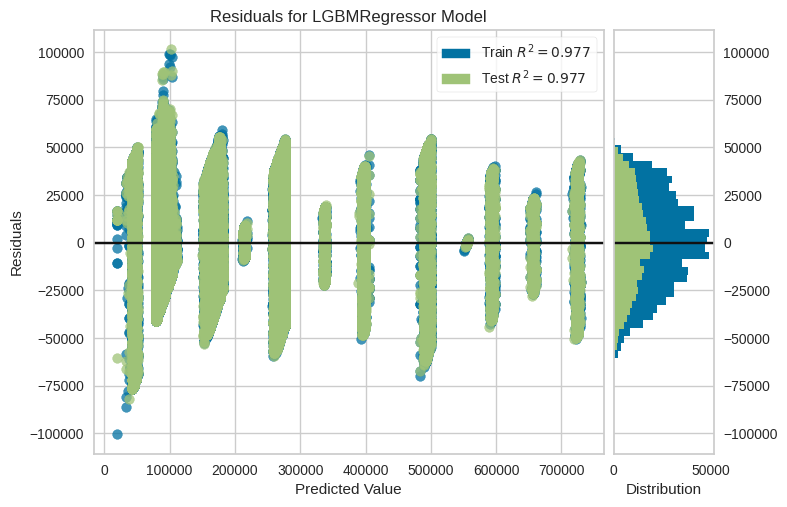

In [201]:
plot_model(model_1)

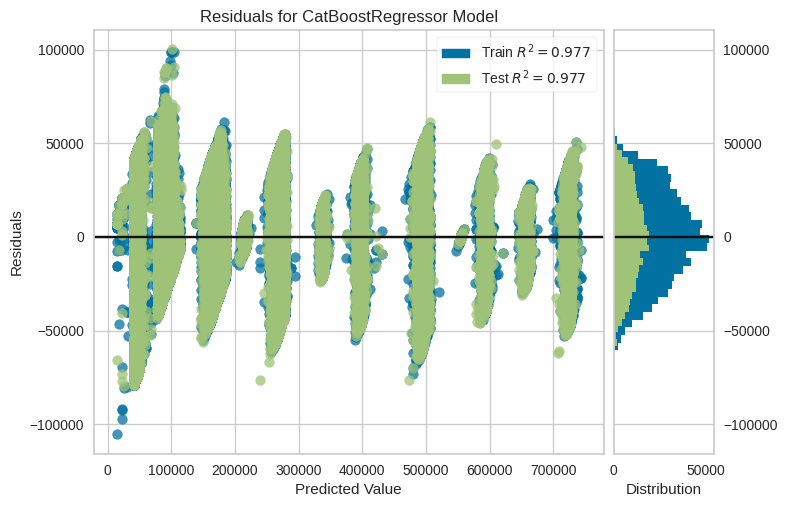

In [202]:
plot_model(model_2)

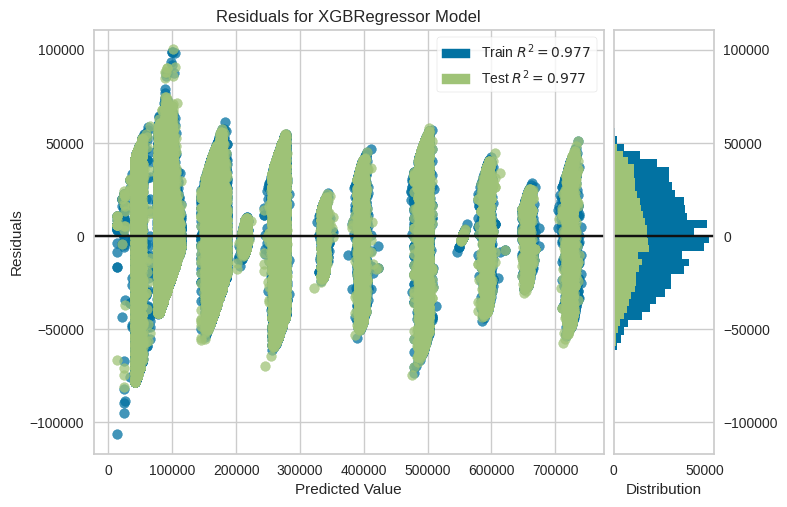

In [203]:
plot_model(model_3)

### Predictions on unseen_data

#### best_model

In [213]:
predictions = predict_model(best_model, data = data_unseen)

In [214]:
predictions.head()

OldNew  Duration  PPDCategoryType  PropertyType_Detached  \
0       1         0                1                      1   
1       1         0                1                      0   
2       1         0                1                      0   
3       1         0                1                      0   
4       1         0                1                      0   

   PropertyType_Flat  PropertyType_Other  PropertyType_SemiDetached  \
0                  0                   0                          0   
1                  0                   0                          0   
2                  0                   0                          0   
3                  0                   0                          0   
4                  0                   0                          0   

   PropertyType_Terraced  TransferMonth_1  TransferMonth_2  ...  \
0                      0                0                0  ...   
1                      1                0                0  ...   
2                      1                0                0  ...   
3                      1                0                0  ...   
4                      1                0                0  ...   

   DistrictType_Poor  DistrictType_Rich  DistrictType_Very Poor  \
0                  0                  0                       0   
1                  0                  0                       0   
2                  0                  0                       0   
3                  0                  1                       0   
4                  0                  0                       0   

   DistrictType_Very Rich  TownCityType_Extreme  TownCityType_Normal  \
0                       1                     1                    0   
1                       0                     0                    1   
2                       0                     0                    1   
3                       0                     0                    1   
4                       0                     0                    1   

   TownCityType_Rich  TownCityType_Very Rich   Price  prediction_label  
0                  0                       0  699950     724620.312500  
1                  0                       0  350000     336758.531250  
2                  0                       0  321000     337035.906250  
3                  0                       0  490000     492960.156250  
4                  0                       0  272500     268764.906250  

[5 rows x 36 columns]

In [215]:
from sklearn.metrics import r2_score

r2_score(predictions['Price'], predictions['prediction_label'])

0.9768694488703293

#### best_model_tuned

In [228]:
predictions_tuned = predict_model(best_model_tuned, data = data_unseen)

In [229]:
predictions_tuned.head()

OldNew  Duration  PPDCategoryType  PropertyType_Detached  \
0       1         0                1                      1   
1       1         0                1                      0   
2       1         0                1                      0   
3       1         0                1                      0   
4       1         0                1                      0   

   PropertyType_Flat  PropertyType_Other  PropertyType_SemiDetached  \
0                  0                   0                          0   
1                  0                   0                          0   
2                  0                   0                          0   
3                  0                   0                          0   
4                  0                   0                          0   

   PropertyType_Terraced  TransferMonth_1  TransferMonth_2  ...  \
0                      0                0                0  ...   
1                      1                0                0  ...   
2                      1                0                0  ...   
3                      1                0                0  ...   
4                      1                0                0  ...   

   DistrictType_Poor  DistrictType_Rich  DistrictType_Very Poor  \
0                  0                  0                       0   
1                  0                  0                       0   
2                  0                  0                       0   
3                  0                  1                       0   
4                  0                  0                       0   

   DistrictType_Very Rich  TownCityType_Extreme  TownCityType_Normal  \
0                       1                     1                    0   
1                       0                     0                    1   
2                       0                     0                    1   
3                       0                     0                    1   
4                       0                     0                    1   

   TownCityType_Rich  TownCityType_Very Rich   Price  prediction_label  
0                  0                       0  699950     724620.312500  
1                  0                       0  350000     336758.531250  
2                  0                       0  321000     337035.906250  
3                  0                       0  490000     492960.156250  
4                  0                       0  272500     268764.906250  

[5 rows x 36 columns]

In [230]:
from sklearn.metrics import r2_score

r2_score(predictions_tuned['Price'], predictions_tuned['prediction_label'])

0.9768694488703293

### Finalise_Model

#### best_model

In [216]:
house_predictor_model = finalize_model(best_model)

In [220]:
predictions_finalised = predict_model(house_predictor_model, data = data_unseen)

In [221]:
from sklearn.metrics import r2_score

r2_score(predictions_finalised['Price'], predictions_finalised['prediction_label'])

0.9768751930268316

#### best_model_tuned

In [231]:
house_predictor_model_tuned = finalize_model(best_model_tuned)

In [232]:
predictions_finalised_tuned = predict_model(house_predictor_model_tuned, data = data_unseen)

In [233]:
from sklearn.metrics import r2_score

r2_score(predictions_finalised_tuned['Price'], predictions_finalised_tuned['prediction_label'])

0.9768751930268316

### Save Model

#### best_model

In [223]:
save_model(house_predictor_model, './models/house_predictor_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['OldNew', 'Duration',
                                              'PPDCategoryType',
                                              'PropertyType_Detached',
                                              'PropertyType_Flat',
                                              'PropertyType_Other',
                                              'PropertyType_SemiDetached',
                                              'PropertyType_Terraced',
                                              'TransferMonth_1',
                                              'TransferMonth_2',
                                              'TransferMonth_3',
                                              'TransferMonth_4',
                                              'TransferMonth_5',...
                               feature_types=None, gamma=None, gpu_id=None,
                     

#### best_model_tuned

In [234]:
save_model(house_predictor_model_tuned, './models/house_predictor_model_tuned')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['OldNew', 'Duration',
                                              'PPDCategoryType',
                                              'PropertyType_Detached',
                                              'PropertyType_Flat',
                                              'PropertyType_Other',
                                              'PropertyType_SemiDetached',
                                              'PropertyType_Terraced',
                                              'TransferMonth_1',
                                              'TransferMonth_2',
                                              'TransferMonth_3',
                                              'TransferMonth_4',
                                              'TransferMonth_5',...
                               feature_types=None, gamma=None, gpu_id=None,
                     

### Load Model

#### best_model

In [224]:
house_predictor_model = load_model('./models/house_predictor_model')

Transformation Pipeline and Model Successfully Loaded


In [225]:
new_predictions = predict_model(house_predictor_model, data=data_unseen)

In [226]:
from sklearn.metrics import r2_score

r2_score(new_predictions['Price'], new_predictions['prediction_label'])

0.9768751930268316

#### best_model_tuned

In [235]:
house_predictor_model_tuned = load_model('./models/house_predictor_model_tuned')

Transformation Pipeline and Model Successfully Loaded


In [236]:
new_predictions_tuned = predict_model(house_predictor_model_tuned, data=data_unseen)

In [237]:
from sklearn.metrics import r2_score

r2_score(new_predictions_tuned['Price'], new_predictions_tuned['prediction_label'])

0.9768751930268316